# <span style="color:#008000"/>Star Hotels Project

## <span style="color:#008000"/>Context

A significant number of hotel bookings are called-off due to cancellations or no-shows. The typical reasons for cancellations include change of plans, scheduling conflicts, etc. This is often made easier by the option to do so free of charge or preferably at a low cost which is beneficial to hotel guests but it is a less desirable and possibly revenue-diminishing factor for hotels to deal with. Such losses are particularly high on last-minute cancellations. 

The new technologies involving online booking channels have dramatically changed customers’ booking possibilities and behavior. This adds a further dimension to the challenge of how hotels handle cancellations, which are no longer limited to traditional booking and guest characteristics. 

The cancellation of bookings impact a hotel on various fronts:
* Loss of resources (revenue) when the hotel cannot resell the room.
* Additional costs of distribution channels by increasing commissions or paying for publicity to help sell these rooms.
* Lowering prices last minute, so the hotel can resell a room, resulting in reducing the profit margin.
* Human resources to make arrangements for the guests.

## <span style="color:#008000"/>Objective
The increasing number of cancellations calls for a Machine Learning based solution that can help in predicting which booking is likely to be canceled. Star Hotels Group has a chain of hotels in Portugal, they are facing problems with the high number of booking cancellations and have reached out to your firm for data-driven solutions. You as a data scientist have to analyze the data provided to find which factors have a high influence on booking cancellations, build a predictive model that can predict which booking is going to be canceled in advance, and help in formulating profitable policies for cancellations and refunds.

## <span style="color:#008000"/>Data Description
The data contains the different attributes of customers' booking details. The detailed data dictionary is given below.


**Data Dictionary**

* no_of_adults: Number of adults
* no_of_children: Number of Children
* no_of_weekend_nights: Number of weekend nights (Saturday or Sunday) the guest stayed or booked to stay at the hotel
* no_of_week_nights: Number of week nights (Monday to Friday) the guest stayed or booked to stay at the hotel
* type_of_meal_plan: Type of meal plan booked by the customer:
    * Not Selected – No meal plan selected
    * Meal Plan 1 – Breakfast
    * Meal Plan 2 – Half board (breakfast and one other meal)
    * Meal Plan 3 – Full board (breakfast, lunch, and dinner)
* required_car_parking_space: Does the customer require a car parking space? (0 - No, 1- Yes)
* room_type_reserved: Type of room reserved by the customer. The values are ciphered (encoded) by Star Hotels.
* lead_time: Number of days between the date of booking and the arrival date
* arrival_year: Year of arrival date
* arrival_month: Month of arrival date
* arrival_date: Date of the month
* market_segment_type: Market segment designation.
* repeated_guest: Is the customer a repeated guest? (0 - No, 1- Yes)
* no_of_previous_cancellations: Number of previous bookings that were canceled by the customer prior to the current booking
* no_of_previous_bookings_not_canceled: Number of previous bookings not canceled by the customer prior to the current booking
* avg_price_per_room: Average price per day of the reservation; prices of the rooms are dynamic. (in euros)
* no_of_special_requests: Total number of special requests made by the customer (e.g. high floor, view from the room, etc)
* booking_status: Flag indicating if the booking was canceled or not.

## <span style="color:#008000"/>Importing necessary libraries and data

In [227]:
# import warnings library to hide warning and deprecation messages
import warnings
warnings.filterwarnings("ignore")

# import data handling and numeric processing libraries
import pandas as pd
import numpy as np

# import visualizations and chart libraries
import seaborn as sns
import matplotlib.pyplot as plt

# command to display plots in the notebook
%matplotlib inline

# set styling options
sns.set_style('darkgrid')

# import libraries for variable scaling
from sklearn.preprocessing import StandardScaler, MinMaxScaler, normalize, PolynomialFeatures

from scipy import stats

# imort vif function
from statsmodels.stats.outliers_influence import variance_inflation_factor

# import library to split data
from sklearn.model_selection import train_test_split

# import stats model
import statsmodels.api as sm

# import function to add constant
from statsmodels.tools.tools import add_constant

# import Logistic Regression function
from sklearn.linear_model import LogisticRegression

# import scoring metrics
from sklearn.metrics import (
    f1_score,
    accuracy_score,
    recall_score,
    precision_score,
    confusion_matrix,
    roc_auc_score,
    plot_confusion_matrix,
    precision_recall_curve,
    roc_curve,
    make_scorer,
)

# import libraries to build decision tree classifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

# import library tune different models
from sklearn.model_selection import GridSearchCV

## <span style="color:#008000"/> Data Overview

- Observations
- Sanity checks

In [228]:
# import the data
data = pd.read_csv('StarHotelsGroup.csv')

In [229]:
# check if data imported okay
data.sample(8)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
47721             1               0                     0                  3   
40650             1               0                     1                  0   
9322              1               0                     1                  0   
17571             2               0                     0                  2   
39379             2               0                     1                  4   
7869              2               0                     0                  1   
55439             2               0                     2                  1   
53084             2               0                     0                  3   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
47721       Meal Plan 1                           0        Room_Type 1   
40650       Meal Plan 1                           0        Room_Type 1   
9322        Meal Plan 1                           0        Room_Type 1   
17571       Meal Plan 1                           0        Room_Type 1   
39379       Meal Plan 1                           0        Room_Type 4   
7869       Not Selected                           1        Room_Type 1   
55439       Meal Plan 2                           0        Room_Type 1   
53084       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
47721         37          2018             10            13   
40650          0          2018              6            27   
9322           4          2017             11            16   
17571         46          2019              6             9   
39379         23          2017              9            16   
7869           1          2018              4            16   
55439        150          2018              1             2   
53084        183          2018              9             8   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
47721             Offline               0                             0   
40650             Offline               0                             0   
9322            Corporate               1                             0   
17571              Online               0                             0   
39379             Offline               0                             0   
7869               Online               0                             0   
55439             Offline               0                             0   
53084             Offline               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
47721                                     0                95.0   
40650                                     0               106.4   
9322                                      1                65.0   
17571                                     0               150.0   
39379                                     0                68.0   
7869                                      0                89.0   
55439                                     0               101.0   
53084                                     0               110.0   

       no_of_special_requests booking_status  
47721                       0   Not_Canceled  
40650                       0   Not_Canceled  
9322                        0   Not_Canceled  
17571                       1   Not_Canceled  
39379                       1   Not_Canceled  
7869                        1   Not_Canceled  
55439                       0   Not_Canceled  
53084                       1       Canceled

In [230]:
# get basic data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56926 entries, 0 to 56925
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          56926 non-null  int64  
 1   no_of_children                        56926 non-null  int64  
 2   no_of_weekend_nights                  56926 non-null  int64  
 3   no_of_week_nights                     56926 non-null  int64  
 4   type_of_meal_plan                     56926 non-null  object 
 5   required_car_parking_space            56926 non-null  int64  
 6   room_type_reserved                    56926 non-null  object 
 7   lead_time                             56926 non-null  int64  
 8   arrival_year                          56926 non-null  int64  
 9   arrival_month                         56926 non-null  int64  
 10  arrival_date                          56926 non-null  int64  
 11  market_segment_

In [231]:
data.shape

(56926, 18)

- The data contains 13 integer, 4 object and 1 float variables
- Type_of_meal_plan, Room_typpe_reserved, Market_segment_type and booking_status are categorical which need to be converted to correct format
- The data contains 56,926 observations
- There are 17 features in the data set and 1 target column

In [232]:
# Let's check duplicate values
data[data.duplicated()].count()

no_of_adults                            14350
no_of_children                          14350
no_of_weekend_nights                    14350
no_of_week_nights                       14350
type_of_meal_plan                       14350
required_car_parking_space              14350
room_type_reserved                      14350
lead_time                               14350
arrival_year                            14350
arrival_month                           14350
arrival_date                            14350
market_segment_type                     14350
repeated_guest                          14350
no_of_previous_cancellations            14350
no_of_previous_bookings_not_canceled    14350
avg_price_per_room                      14350
no_of_special_requests                  14350
booking_status                          14350
dtype: int64

There are 14,350 duplicate values in the data set

In [233]:
# Let's drop the duplicate values
data.drop_duplicates(inplace=True)

In [234]:
# Let's check duplicate values
data[data.duplicated()].count()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [235]:
# Check missing values
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

There are no missing values in the data set

In [236]:
# Let's summarize the numerical columns 
data.describe().T

count         mean        std     min  \
no_of_adults                          42576.0     1.916737   0.527524     0.0   
no_of_children                        42576.0     0.142146   0.459920     0.0   
no_of_weekend_nights                  42576.0     0.895270   0.887864     0.0   
no_of_week_nights                     42576.0     2.321167   1.519328     0.0   
required_car_parking_space            42576.0     0.034362   0.182160     0.0   
lead_time                             42576.0    77.315953  77.279616     0.0   
arrival_year                          42576.0  2018.297891   0.626126  2017.0   
arrival_month                         42576.0     6.365488   3.051924     1.0   
arrival_date                          42576.0    15.682873   8.813991     1.0   
repeated_guest                        42576.0     0.030886   0.173011     0.0   
no_of_previous_cancellations          42576.0     0.025413   0.358194     0.0   
no_of_previous_bookings_not_canceled  42576.0     0.222731   2.242308     0.0   
avg_price_per_room                    42576.0   112.375800  40.865896     0.0   
no_of_special_requests                42576.0     0.768109   0.837264     0.0   

                                         25%     50%     75%     max  
no_of_adults                             2.0     2.0     2.0     4.0  
no_of_children                           0.0     0.0     0.0    10.0  
no_of_weekend_nights                     0.0     1.0     2.0     8.0  
no_of_week_nights                        1.0     2.0     3.0    17.0  
required_car_parking_space               0.0     0.0     0.0     1.0  
lead_time                               16.0    53.0   118.0   521.0  
arrival_year                          2018.0  2018.0  2019.0  2019.0  
arrival_month                            4.0     6.0     9.0    12.0  
arrival_date                             8.0    16.0    23.0    31.0  
repeated_guest                           0.0     0.0     0.0     1.0  
no_of_previous_cancellations             0.0     0.0     0.0    13.0  
no_of_previous_bookings_not_canceled     0.0     0.0     0.0    72.0  
avg_price_per_room                      85.5   107.0   135.0   540.0  
no_of_special_requests                   0.0     1.0     1.0     5.0

- The numerical columns has both discrete and continuous data
- The lead_time and avg_price_per_room is right skewed
- The repeated_guest and required_car_parking_space has 0 or 1 values

In [237]:
# Let's summarize the categorical columns
data.describe(include=["object"]).T

count unique           top   freq
type_of_meal_plan    42576      4   Meal Plan 1  31863
room_type_reserved   42576      7   Room_Type 1  29730
market_segment_type  42576      5        Online  34169
booking_status       42576      2  Not_Canceled  28089

In [238]:
# Let's check data for all object and numerical discrete data
x_columns = ['no_of_adults', 'no_of_children', 'no_of_weekend_nights', 'no_of_week_nights','type_of_meal_plan','room_type_reserved',
               'arrival_year','arrival_month','arrival_date','market_segment_type','no_of_previous_cancellations','no_of_previous_bookings_not_canceled',
               'no_of_special_requests']
for i in x_columns:
    print(data[i].value_counts())
    print("-" * 50)

2    31069
1     7264
3     4031
0      184
4       28
Name: no_of_adults, dtype: int64
--------------------------------------------------
0     38300
1      2561
2      1673
3        39
9         2
10        1
Name: no_of_children, dtype: int64
--------------------------------------------------
0    17829
1    12260
2    11987
3      220
4      216
6       31
5       30
8        2
7        1
Name: no_of_weekend_nights, dtype: int64
--------------------------------------------------
2     11764
1     10906
3      9660
4      4136
0      2797
5      2505
6       301
7       165
8       121
10       94
9        48
11       20
12       16
15       14
14       10
13        9
16        7
17        3
Name: no_of_week_nights, dtype: int64
--------------------------------------------------
Meal Plan 1     31863
Not Selected     8716
Meal Plan 2      1989
Meal Plan 3         8
Name: type_of_meal_plan, dtype: int64
--------------------------------------------------
Room_Type 1    29730
Room_Type

- All of the variables above have sensible values
- There aren't any custom values
- Let's understand these values more in EDA

## <span style="color:#008000"/> Exploratory Data Analysis (EDA)


### <span style="color:#008000"/> Univariate Analysis

In [239]:
def Hist_Bar_Plt(variable,title):
    """This function plots histogram and bar plot 
       for the input variable. The histogram plots 
       shows mean and median lines."""

    fig, ax = plt.subplots(nrows=2,figsize=(15,12))

    fig.suptitle(f'Histogram and Boxplot for {title}')
    
    mean = variable.mean()
    median = variable.median()
    sns.histplot(x=variable, ax=ax[0], kde=True)
    ax[0].axvline(mean, color='r', linestyle='-', label="Mean")
    ax[0].axvline(median, color='b', linestyle='-', label="Median")
    ax[0].legend()
    
    sns.boxplot(ax=ax[1],x=variable,showmeans=True,palette="Set2")
    fig.show()

In [240]:
# list all the numeric columns
num_cols = data.select_dtypes([np.number]).columns

In [241]:
# list all the categorical columns
cat_cols = data.columns[data.dtypes == 'object']

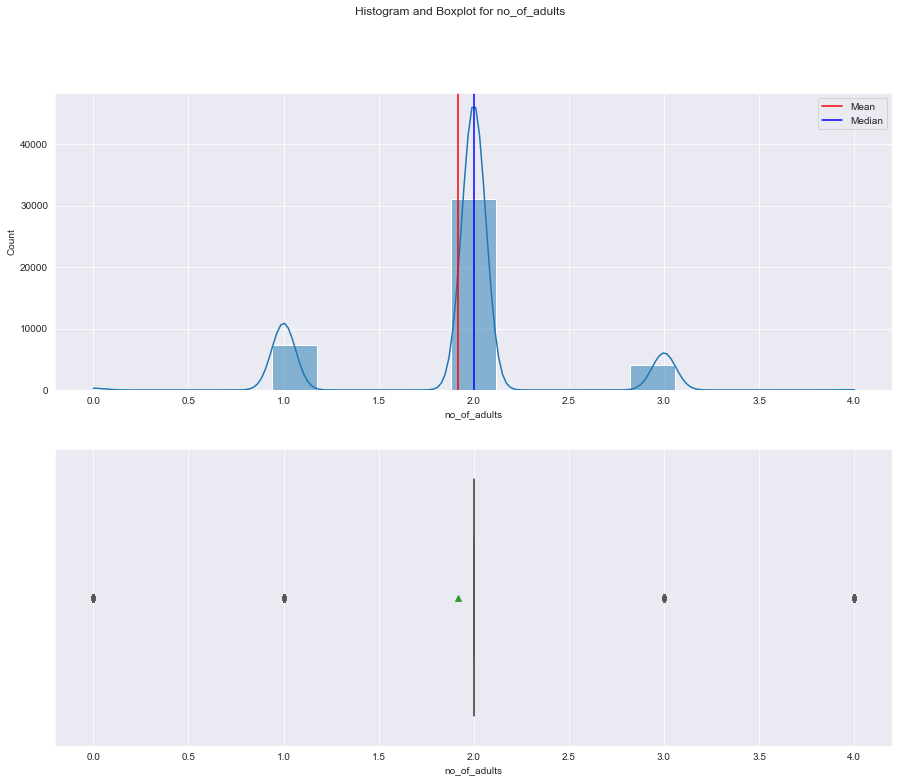

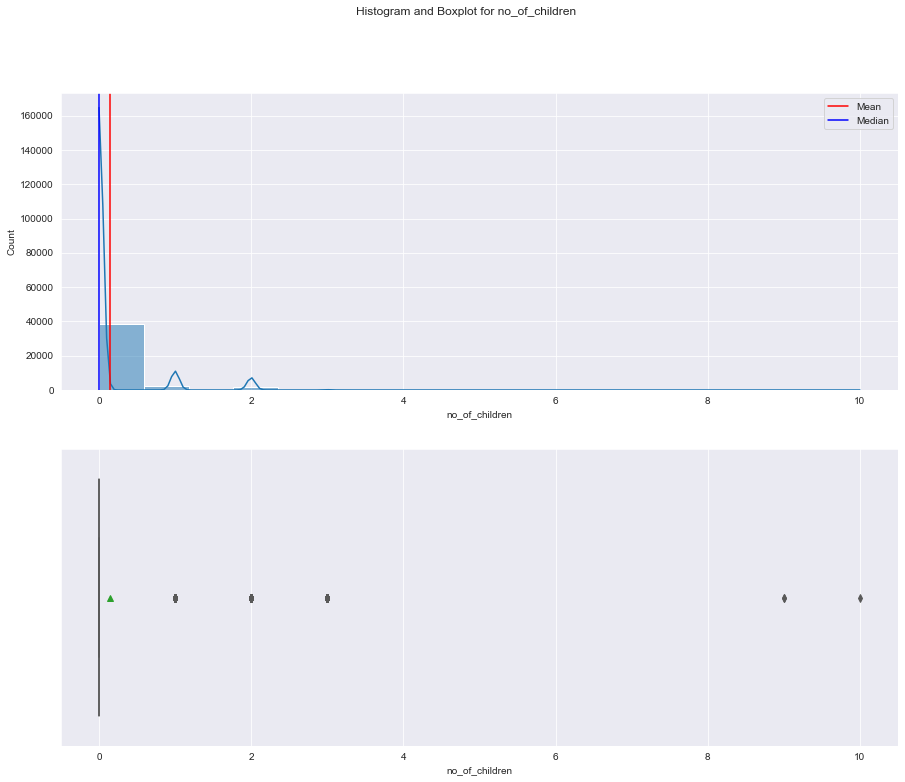

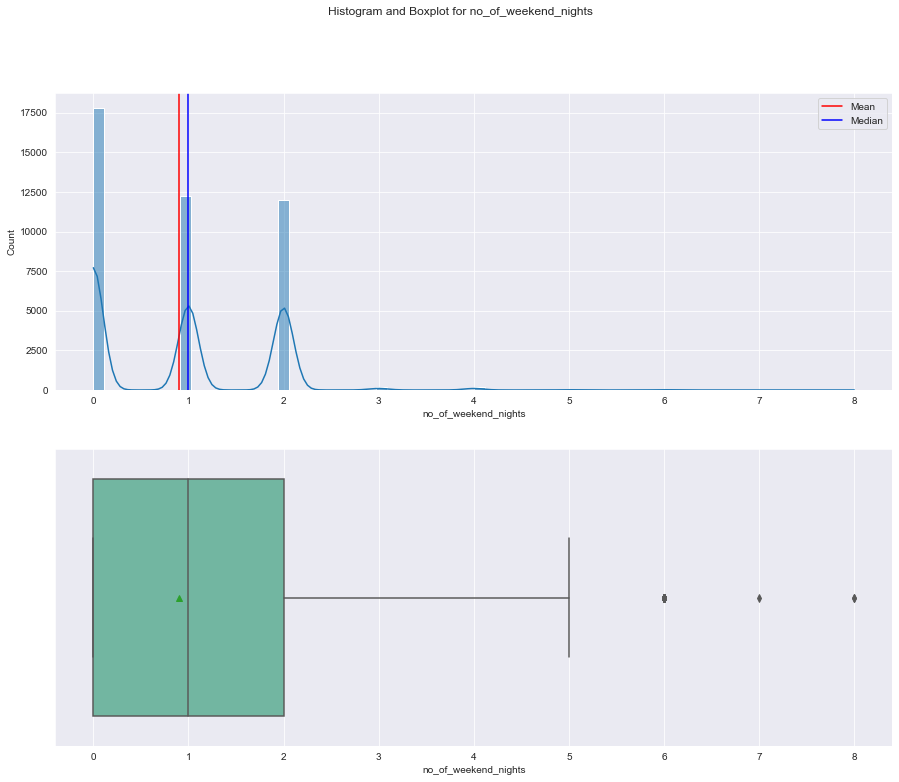

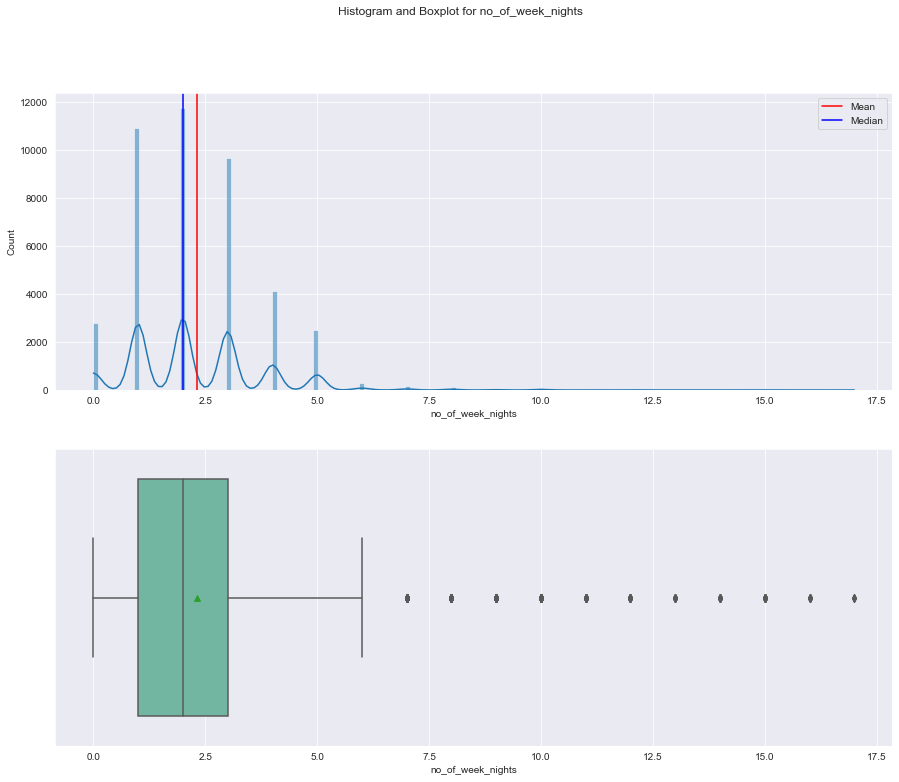

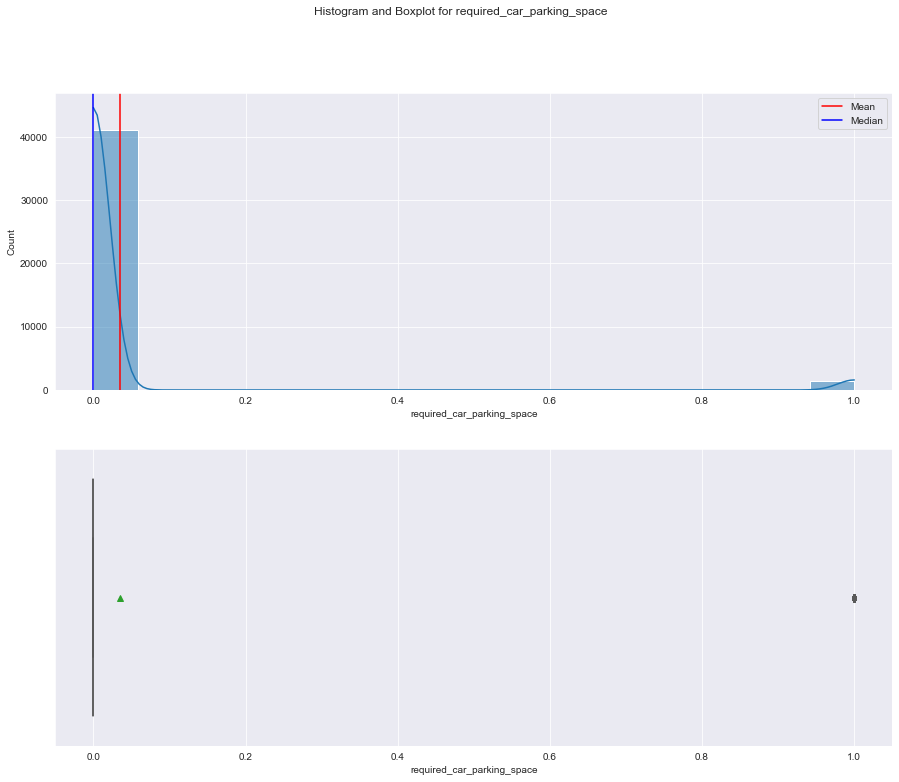

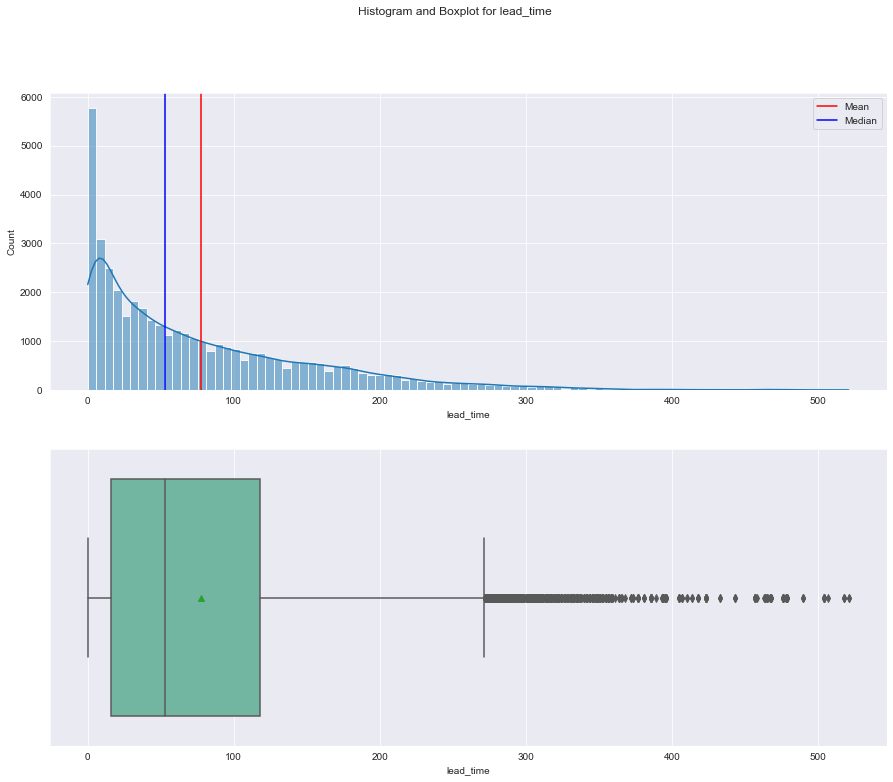

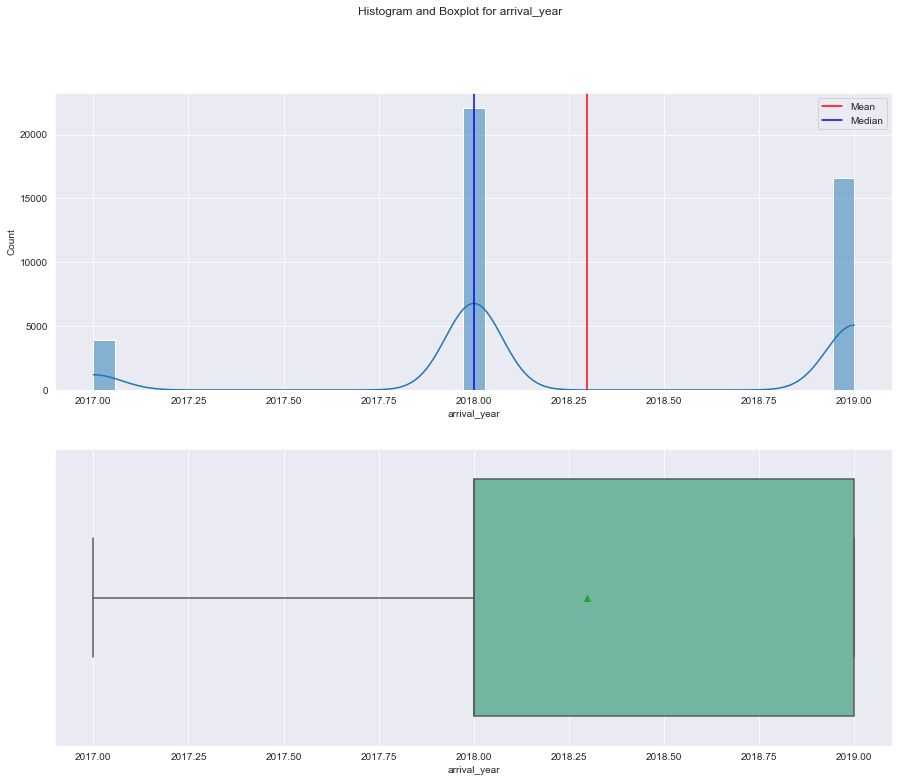

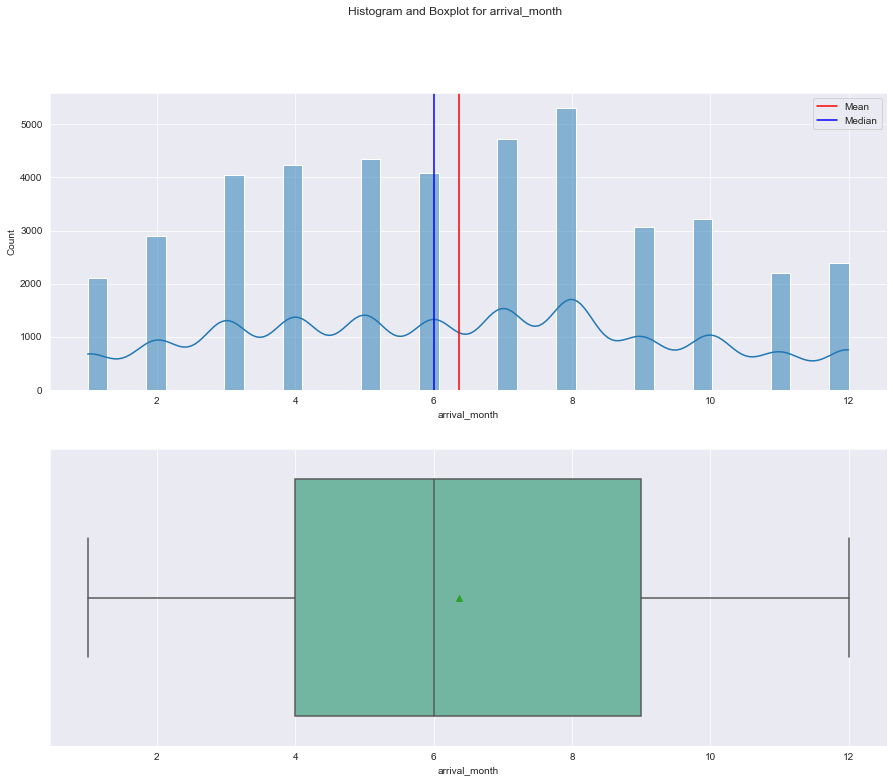

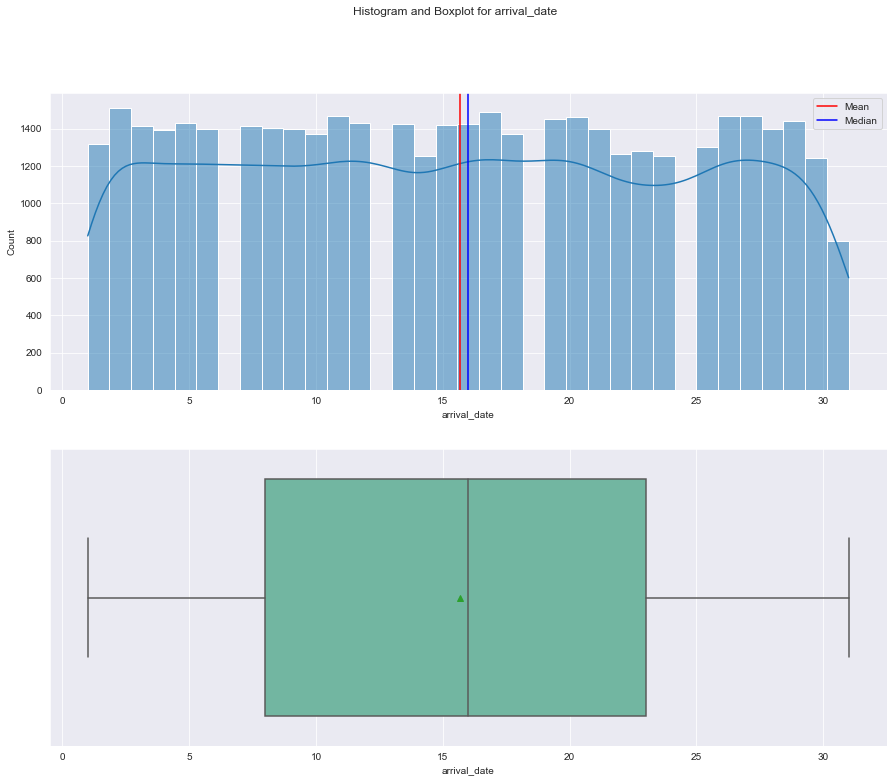

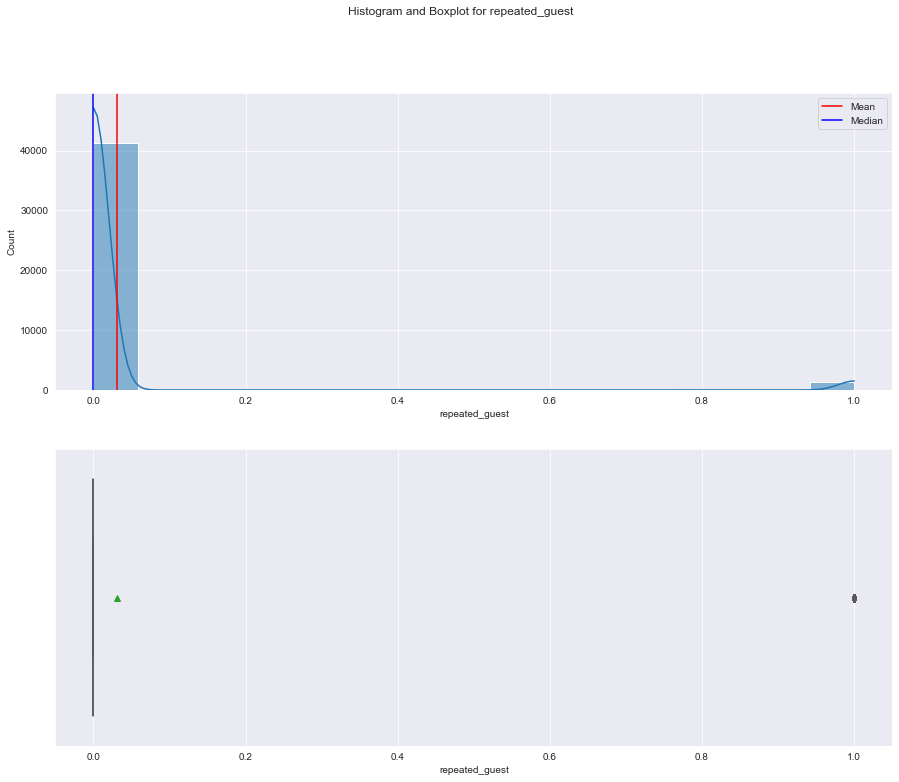

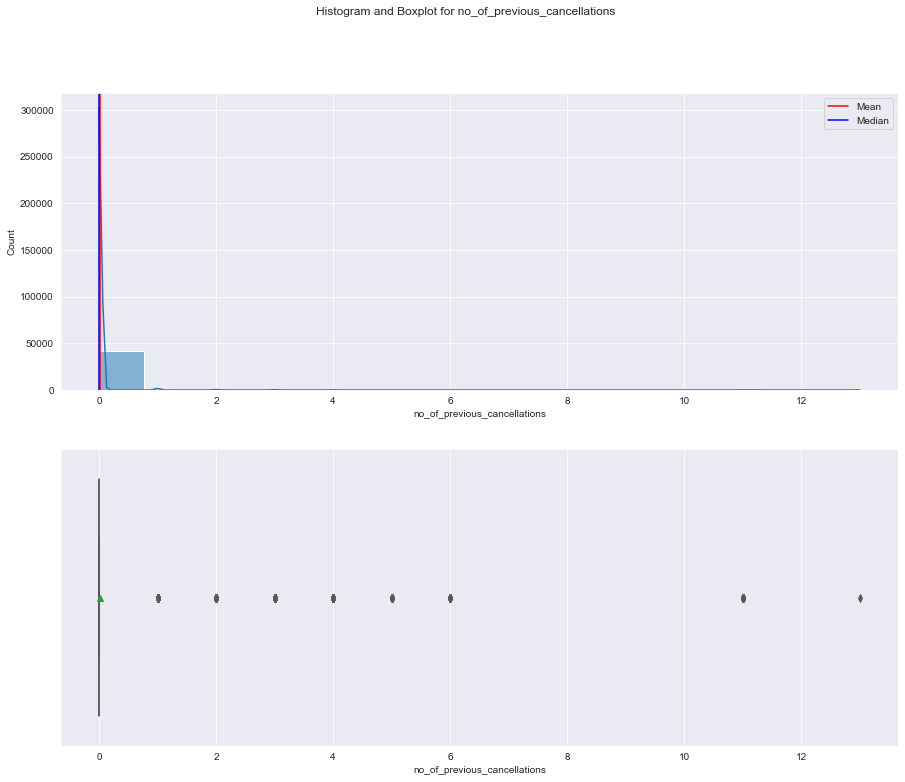

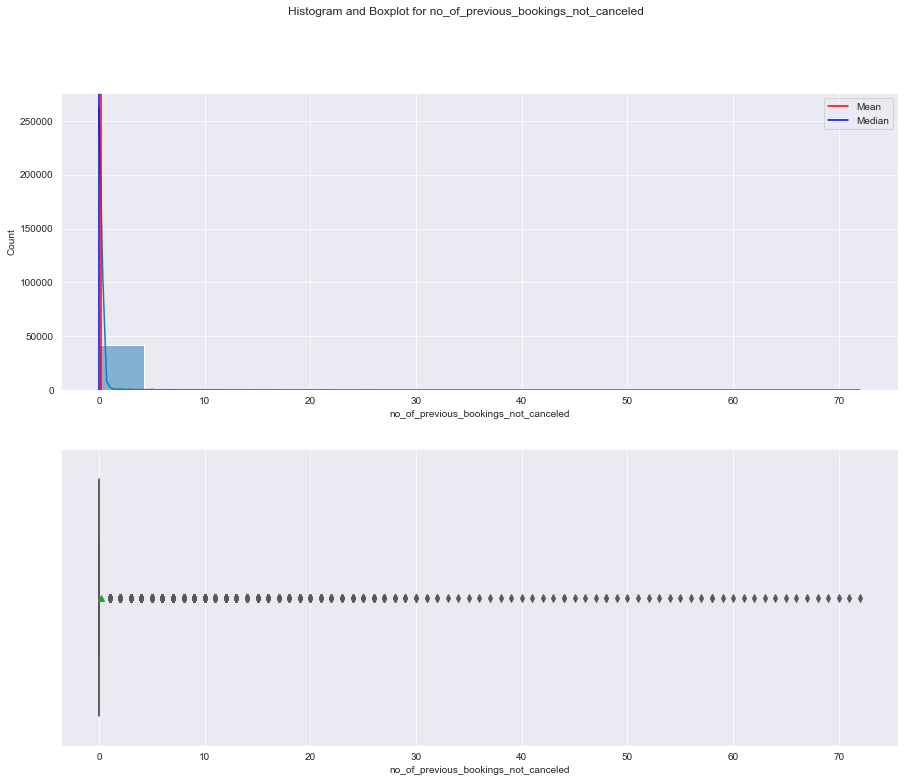

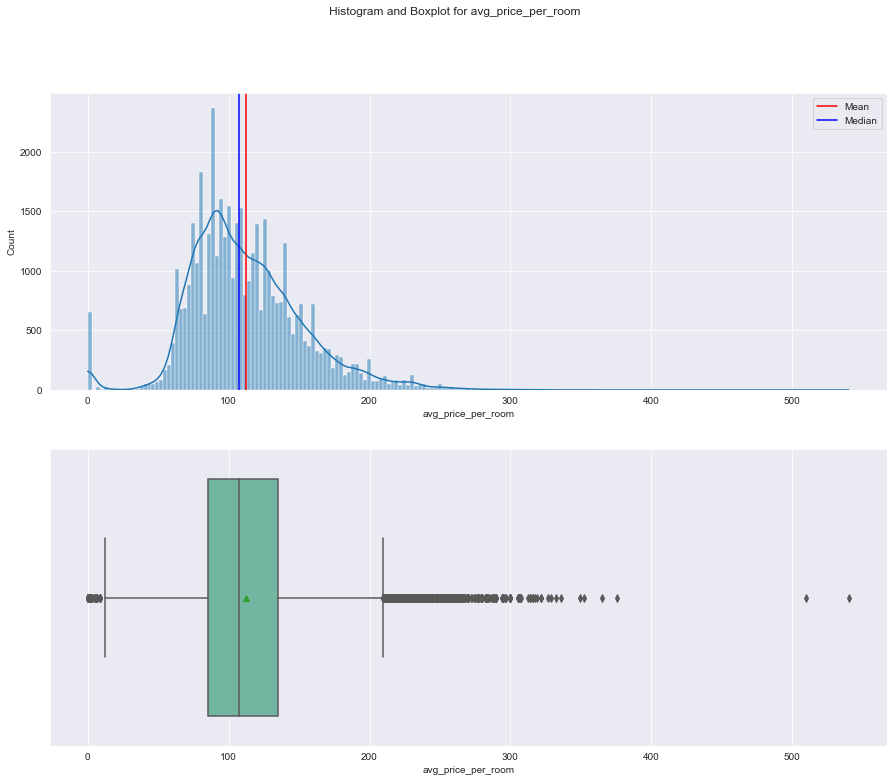

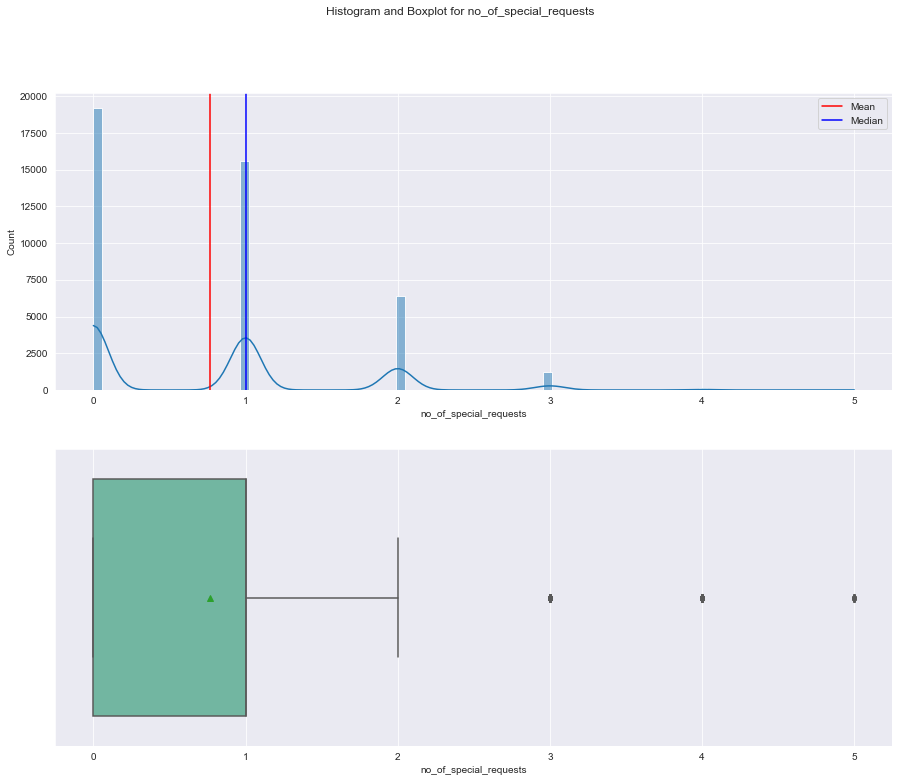

In [242]:
# plotting numerical columns graphs
for i in num_cols:
    Hist_Bar_Plt(data[i],i)

#### <span style="color:#008000"/>Summary of Univariate Analysis of the Numerical Variables

- **No of Adults**:
Most of the rooms have booking for 2 adults.
For a booking, the number of adults goes up to 4.

- **No of Children**:
Most of the bookings have 0 children.
Most of the number of children between 2-4. There are few bookings where number of children are 8-10.

- **Number of Weekend Nights**:
Most of the bookings have 0 weekend nights.
Number of bookings with 1 weekend night are almost equal to 2 weekend nights, indicating the guests tend to book for the entire weekend.

- **Number of Week Nights**:
Most of the bookings fall between 0 - 5 week nights.
There are few long term bookings where the number of week nights are between 6 - 17.5.

- **Required Car Parking Space**:
There are vey few bookings which have selected car parking space.

- **Lead Time**:
The mean lead time falls around 75 days.
The median lead time is around 60 days.
The data is slightly right skewed.

- **Arrival Year**:
Most of the data is for 2018 year.
There are few observations for 2019 followed by the lowest number of observations for 2017.

- **Arrival Month**:
Month of August has maximum number of bookings.
The months of March to August are the most popular months.
The number of bookings are lower during winter October to January.

- **Arrival Date**:
The arrival date data is mostly uniformly spread.

- **Repeated Guest**:
Most of the bookings are first time customers.

- **Number of Previous Cancellations**:
Low number of previous cancellations. This is expected as the number of repeated guests are low.

- **Number of Previous Bookings Not Cancelled**:
No identifiable pattern. The number of previous bookings not cancelled ranges between 1 to 70.

- **Average Price Per Room**:
The average price per room has somewhat a bell curve.
The mean and median are very close, a little above 100.

- **Number of Special Requests**:
Most of the bookings do not have any special requests.


In [243]:
def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data,x=feature,
        palette="Paired", order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

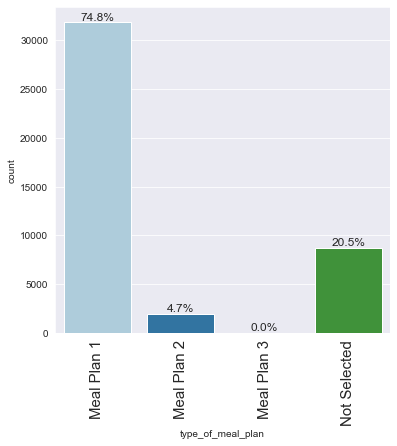

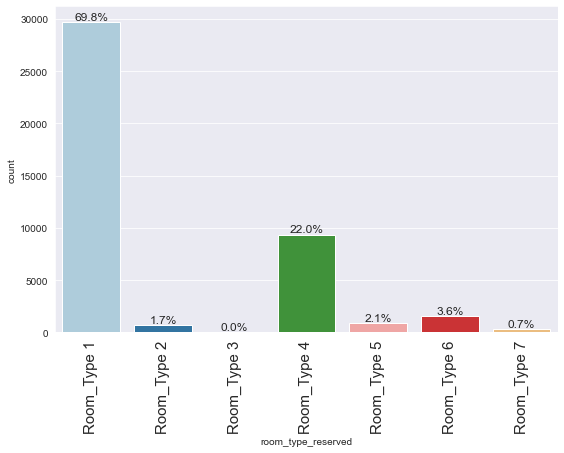

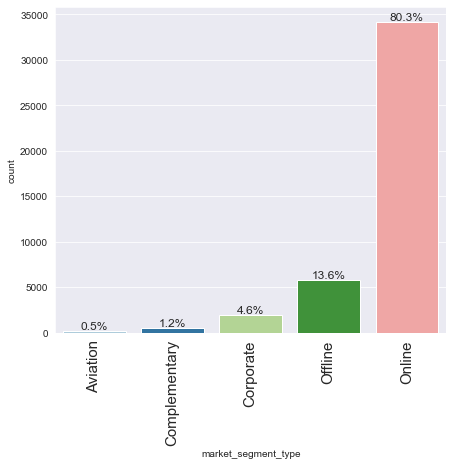

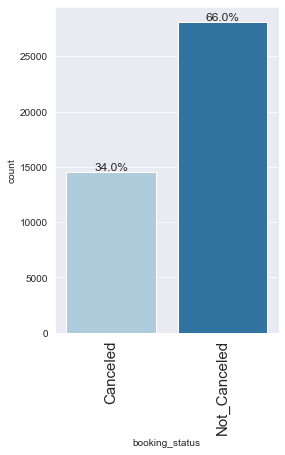

In [244]:
# plotting categorical columns graphs
for i in cat_cols:
    labeled_barplot(data, i, perc=True)

- **Type of Meal Plan**:
75% of bookings opt for Meal 1.
20% of bookings did not select any meal plan.

- **Room Type**:
Almost 70% of the bookings are for Type 1 room. Followed by Type 4 with 22%.

- **Market Segment**:
80% of bookings are Online segment type.

- **Booking Status**:
34% of bookings are cancelled.

### <span style="color:#008000"/> Bivariate Analysis

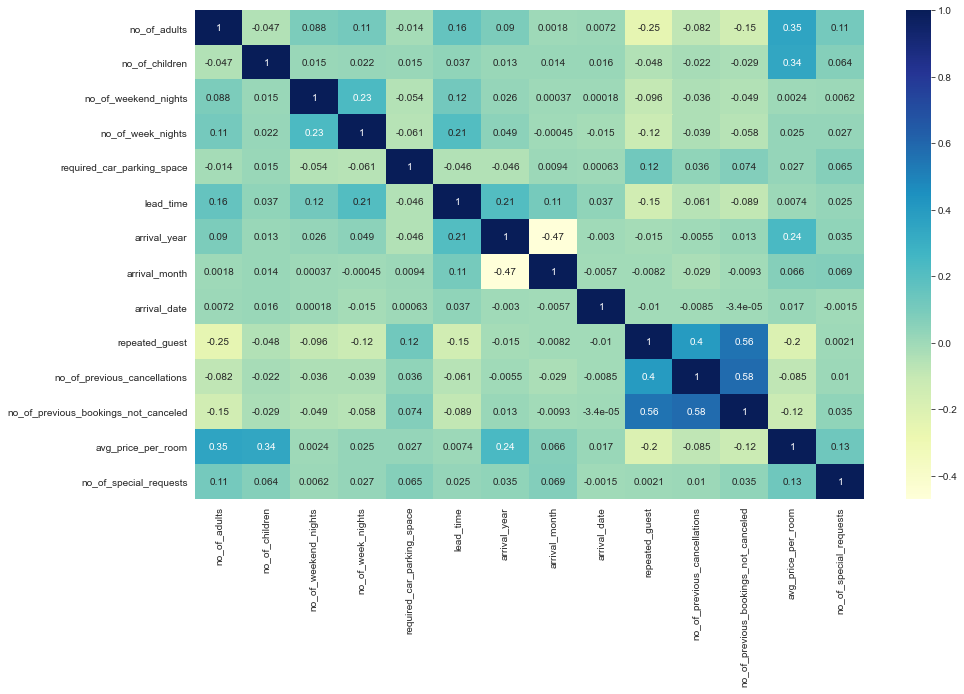

In [245]:
# Heatmap for assessing relation
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

- Number of adults positively correlated to the Average Price Per Room
- Number of children positively correlated to the Average Price Per Room
- Number of weekend nights is related to weekday nights. It might indicate few weekend booking extends during the week day
- The number of week nights have positive relation with lead_time, indicating customers staying on the week nights plan and book ahead.
- Repeated guest and number of previous booking and number of previous cancellations are highly correlated. This makes sense because we only have information about repeated customers.
- Average Price Per Room is highly related to arrival year.
- Average Price Per Room is highly correlated to number of special requests.

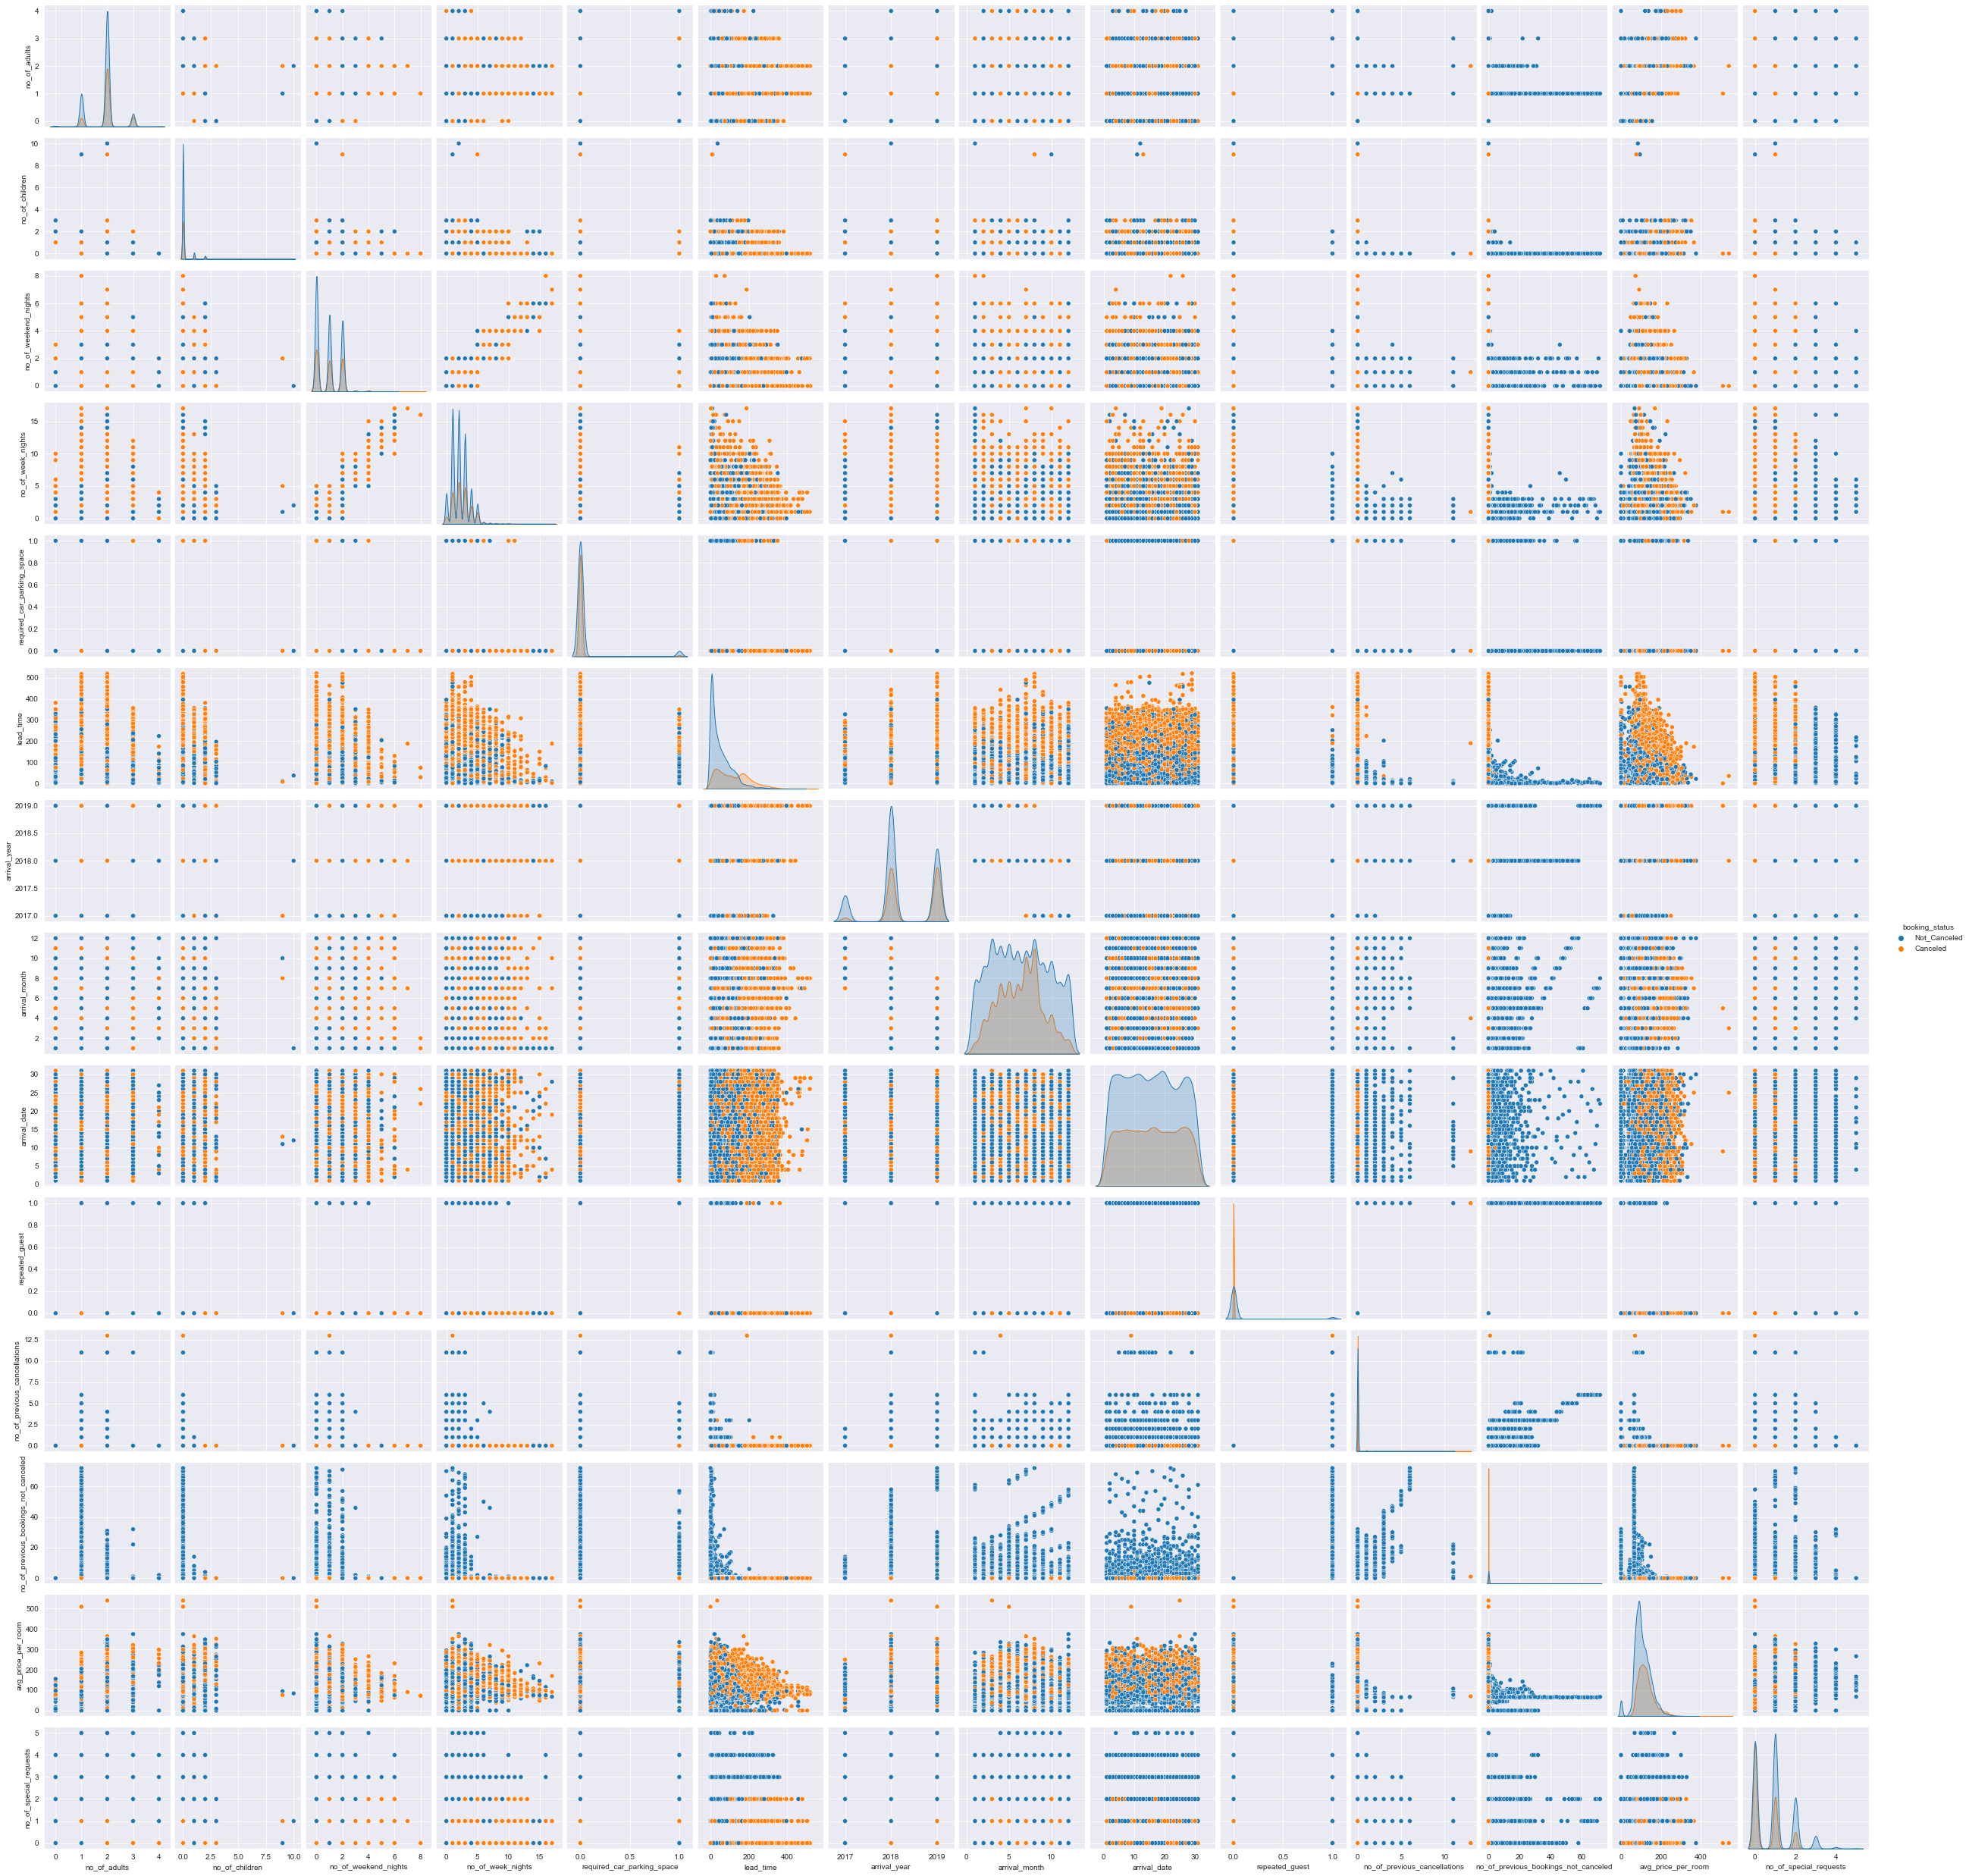

In [246]:
sns.pairplot(data=data, hue="booking_status")
plt.show()

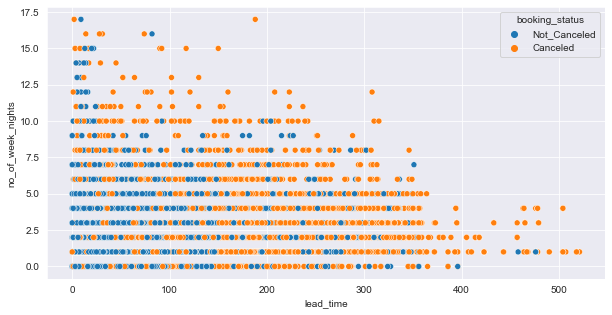

In [247]:
# let's look at significant scatter plots again
plt.figure(figsize=(10, 5))
sns.scatterplot(data["lead_time"], data["no_of_week_nights"], hue=data['booking_status'])
plt.show()

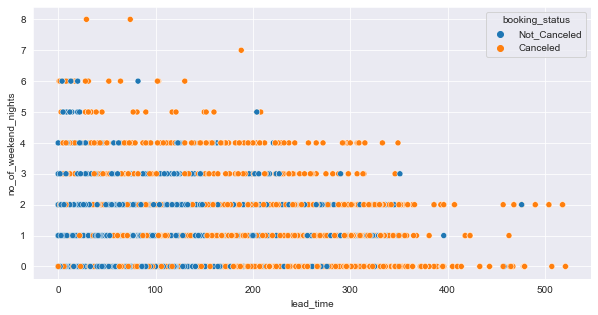

In [248]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data["lead_time"], data["no_of_weekend_nights"], hue=data['booking_status'])
plt.show()

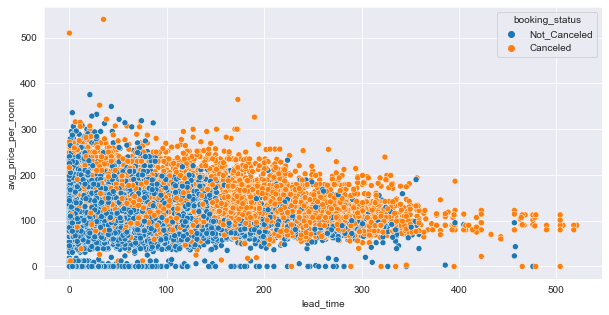

In [249]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data["lead_time"], data["avg_price_per_room"], hue=data['booking_status'])
plt.show()

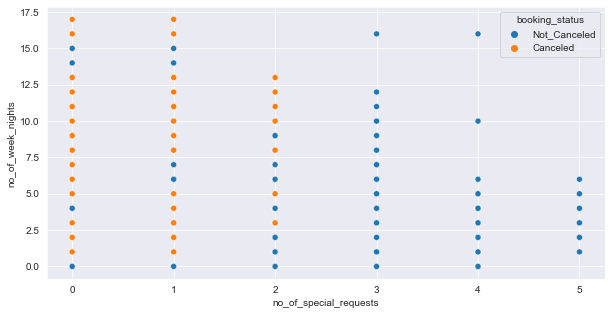

In [250]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data["no_of_special_requests"], data["no_of_week_nights"], hue=data['booking_status'])
plt.show()

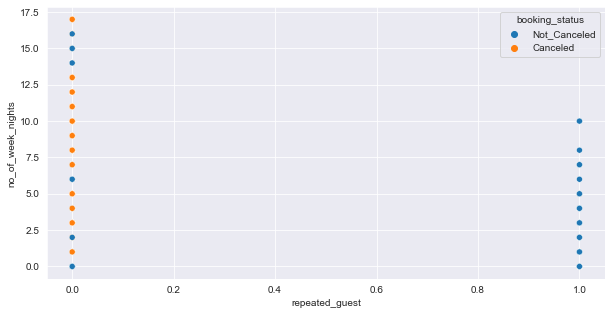

In [251]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data["repeated_guest"], data["no_of_week_nights"], hue=data['booking_status'])
plt.show()

In [252]:
# function to plot stacked bar chart
def stacked_barplot(data, predictor, target):
    """
    Print the category counts and plot a stacked bar chart

    data: dataframe
    predictor: independent variable
    target: target variable
    """
    count = data[predictor].nunique()
    sorter = data[target].value_counts().index[-1]
    tab1 = pd.crosstab(data[predictor], data[target], margins=True).sort_values(
        by=sorter, ascending=False
    )
    print(tab1)
    print("-" * 120)
    tab = pd.crosstab(data[predictor], data[target], normalize="index").sort_values(
        by=sorter, ascending=False
    )
    tab.plot(kind="bar", stacked=True, figsize=(count + 5, 6))
    plt.legend(
        loc="lower left", frameon=False,
    )
    plt.legend(loc="upper left", bbox_to_anchor=(1, 1))
    plt.show()

booking_status     Canceled  Not_Canceled    All
type_of_meal_plan                               
All                   14487         28089  42576
Meal Plan 1           10511         21352  31863
Not Selected           3118          5598   8716
Meal Plan 2             857          1132   1989
Meal Plan 3               1             7      8
------------------------------------------------------------------------------------------------------------------------


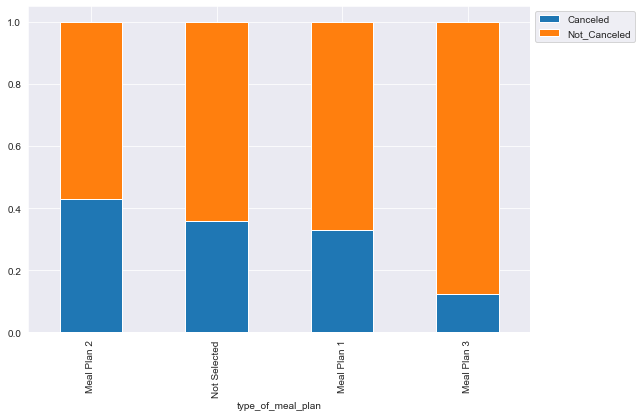

In [253]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

booking_status      Canceled  Not_Canceled    All
room_type_reserved                               
All                    14487         28089  42576
Room_Type 1             9225         20505  29730
Room_Type 4             3683          5686   9369
Room_Type 6              826           714   1540
Room_Type 5              367           539    906
Room_Type 2              274           444    718
Room_Type 7              110           197    307
Room_Type 3                2             4      6
------------------------------------------------------------------------------------------------------------------------


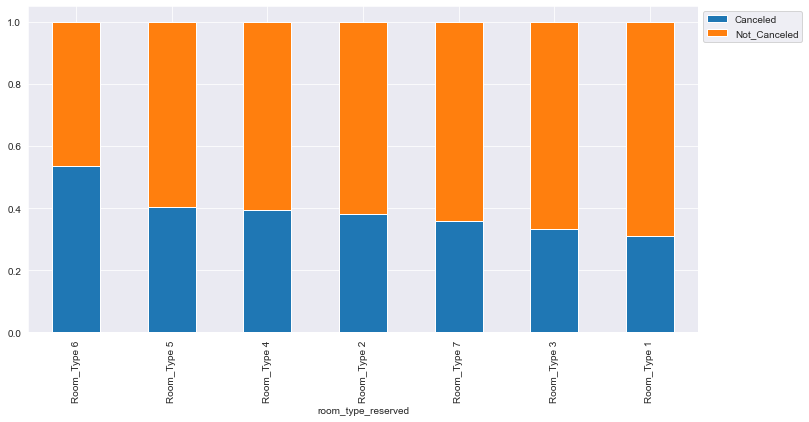

In [254]:
stacked_barplot(data, "room_type_reserved", "booking_status")

booking_status       Canceled  Not_Canceled    All
market_segment_type                               
All                     14487         28089  42576
Online                  13483         20686  34169
Offline                   804          4973   5777
Corporate                 167          1772   1939
Aviation                   33           162    195
Complementary               0           496    496
------------------------------------------------------------------------------------------------------------------------


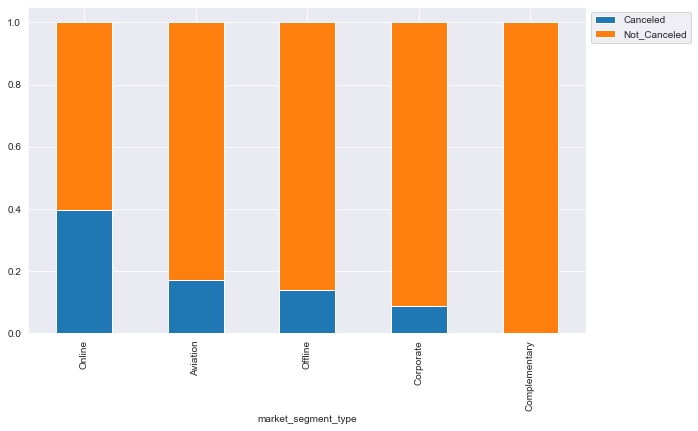

In [255]:
stacked_barplot(data, "market_segment_type", "booking_status")

#### <span style="color:#008000"/>Summary of Bivariate Analysis

- There are more cancellations with higher lead time.
- There is no definite pattern cancellations based on week day or weekend nights.
- The higher average price per room and higher lead time have more cancellations.
- Bookings with 3 or more special requests do not have cancellations.
- Bookings by repeated guests do not have cancellations.
- Customers selecting Meal Plan 3 have lowest number of cancellations.
- Room Type 6 has most number of cancellations.
- Online market segment has most cancellations.
- Complementary bookings have no cancellations.

#### <span style="color:#008000"/>Looking at specific questions

**Questions**:
1. What are the busiest months in the hotel?
2. Which market segment do most of the guests come from?
3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
4. What percentage of bookings are canceled? 
5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?

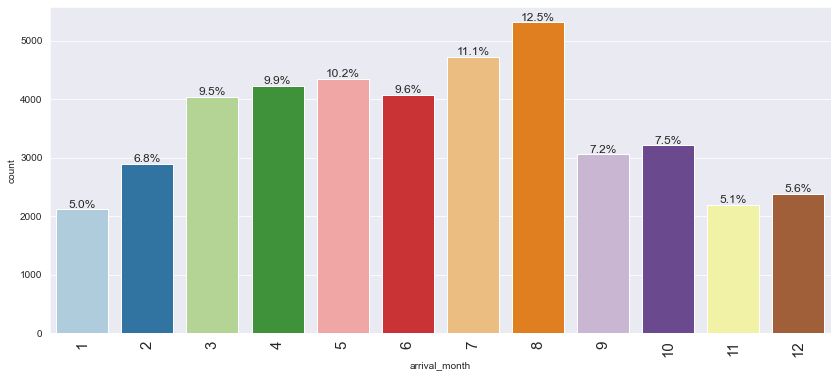

In [256]:
# 1. What are the busiest months in the hotel?
labeled_barplot(data, "arrival_month", perc=True)

- The busiest month is August
- It's followed by July, May, April, March and June
- October to January are the least busy months

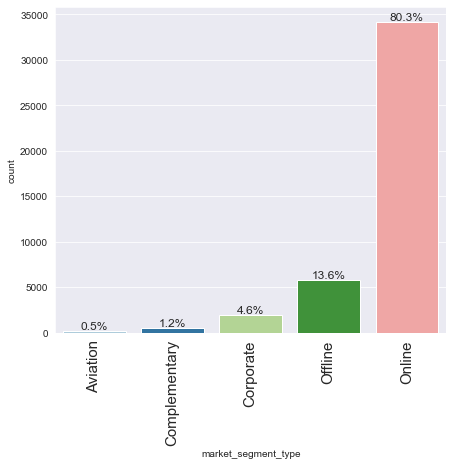

In [257]:
# 2. Which market segment do most of the guests come from?
labeled_barplot(data, "market_segment_type", perc=True)

80% of the guests come from **Online** market segment

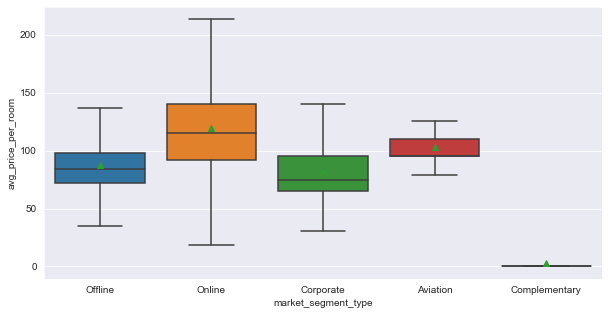

In [258]:
# 3. Hotel rates are dynamic and change according to demand and customer demographics. What are the differences in room prices in different market segments?
plt.figure(figsize=(10, 5))
sns.boxplot(y='avg_price_per_room', x='market_segment_type', data=data, showfliers=False,showmeans=True)
plt.show()

- Online market segment has higher average price per room as compared to other segments
- The mean price per room for Online segment falls  around 120
- The mean price for Aviation segment is 100
- The next segment according to the price is Offline followed by Corporate

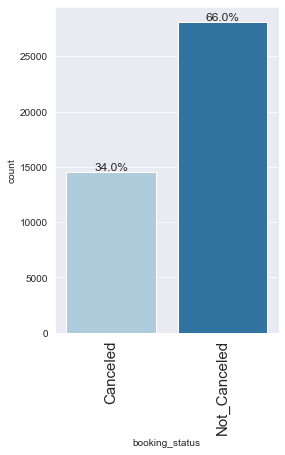

In [259]:
# 4. What percentage of bookings are canceled?
labeled_barplot(data, "booking_status", perc=True)

34% of total bookings are cancelled

In [260]:
def labeled_barplot2(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top
    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """
    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=90, fontsize=15)
    ax = sns.countplot(data=data,x=feature,
        palette="Paired", order=data[feature].value_counts().index[:n].sort_values(),
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()

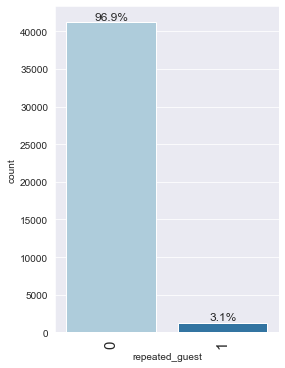

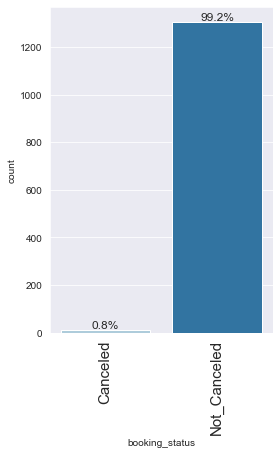

In [261]:
# 5. Repeating guests are the guests who stay in the hotel often and are important to brand equity. What percentage of repeating guests cancel?
labeled_barplot(data, "repeated_guest", perc=True)
data1 = data.query('repeated_guest==1')[['repeated_guest','booking_status']]
labeled_barplot(data1, "booking_status", perc=True)

The percentage of cancellations by repeated customers is less than 1%. However, the numnber of bookings by repeated customer is 3%.

booking_status          Canceled  Not_Canceled    All
no_of_special_requests                               
All                        14487         28089  42576
0                           8752         10476  19228
1                           4346         11225  15571
2                           1389          4992   6381
3                              0          1230   1230
4                              0           150    150
5                              0            16     16
------------------------------------------------------------------------------------------------------------------------


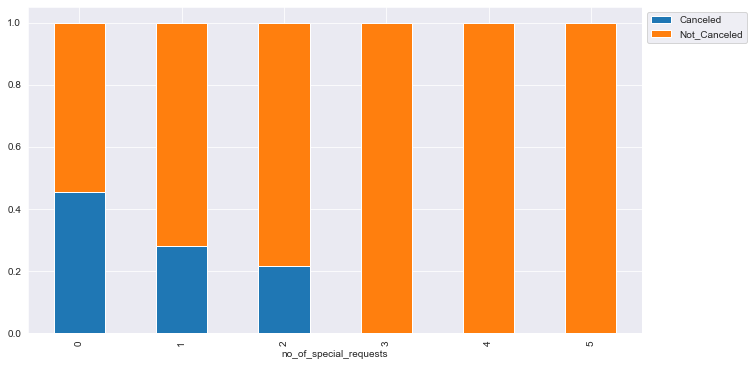

In [262]:
# 6. Many guests have special requirements when booking a hotel room. Do these requirements affect booking cancellation?
stacked_barplot(data, "no_of_special_requests", "booking_status")

- Customers who have less than 3 special requests have cancelletions.
- Customers who have no special requests have higher number of cancellations.

#### <span style="color:#008000"/> Additional Analysis

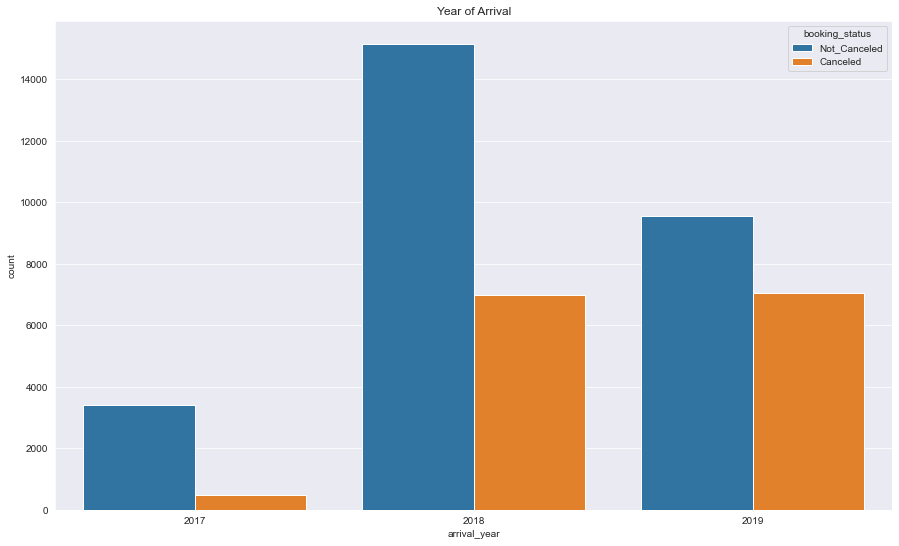

In [263]:
plt.figure(figsize=(15,9))
sns.countplot(x='arrival_year', hue = 'booking_status', data= data)
plt.title('Year of Arrival')
plt.show()

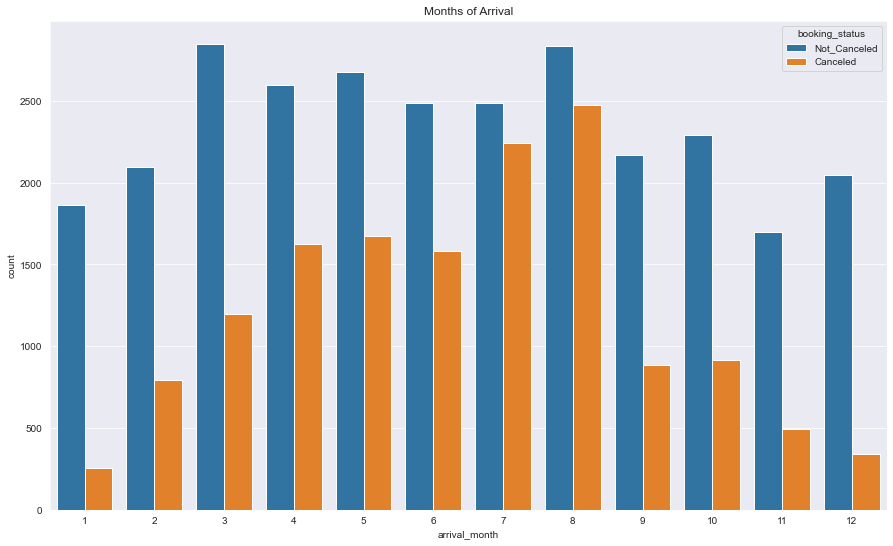

In [264]:
plt.figure(figsize=(15,9))
sns.countplot(x='arrival_month', hue = 'booking_status', data= data)
plt.title('Months of Arrival')
plt.show()

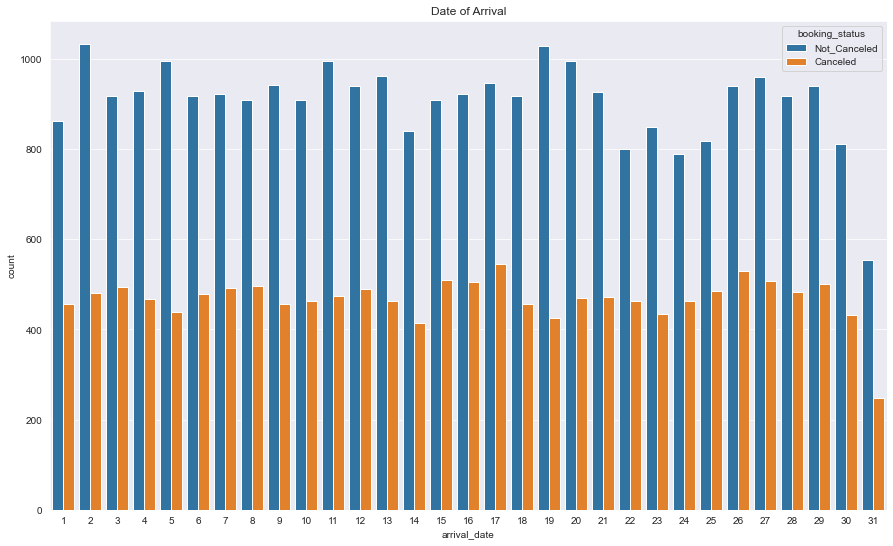

In [265]:
plt.figure(figsize=(15,9))
sns.countplot(x='arrival_date', hue = 'booking_status', data= data)
plt.title('Date of Arrival')
plt.show()

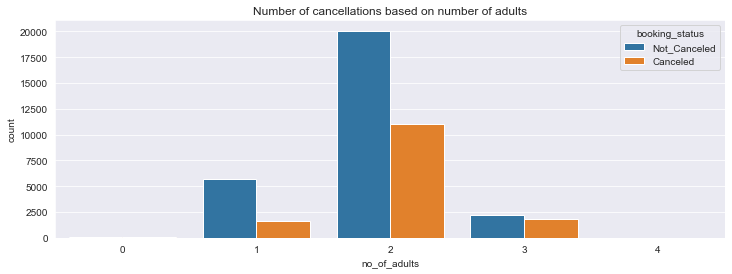

In [266]:
plt.figure(figsize=(12,4))
sns.countplot(x='no_of_adults', hue = 'booking_status', data= data)
plt.title('Number of cancellations based on number of adults')
plt.show()

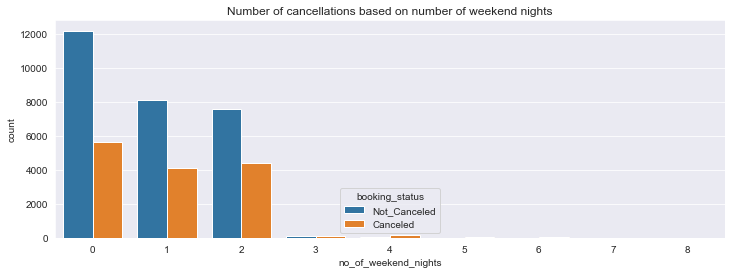

In [267]:
plt.figure(figsize=(12,4))
sns.countplot(x='no_of_weekend_nights', hue = 'booking_status', data= data)
plt.title('Number of cancellations based on number of weekend nights')
plt.show()

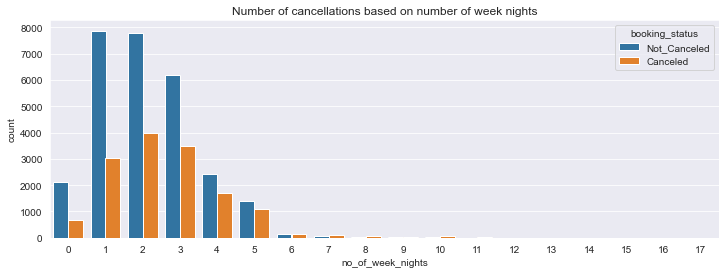

In [268]:
plt.figure(figsize=(12,4))
sns.countplot(x='no_of_week_nights', hue = 'booking_status', data= data)
plt.title('Number of cancellations based on number of week nights')
plt.show()

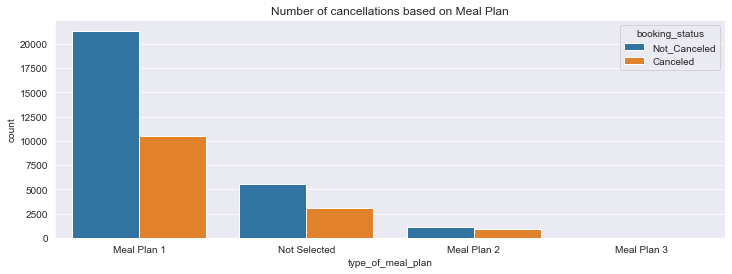

In [269]:
plt.figure(figsize=(12,4))
sns.countplot(x='type_of_meal_plan', hue = 'booking_status', data= data)
plt.title('Number of cancellations based on Meal Plan')
plt.show()

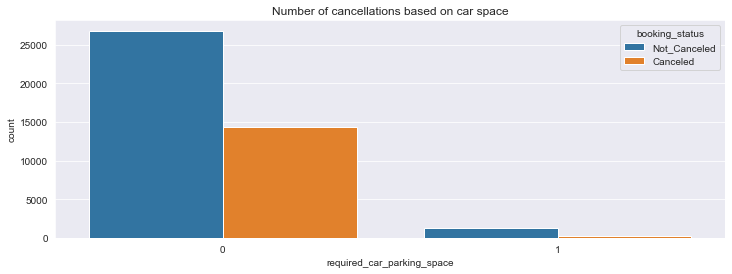

In [270]:
plt.figure(figsize=(12,4))
sns.countplot(x='required_car_parking_space', hue = 'booking_status', data= data)
plt.title('Number of cancellations based on car space')
plt.show()

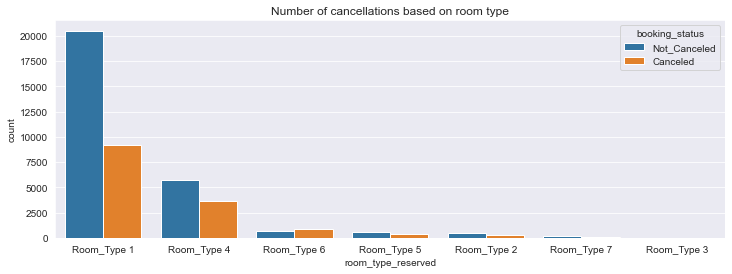

In [271]:
plt.figure(figsize=(12,4))
sns.countplot(x='room_type_reserved', hue = 'booking_status', data= data)
plt.title('Number of cancellations based on room type')
plt.show()

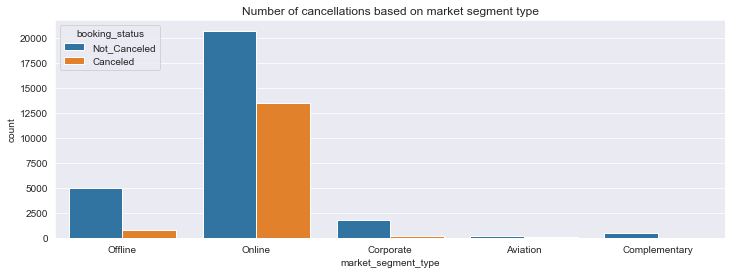

In [272]:
plt.figure(figsize=(12,4))
sns.countplot(x='market_segment_type', hue = 'booking_status', data= data)
plt.title('Number of cancellations based on market segment type')
plt.show()

In [273]:
### function to plot distributions wrt target
def distribution_plot_wrt_target(data, predictor, target):

    fig, axs = plt.subplots(2, 2, figsize=(12, 10))

    target_uniq = data[target].unique()

    axs[0, 0].set_title("Distribution of target for target=" + str(target_uniq[0]))
    sns.histplot(
        data=data[data[target] == target_uniq[0]],
        x=predictor,
        kde=True,
        ax=axs[0, 0],
        color="blue",
        stat="density",
    )

    axs[0, 1].set_title("Distribution of target for target=" + str(target_uniq[1]))
    sns.histplot(
        data=data[data[target] == target_uniq[1]],
        x=predictor,
        kde=True,
        ax=axs[0, 1],
        color="yellow",
        stat="density",
    )

    axs[1, 0].set_title("Boxplot w.r.t target")
    sns.boxplot(data=data, x=target, y=predictor, ax=axs[1, 0], palette="Set2")

    axs[1, 1].set_title("Boxplot (without outliers) w.r.t target")
    sns.boxplot(
        data=data,
        x=target,
        y=predictor,
        ax=axs[1, 1],
        showfliers=False,
        palette="Set2",
    )

    plt.tight_layout()
    plt.show()

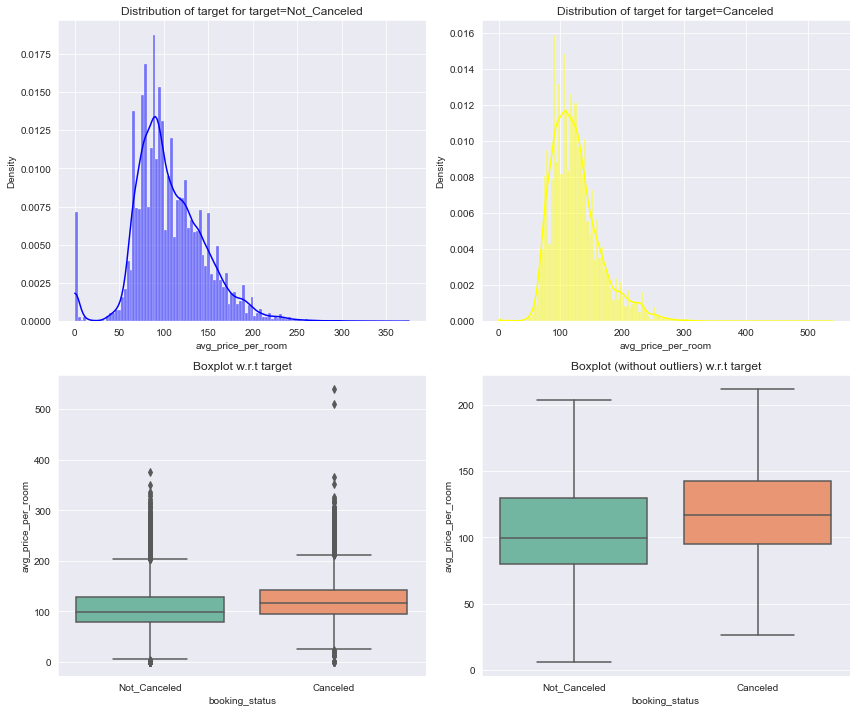

In [274]:
# average price room vs cancellations
distribution_plot_wrt_target(data, "avg_price_per_room", "booking_status")

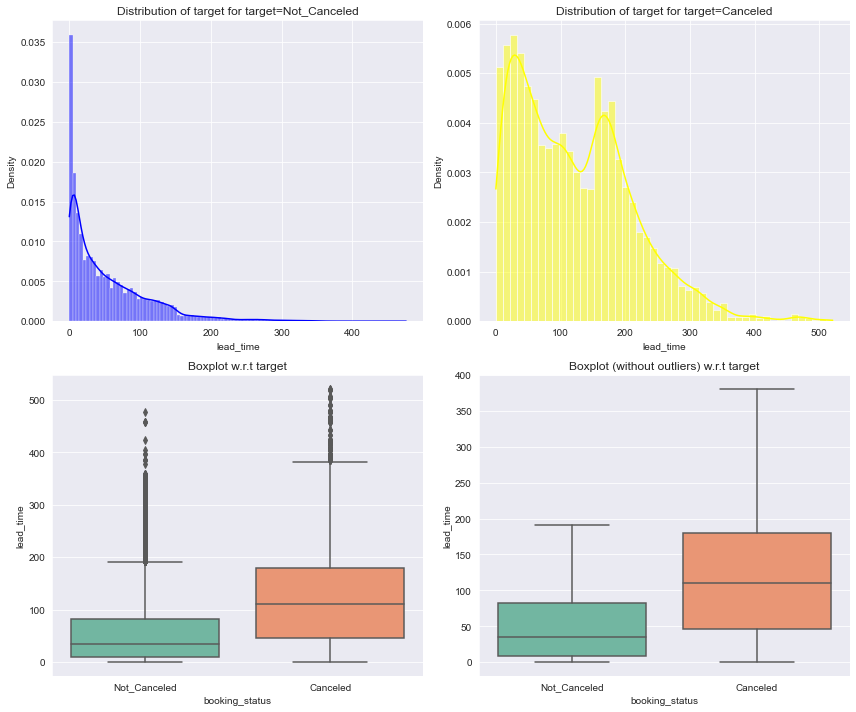

In [275]:
# lead time vs cancellations
distribution_plot_wrt_target(data, "lead_time", "booking_status")

## <span style="color:#008000"/>EDA Summary
- Maximum of the bookings are for 2 adults
- Bookings are made for 0-2 weekend nights are most popular
- For the week nights, the guests typically book for 2 week days
- The average room price median is 110 and mean is 112
- Meal Plan 1 is the most popular, 75% of the guests select this option
- Room Type 1 has the most bookings 70%
- Room Type 3 is is the least reserved type of room
- 80% of the guests make reservations online, followed by 13% of offline reservations
- 35% of overall booking gets cancelled incurring high amount loses for the hotel
- The average price per room is highly related with number of adults and children, which make sense as that’s how hotels determine pricing
- Repeated guest, number of previous cancellations and number of previous bookings are highly correlated. That understandable as we only have previous information only available for repeated guests
- The arrival date is uniform, there is slight drop in 31 - reasonable as not all months have 31 date
- The average price per room is higher as the lead time is reduces
- The cancellations occurs only for weekend nights
- Room type is not significant for cancellation
- March - August are the most popular months for the hotels
- Chances of repeated guest cancelling is less than 1%
- July and August are most popular months, however these months also have the maximum number of cancellations
- There are significant outliers in lead time and average price per room. These need to be handled in data processing

## <span style="color:#008000"/>Data Preprocessing

- Missing value treatment (if needed)
- Feature engineering (if needed)
- Outlier detection and treatment (if needed)
- Preparing data for modeling 
- Any other preprocessing steps (if needed)

In [276]:
# Missing value treatment
data.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

**No missing values**

In [277]:
# Feature Engineering

# Let's convert target variable to 0 and 1
booking_dict = {'Not_Canceled':0,'Canceled':1}
data['booking_status']= data['booking_status'].map(booking_dict)

In [278]:
data.sample(10)

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
27078             2               0                     2                  3   
19112             2               0                     0                  2   
3661              2               1                     3                  7   
49392             2               0                     0                  3   
30975             3               0                     1                  2   
4834              2               0                     2                  3   
16822             2               0                     0                  4   
7432              2               0                     0                  4   
19791             1               0                     1                  3   
43976             2               0                     1                  3   

      type_of_meal_plan  required_car_parking_space room_type_reserved  \
27078       Meal Plan 1                           0        Room_Type 1   
19112       Meal Plan 1                           1        Room_Type 1   
3661        Meal Plan 1                           0        Room_Type 1   
49392      Not Selected                           0        Room_Type 1   
30975       Meal Plan 1                           0        Room_Type 4   
4834        Meal Plan 2                           0        Room_Type 1   
16822       Meal Plan 1                           0        Room_Type 4   
7432        Meal Plan 1                           0        Room_Type 4   
19791       Meal Plan 1                           0        Room_Type 1   
43976       Meal Plan 1                           0        Room_Type 1   

       lead_time  arrival_year  arrival_month  arrival_date  \
27078         63          2018              9             1   
19112          6          2018              3             2   
3661         307          2019              6            30   
49392        235          2019              7             6   
30975         70          2018              4             4   
4834         219          2018             12            22   
16822          9          2018              5            10   
7432          35          2019              3             1   
19791        209          2018              9            29   
43976          3          2017              8            17   

      market_segment_type  repeated_guest  no_of_previous_cancellations  \
27078              Online               0                             0   
19112           Corporate               1                             0   
3661               Online               0                             0   
49392              Online               0                             0   
30975              Online               0                             0   
4834               Online               0                             0   
16822              Online               0                             0   
7432               Online               0                             0   
19791              Online               0                             0   
43976           Corporate               0                             0   

       no_of_previous_bookings_not_canceled  avg_price_per_room  \
27078                                     0              107.10   
19112                                     2               78.00   
3661                                      0              120.69   
49392                                     0               89.10   
30975                                     0              128.70   
4834                                      0              106.25   
16822                                     0              148.50   
7432                                      0              104.73   
19791                                     0              111.35   
43976                                     0              130.00   

       no_of_special_requests  booking_status  
27078

In [279]:
# convert the object variables into categorical
cat_features = ['type_of_meal_plan', 'room_type_reserved', 'market_segment_type']

for colname in cat_features:
    data[colname] = data[colname].astype('category')
    
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 42576 entries, 0 to 56924
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype   
---  ------                                --------------  -----   
 0   no_of_adults                          42576 non-null  int64   
 1   no_of_children                        42576 non-null  int64   
 2   no_of_weekend_nights                  42576 non-null  int64   
 3   no_of_week_nights                     42576 non-null  int64   
 4   type_of_meal_plan                     42576 non-null  category
 5   required_car_parking_space            42576 non-null  int64   
 6   room_type_reserved                    42576 non-null  category
 7   lead_time                             42576 non-null  int64   
 8   arrival_year                          42576 non-null  int64   
 9   arrival_month                         42576 non-null  int64   
 10  arrival_date                          42576 non-null  int64   
 11  ma

In [280]:
num_cols1 = ['no_of_weekend_nights','no_of_week_nights', 'lead_time','avg_price_per_room', 'no_of_special_requests']

In [281]:
# As no_of_adults and no_of_children are all acceptable values, excluding them from outlier treatment.
# Not applying outlier treatment for 'no_of_previous_cancellations' and 'no_of_previous_bookings_not_canceled' as there are only 3% repeated guest which will have this data.

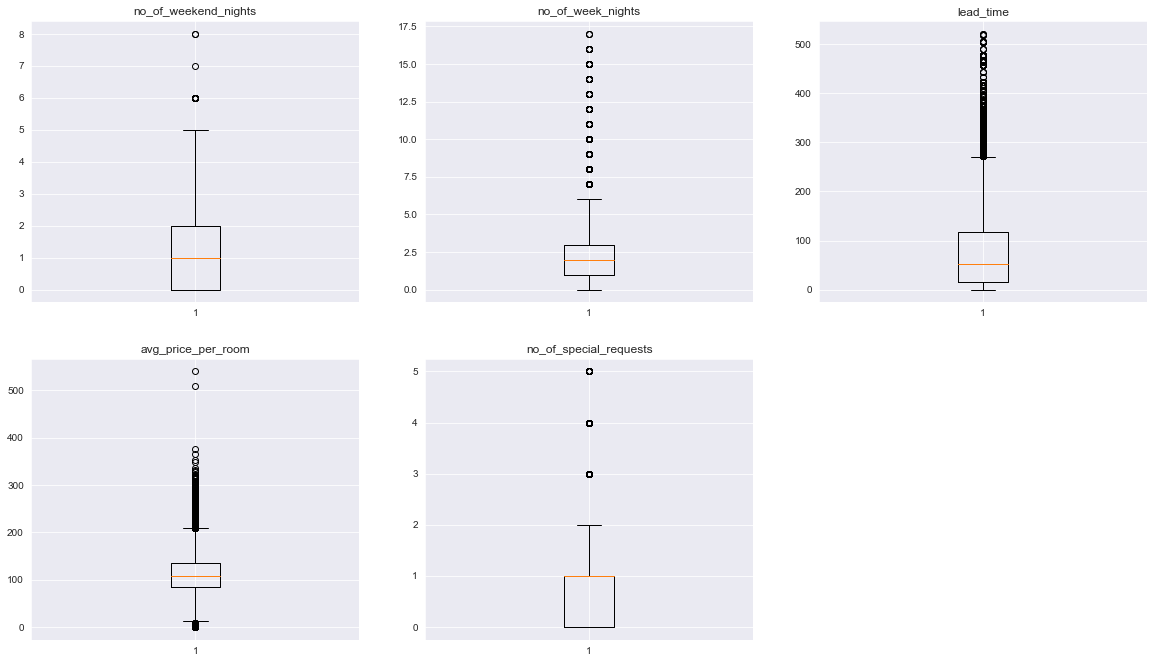

In [282]:
# Outlier detection
# let's plot the boxplots of all columns to check for outliers
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols1):
    plt.subplot(5, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.title(variable)

plt.show()

In [283]:
# treat outliers using IQR 
# smaller values will be assigned lower whisker value and higher values will be assigned upper whisker value
def treat_outliers(data, col):
    Q1 = data[col].quantile(0.25)
    Q3 = data[col].quantile(0.75)
    IQR = Q3 - Q1
    LW = Q1 - 1.5 * IQR
    UW = Q3 + 1.5 * IQR

    # all the values smaller than Lower_Whisker will be assigned the value of Lower_Whisker
    # all the values greater than Upper_Whisker will be assigned the value of Upper_Whisker
    data[col] = np.clip(data[col], LW, UW)

    return data

In [284]:
for c in num_cols1:
    data = treat_outliers(data, c)

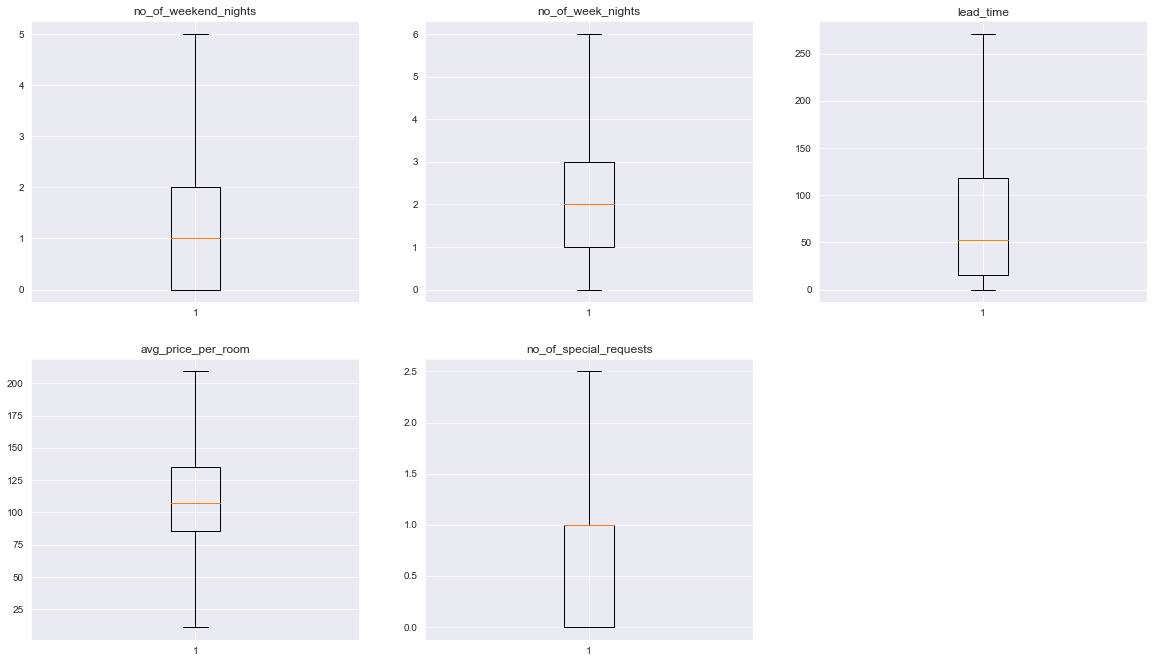

In [285]:
# let's check boxlots after outlier treatment
plt.figure(figsize=(20, 30))

for i, variable in enumerate(num_cols1):
    plt.subplot(5, 3, i + 1)
    plt.boxplot(data[variable], whis=1.5)
    plt.title(variable)

plt.show()

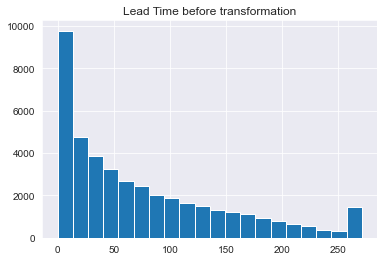

In [286]:
# Transformations on the continuous features - Lead time
data['lead_time'].hist(bins=20)
plt.title('Lead Time before transformation')
plt.show()

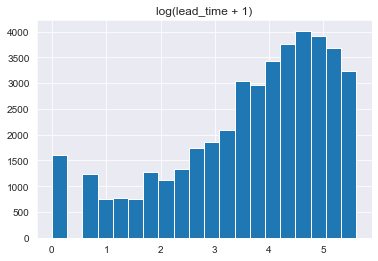

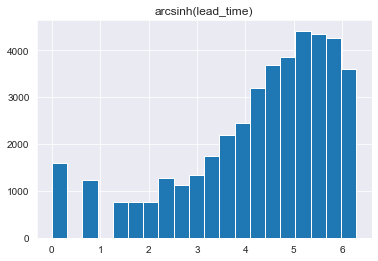

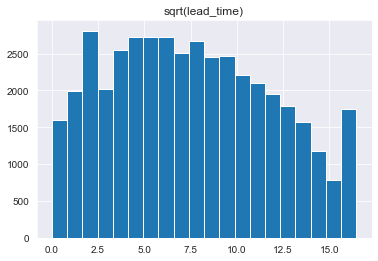

In [287]:
plt.hist(np.log(data['lead_time'] + 1), 20)
plt.title('log(lead_time + 1)')
plt.show()
plt.hist(np.arcsinh(data['lead_time']), 20)
plt.title('arcsinh(lead_time)')
plt.show()
plt.hist(np.sqrt(data['lead_time']), 20)
plt.title('sqrt(lead_time)')
plt.show()

In [288]:
# Let's use sqrt for lead time as it's more normalized
data['lead_time_log'] = np.sqrt(data['lead_time'])

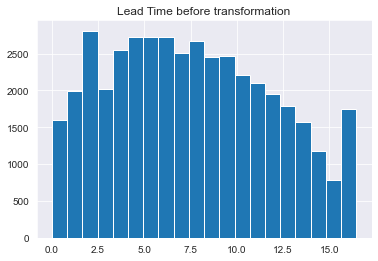

In [289]:
# Let's look how lead_time_log looks
data['lead_time_log'].hist(bins=20)
plt.title('Lead Time before transformation')
plt.show()

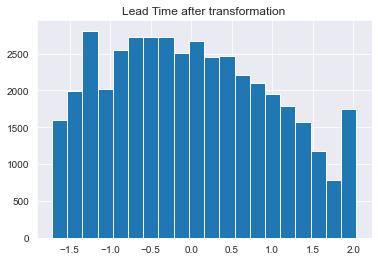

In [290]:
std_scaler = StandardScaler()

data['lead_time_log'] = std_scaler.fit_transform(data[['lead_time_log']])
data['lead_time_log'].hist(bins=20)
plt.title('Lead Time after transformation')
plt.show()

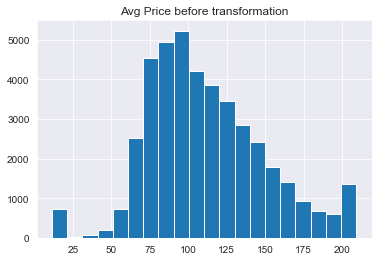

In [291]:
# Transformations on the continuous features - Average Price Per Room
data['avg_price_per_room'].hist(bins=20)
plt.title('Avg Price before transformation')
plt.show()

In [292]:
data['avg_price_per_room'].skew()

0.4117702639102156

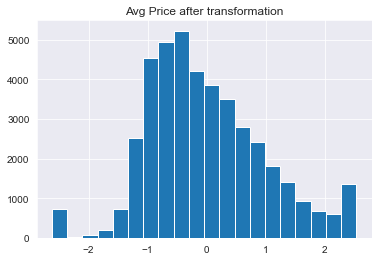

In [293]:
# The skewness of Avg Price Per Room is less. We'll just standardize the feature.
data['avg_price_per_room_log'] = std_scaler.fit_transform(data[['avg_price_per_room']])
data['avg_price_per_room_log'].hist(bins=20)
plt.title('Avg Price after transformation')
plt.show()

## <span style="color:#008000"/> Exploratory Data Analysis (EDA)

Exploratory Data Analysis after data pre-processing

In [294]:
# list all the numeric columns
num_cols = data.select_dtypes([np.number]).columns

In [295]:
# list all the categorical columns
cat_cols = data.columns[data.dtypes == 'category']

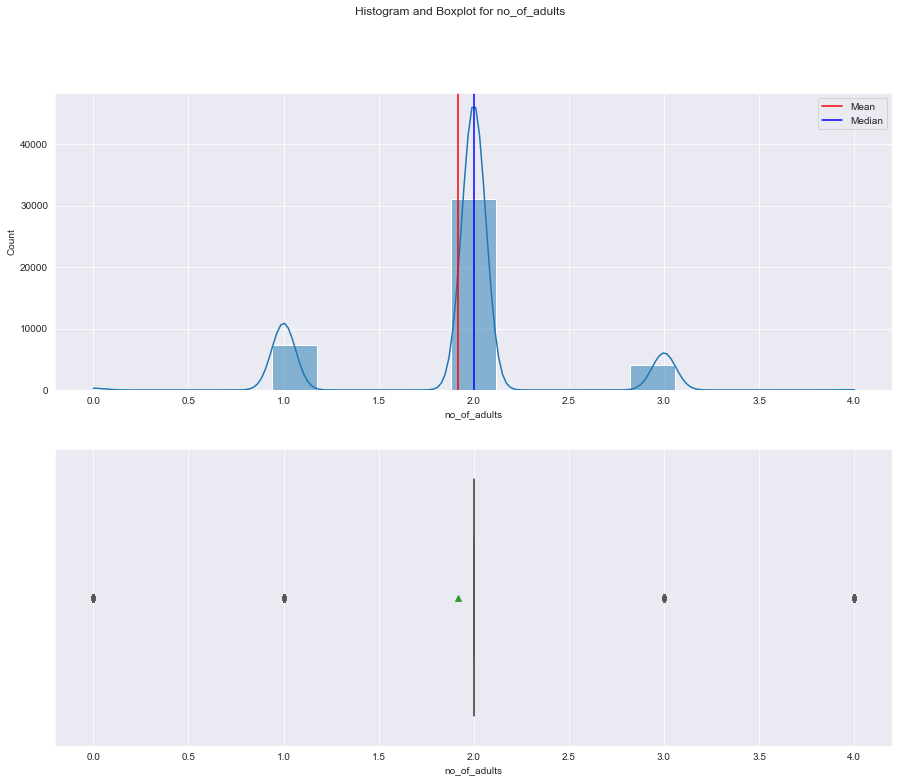

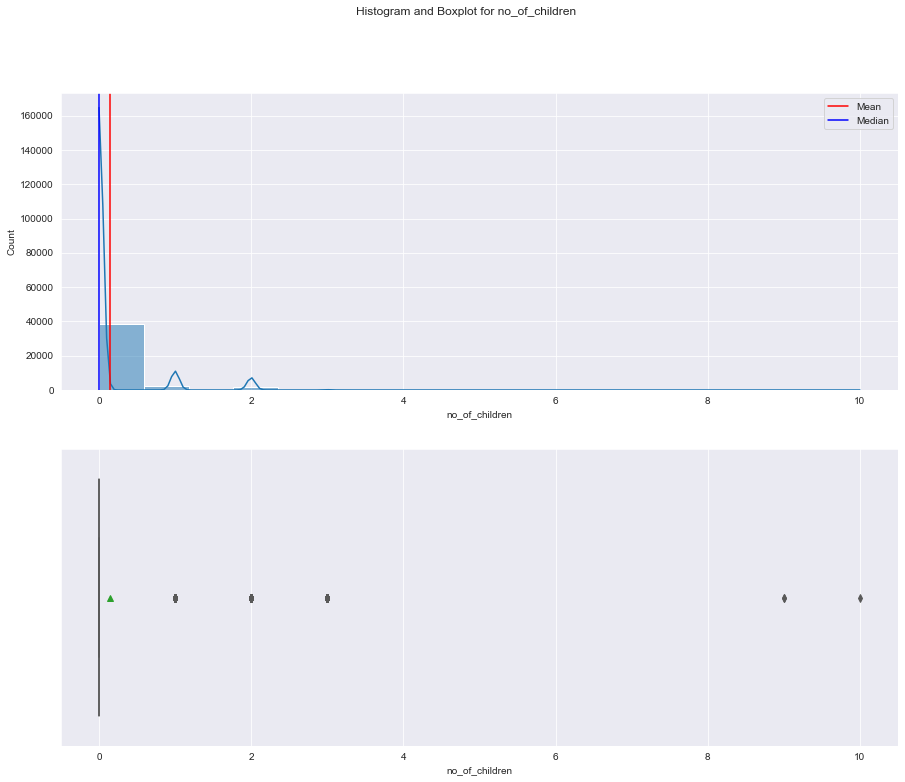

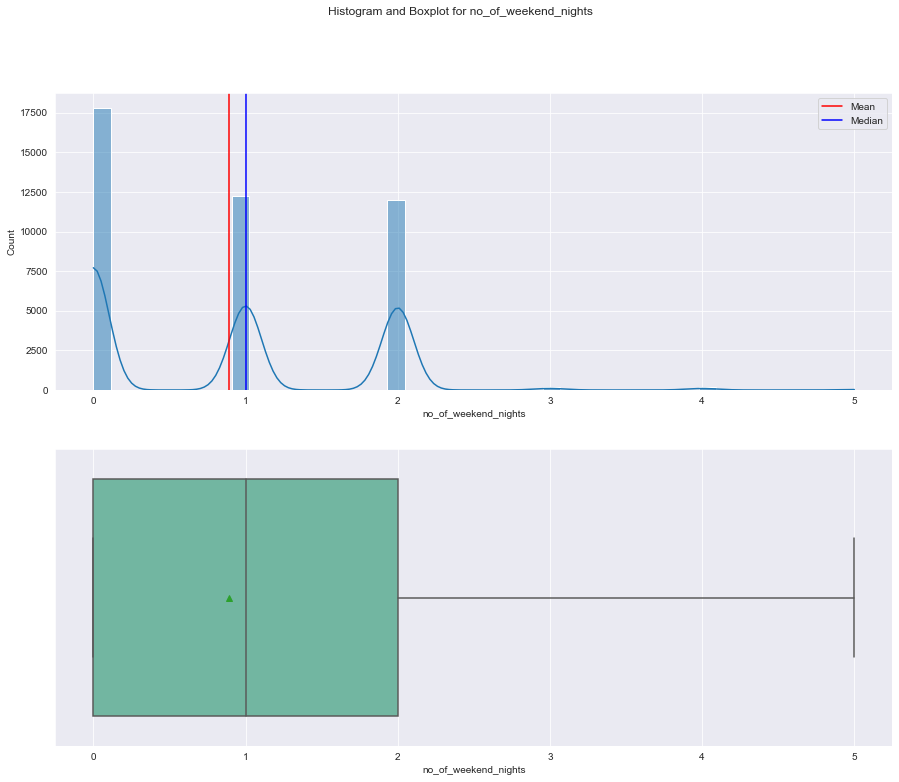

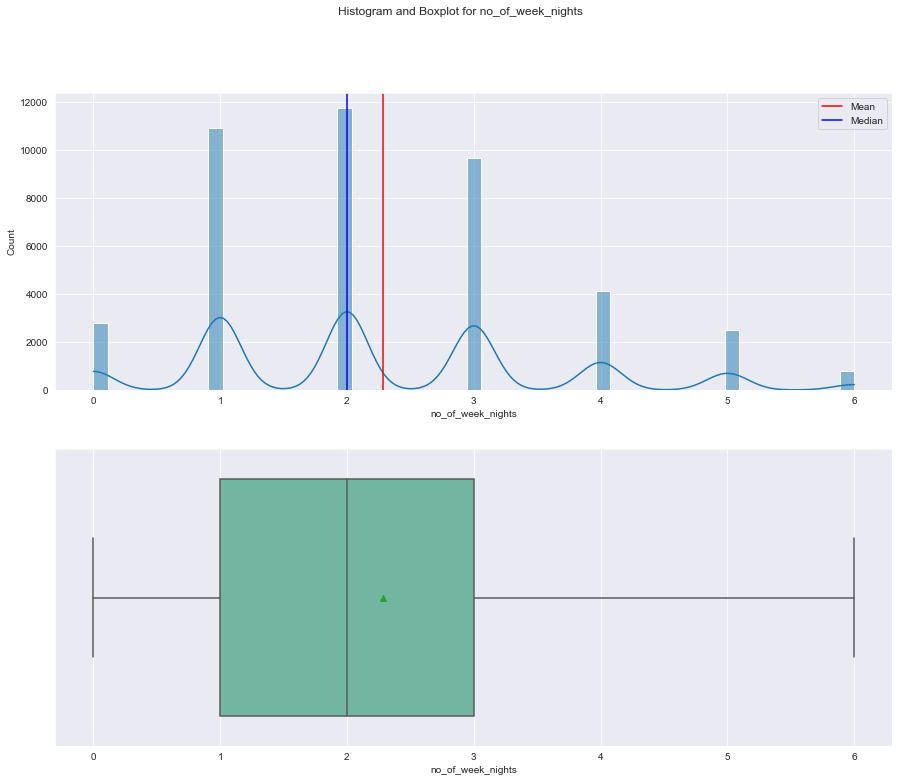

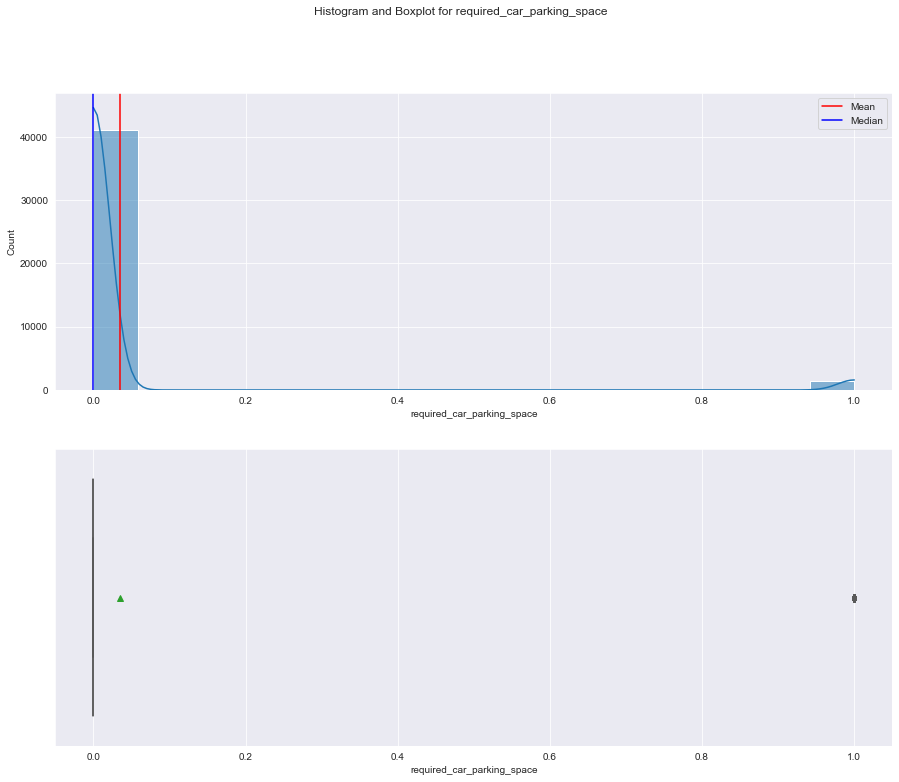

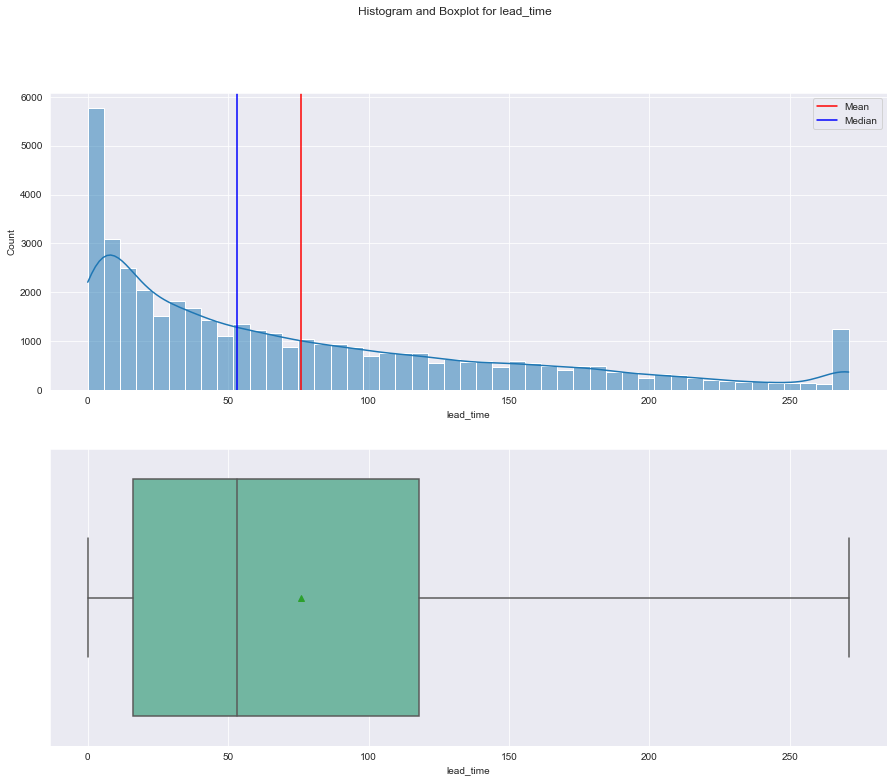

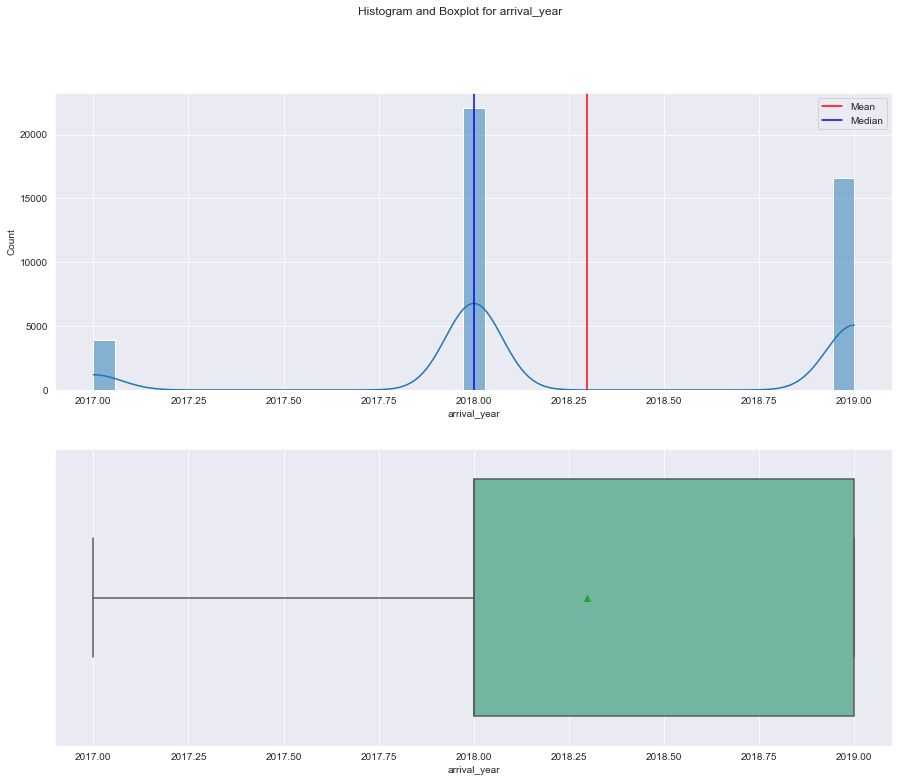

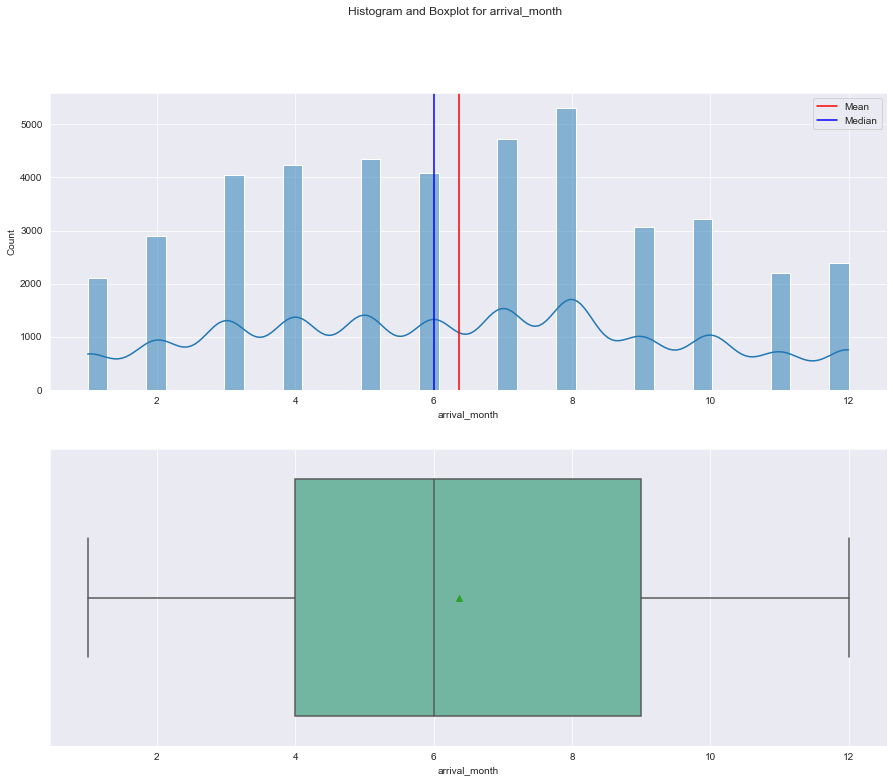

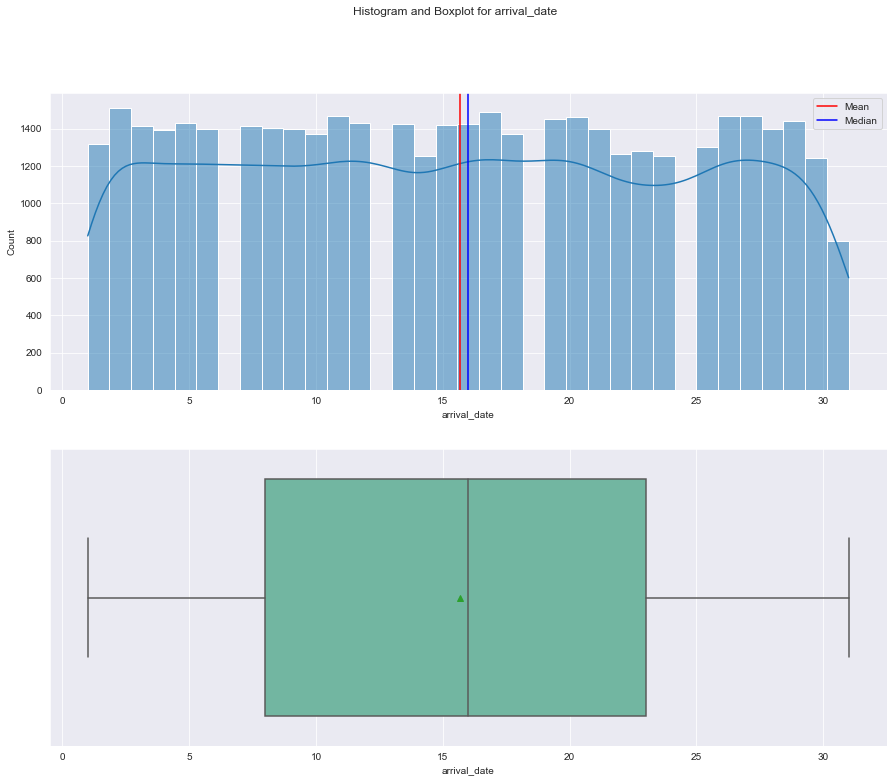

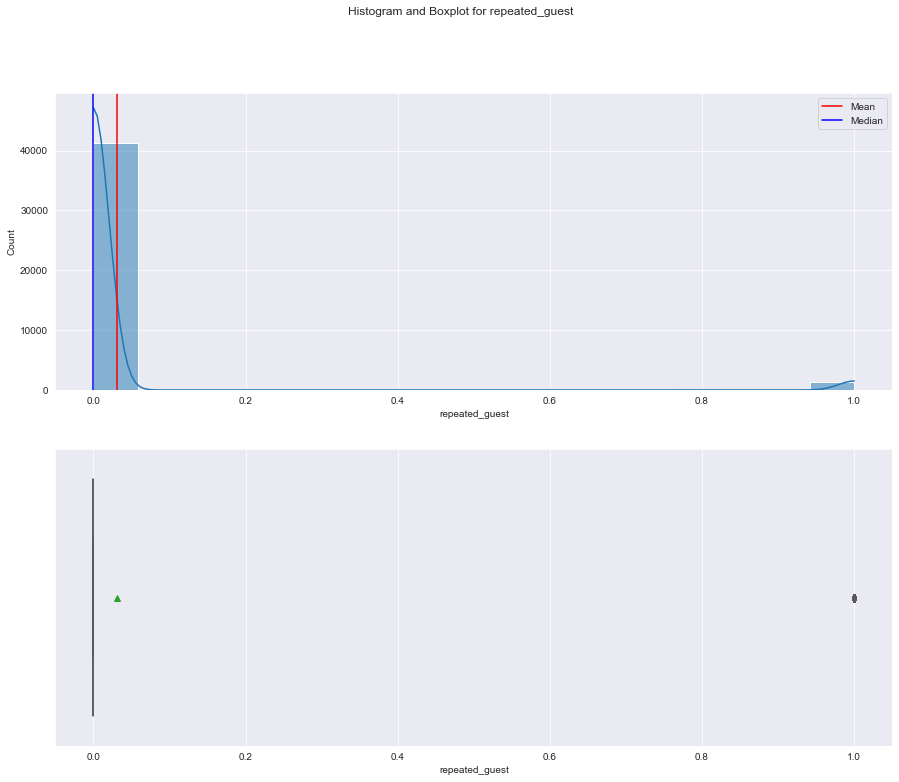

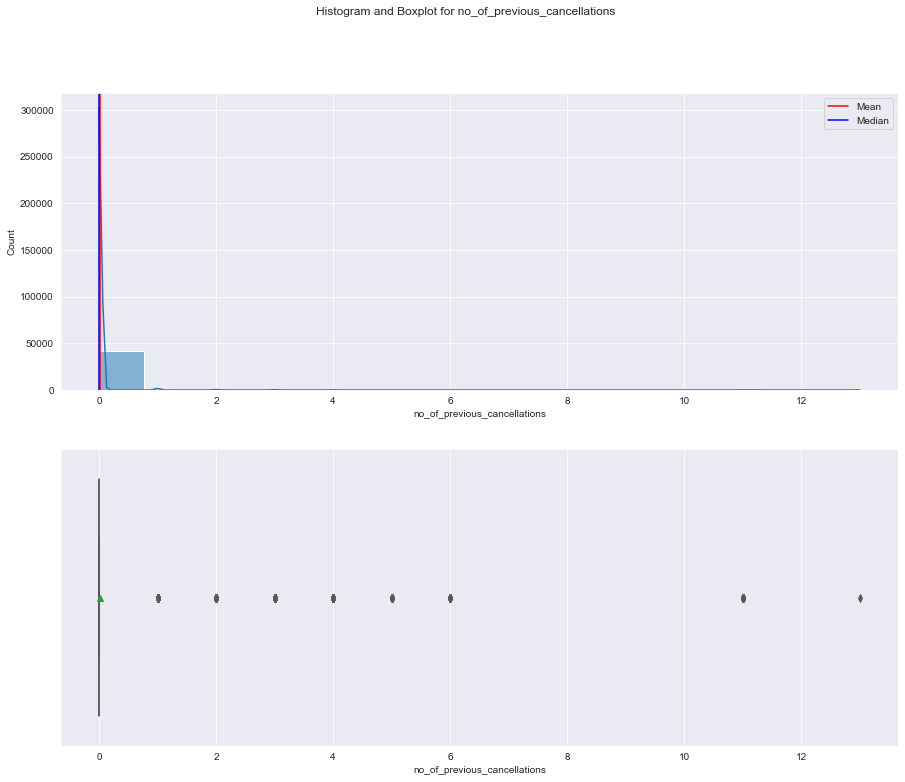

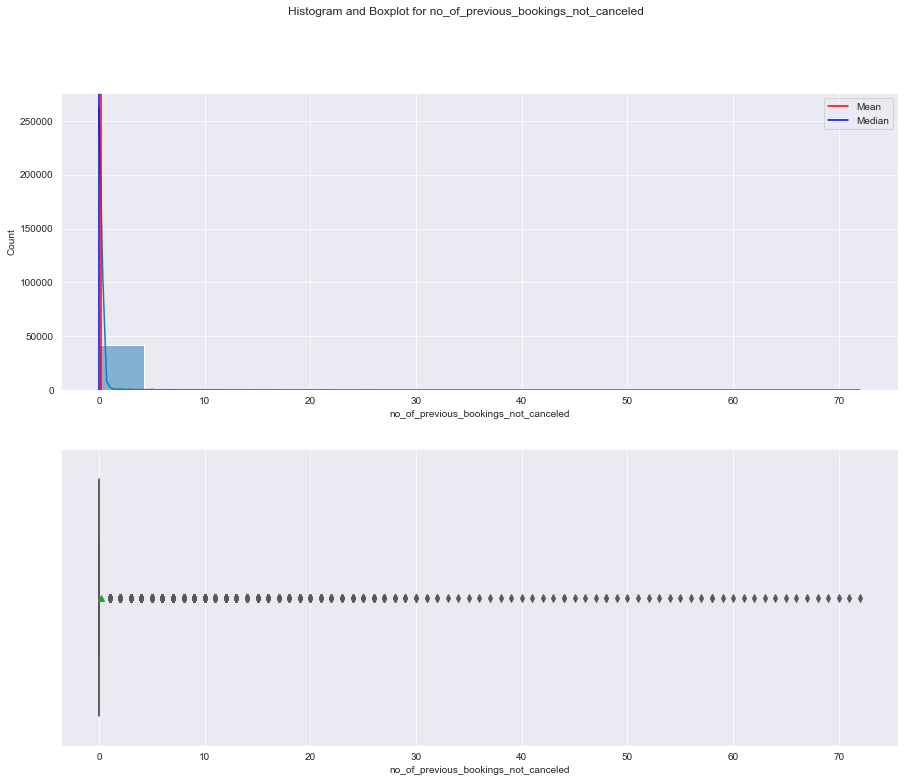

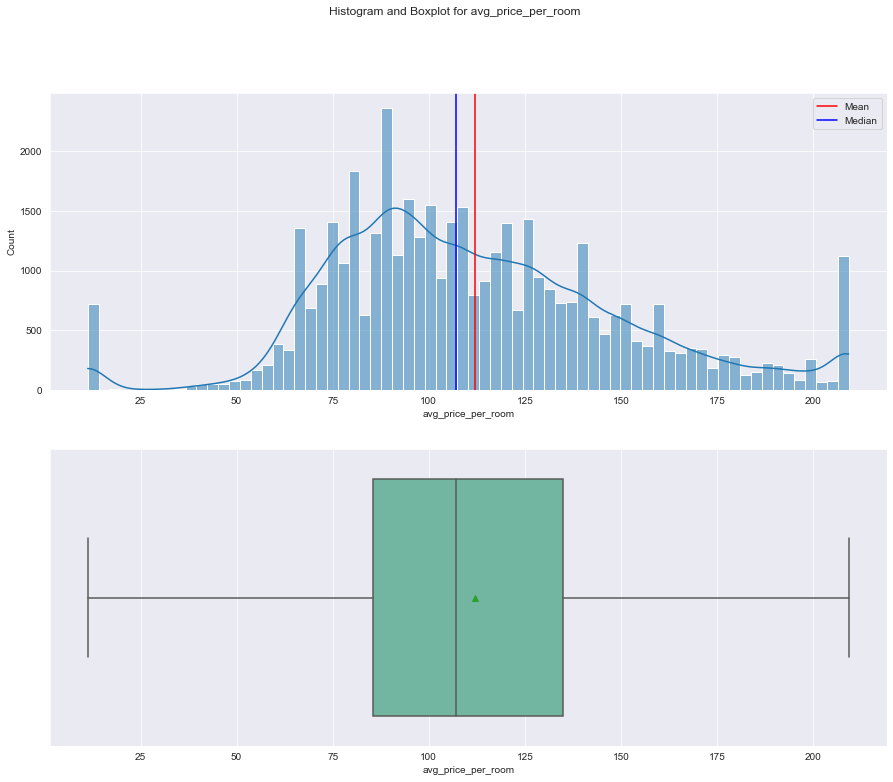

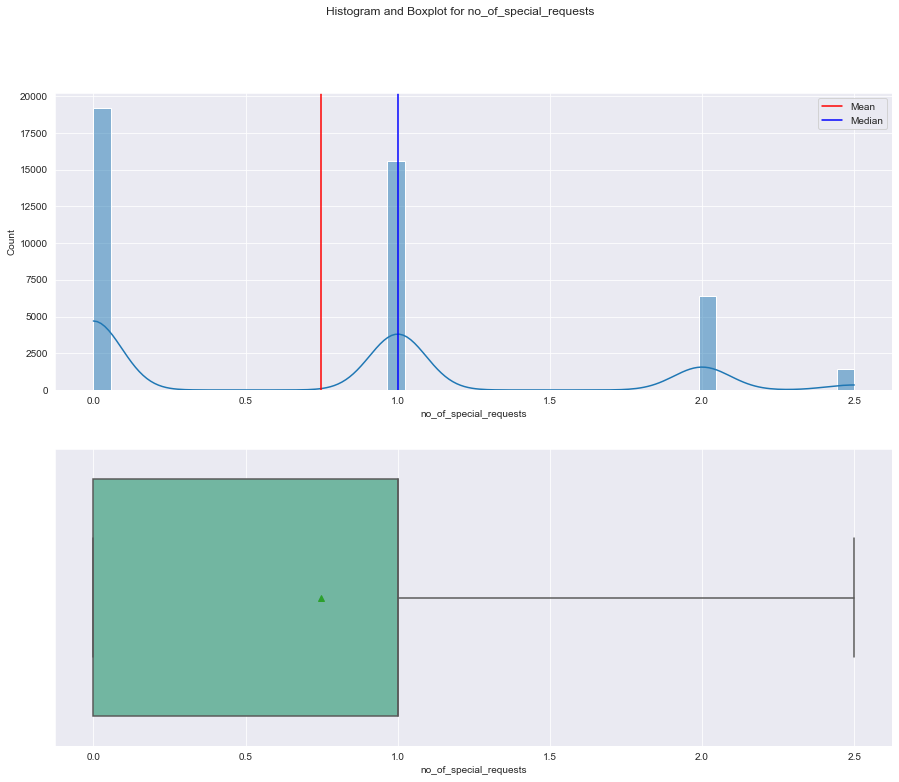

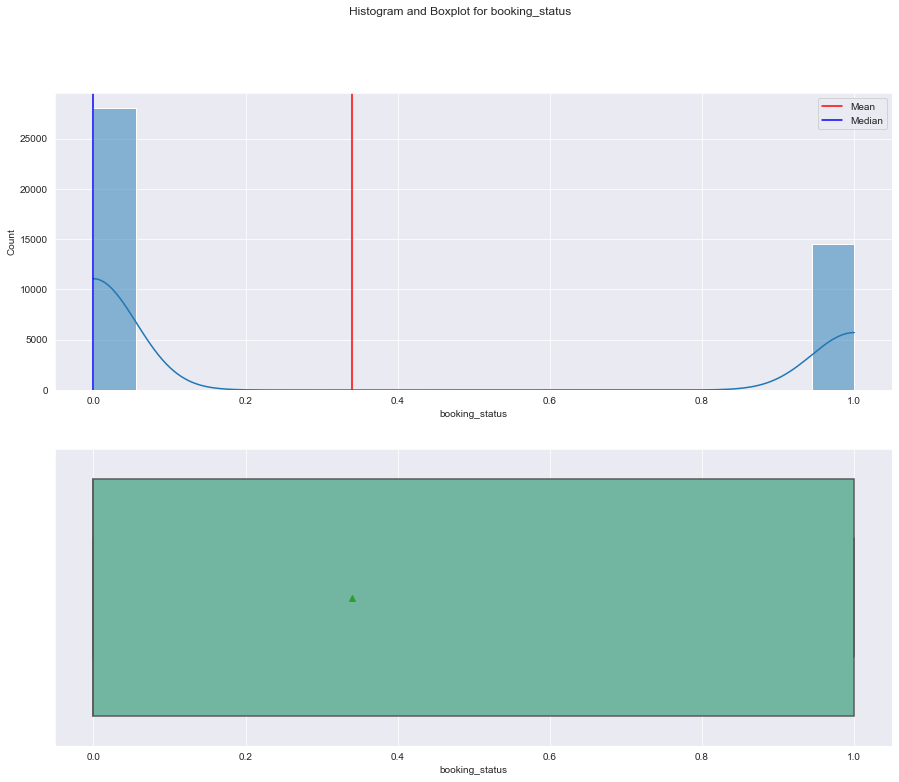

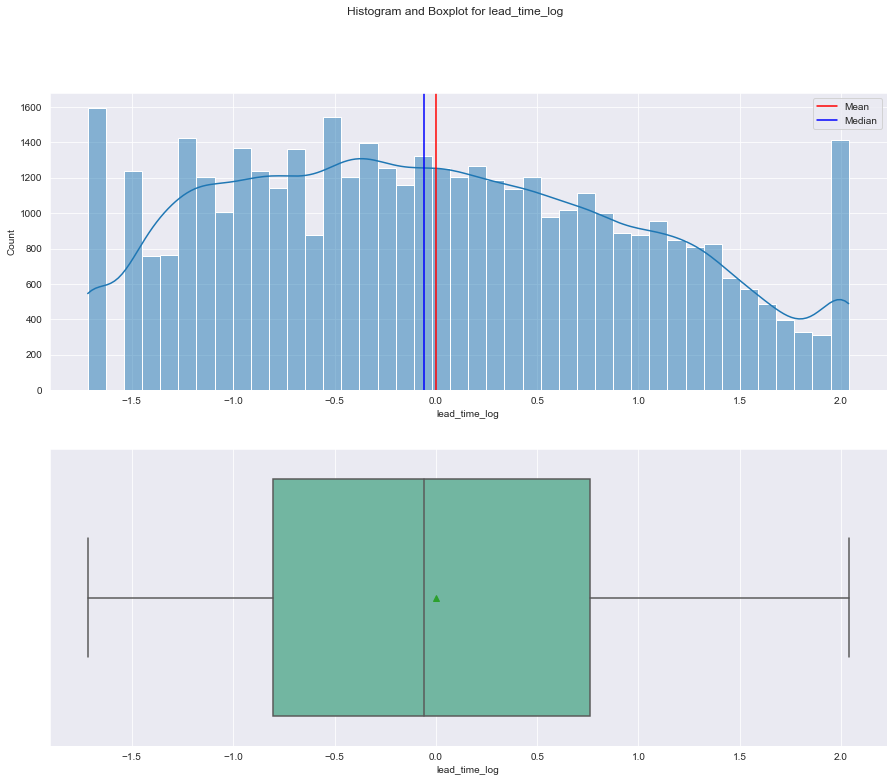

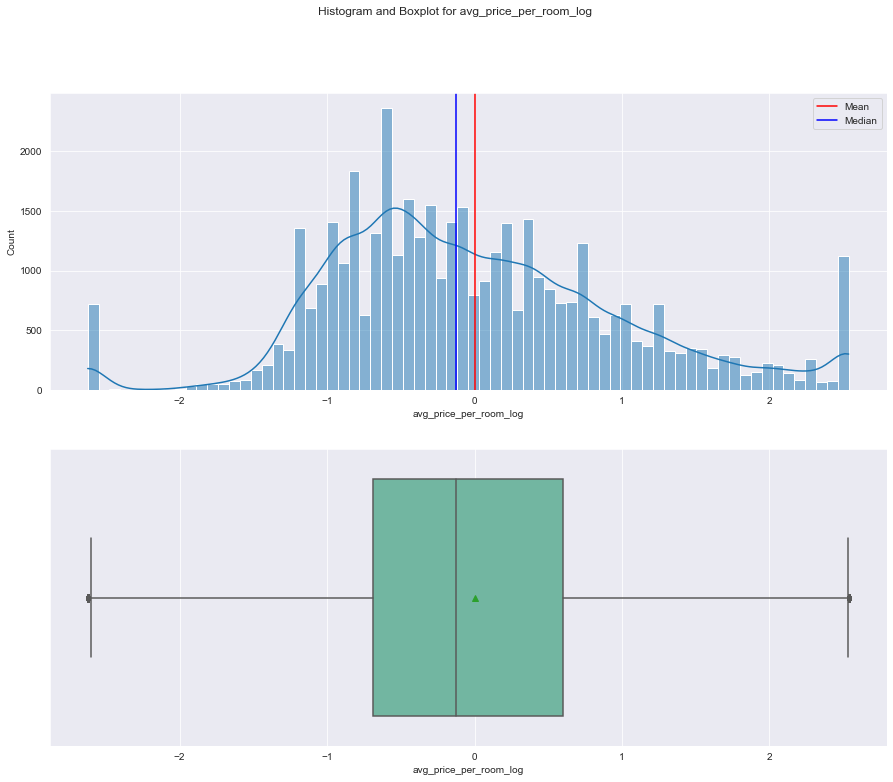

In [296]:
# plotting numerical columns graphs
for i in num_cols:
    Hist_Bar_Plt(data[i],i)

#### <span style="color:#008000"/>Summary of Univariate Analysis of the Numerical Variables

- **No of Adults**:
Most of the rooms have booking for 2 adults.
For a booking, the number of adults goes up to 4.

- **No of Children**:
Most of the bookings have 0 children.
Most of the number of children between 2-4. There are few bookings where number of children are 8-10.

- **Number of Weekend Nights**:
Most of the bookings have 0 weekend nights.
Number of bookings with 1 weekend night are almost equal to 2 weekend nights, indicating the guests tend to book for the entire weekend.

- **Number of Week Nights**:
Most of the bookings fall between 0 - 5 week nights.
There are few long term bookings where the number of week nights are between 6 - 17.5.

- **Required Car Parking Space**:
There are vey few bookings which have selected car parking space.

- **Lead Time**:
The mean lead time falls around 75 days.
The median lead time is around 60 days.
The data is slightly right skewed.

- **Arrival Year**:
Most of the data is for 2018 year.
There are few observations for 2019 followed by the lowest number of observations for 2017.

- **Arrival Month**:
Month of August has maximum number of bookings.
The months of March to August are the most popular months.
The number of bookings are lower during winter October to January.

- **Arrival Date**:
The arrival date data is mostly uniformly spread.

- **Repeated Guest**:
Most of the bookings are first time customers.

- **Number of Previous Cancellations**:
Low number of previous cancellations. This is expected as the number of repeated guests are low.

- **Number of Previous Bookings Not Cancelled**:
No identifiable pattern. The number of previous bookings not cancelled ranges between 1 to 70.

- **Average Price Per Room**:
The average price per room has somewhat a bell curve.
The mean and median are very close, a little above 100.

- **Number of Special Requests**:
Most of the bookings do not have any special requests.


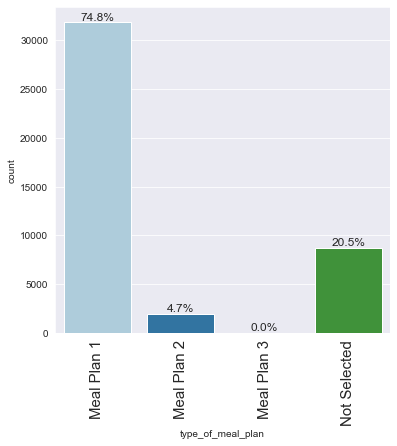

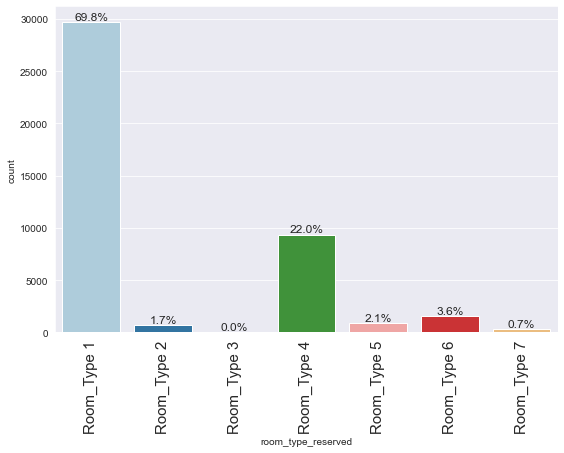

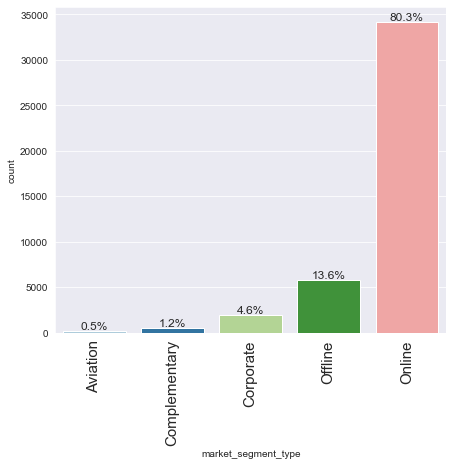

In [297]:
# plotting categorical columns graphs
for i in cat_cols:
    labeled_barplot(data, i, perc=True)

- **Type of Meal Plan**:
75% of bookings opt for Meal 1.
20% of bookings did not select any meal plan.

- **Room Type**:
Almost 70% of the bookings are for Type 1 room. Followed by Type 4 with 22%.

- **Market Segment**:
80% of bookings are Online segment type.

- **Booking Status**:
34% of bookings are cancelled.

### <span style="color:#008000"/> Bivariate Analysis

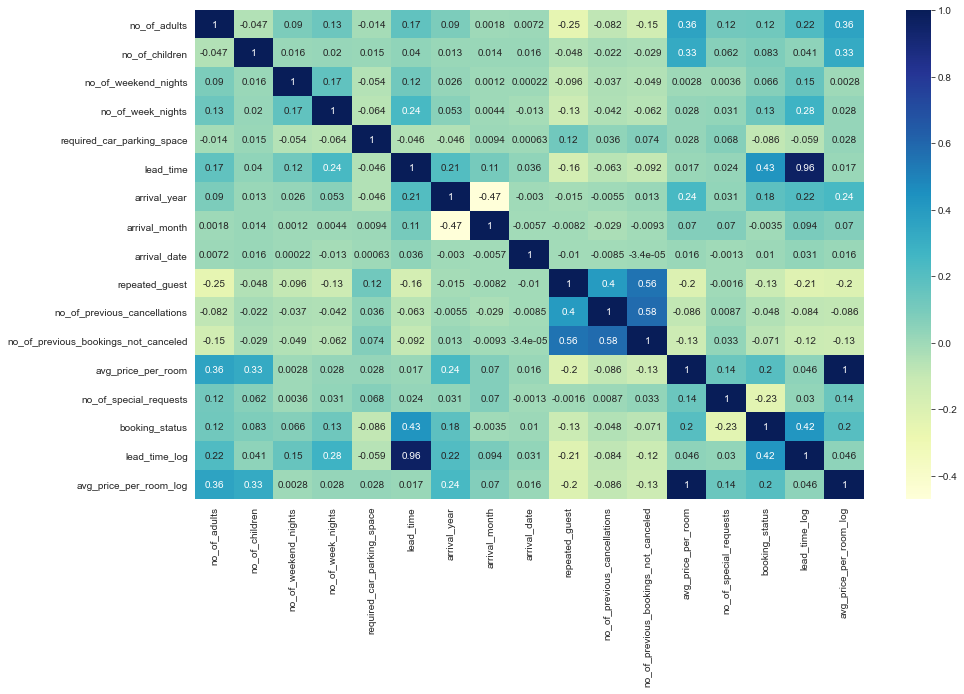

In [298]:
# Heatmap for assessing relation
plt.figure(figsize=(15,9))
sns.heatmap(data.corr(), annot=True, cmap="YlGnBu")
plt.show()

- Number of adults positively correlated to the Average Price Per Room
- Number of children positively correlated to the Average Price Per Room
- Number of weekend nights is related to weekday nights. It might indicate few weekend booking extends during the week day
- The number of week nights have positive relation with lead_time, indicating customers staying on the week nights plan and book ahead.
- Repeated guest and number of previous booking and number of previous cancellations are highly correlated. This makes sense because we only have information about repeated customers.
- Average Price Per Room is highly related to arrival year.
- Average Price Per Room is highly correlated to number of special requests.

In [299]:
#sns.pairplot(data=data, hue="booking_status")
#plt.show()

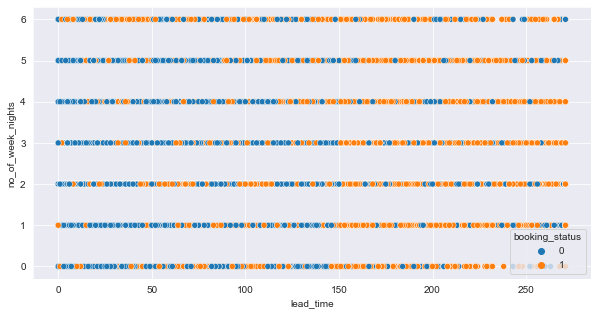

In [300]:
# let's look at significant scatter plots again
plt.figure(figsize=(10, 5))
sns.scatterplot(data["lead_time"], data["no_of_week_nights"], hue=data['booking_status'])
plt.show()

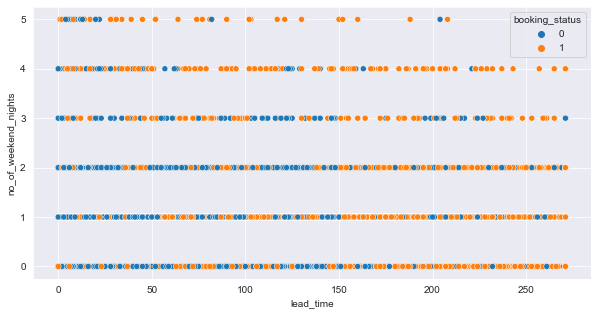

In [301]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data["lead_time"], data["no_of_weekend_nights"], hue=data['booking_status'])
plt.show()

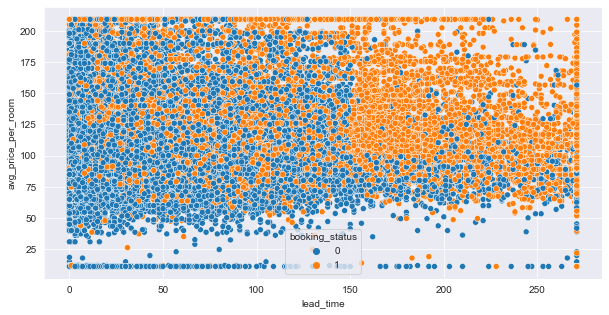

In [302]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data["lead_time"], data["avg_price_per_room"], hue=data['booking_status'])
plt.show()

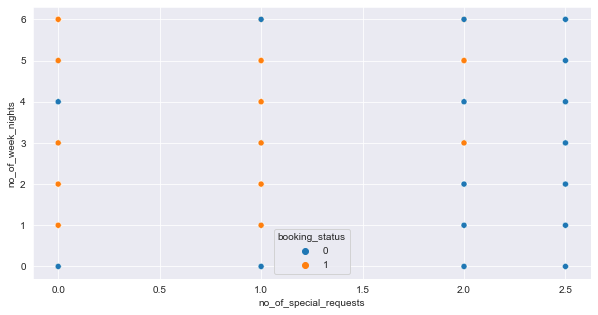

In [303]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data["no_of_special_requests"], data["no_of_week_nights"], hue=data['booking_status'])
plt.show()

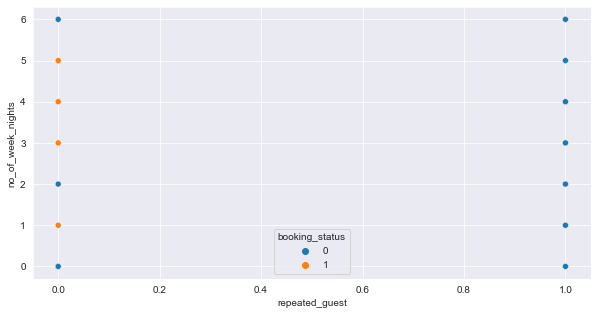

In [304]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data["repeated_guest"], data["no_of_week_nights"], hue=data['booking_status'])
plt.show()

booking_status         0      1    All
type_of_meal_plan                     
All                28089  14487  42576
Meal Plan 1        21352  10511  31863
Not Selected        5598   3118   8716
Meal Plan 2         1132    857   1989
Meal Plan 3            7      1      8
------------------------------------------------------------------------------------------------------------------------


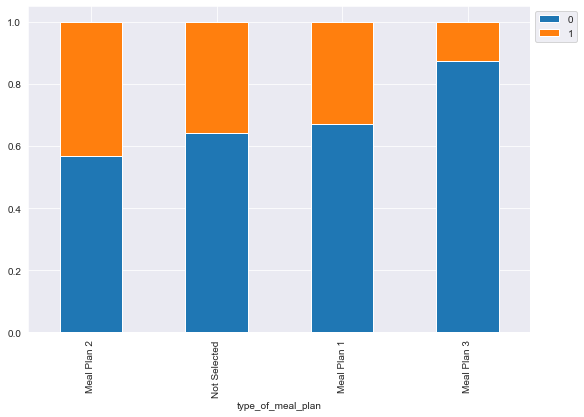

In [305]:
stacked_barplot(data, "type_of_meal_plan", "booking_status")

booking_status          0      1    All
room_type_reserved                     
All                 28089  14487  42576
Room_Type 1         20505   9225  29730
Room_Type 4          5686   3683   9369
Room_Type 6           714    826   1540
Room_Type 5           539    367    906
Room_Type 2           444    274    718
Room_Type 7           197    110    307
Room_Type 3             4      2      6
------------------------------------------------------------------------------------------------------------------------


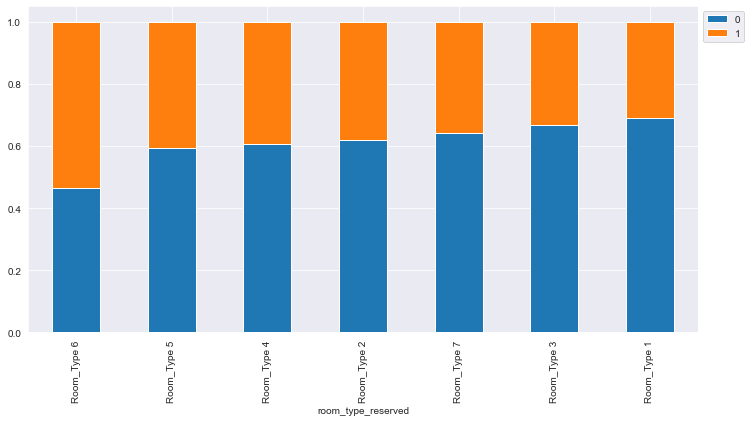

In [306]:
stacked_barplot(data, "room_type_reserved", "booking_status")

booking_status           0      1    All
market_segment_type                     
All                  28089  14487  42576
Online               20686  13483  34169
Offline               4973    804   5777
Corporate             1772    167   1939
Aviation               162     33    195
Complementary          496      0    496
------------------------------------------------------------------------------------------------------------------------


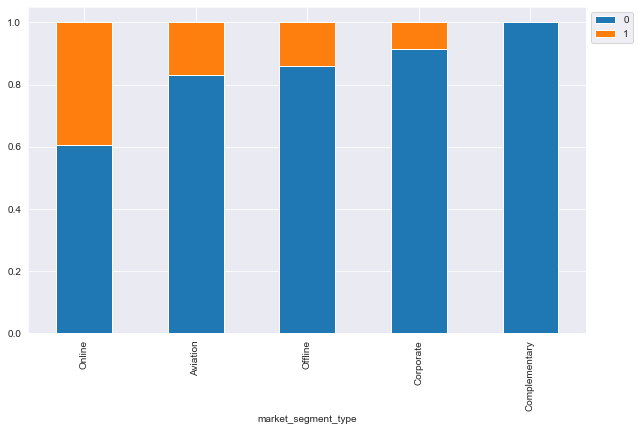

In [307]:
stacked_barplot(data, "market_segment_type", "booking_status")

#### <span style="color:#008000"/>Summary of Bivariate Analysis

- There are more cancellations with higher lead time.
- There is no definite pattern cancellations based on week day or weekend nights.
- The higher average price per room and higher lead time have more cancellations.
- Bookings with 3 or more special requests do not have cancellations.
- Bookings by repeated guests do not have cancellations.
- Customers selecting Meal Plan 3 have lowest number of cancellations.
- Room Type 6 has most number of cancellations.
- Online market segment has most cancellations.
- Complementary bookings have no cancellations.


### <span style="color:#008000"/> Checking Multicollinearity

- In order to make statistical inferences from a logistic regression model, it is important to ensure that there is no multicollinearity present in the data.

In [308]:
# Let's get the data we need for next steps - checking multicollinearity, building logistic regression model and decision tree model
X = data.drop(["booking_status","avg_price_per_room","lead_time"], axis=1)
y = data["booking_status"]


In [309]:
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

  type_of_meal_plan  required_car_parking_space room_type_reserved  \
0       Meal Plan 1                           0        Room_Type 1   
1      Not Selected                           0        Room_Type 1   
2       Meal Plan 1                           0        Room_Type 1   
3       Meal Plan 1                           0        Room_Type 1   
4      Not Selected                           0        Room_Type 1   

   arrival_year  arrival_month  arrival_date market_segment_type  \
0          2017             10             2             Offline   
1          2018             11             6              Online   
2          2018              2            28              Online   
3          2018              5            20              Online   
4          2019              7            13              Online   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  no_of_special_requests  \
0                                     0                     0.0   
1                                     0                     1.0   
2                                     0                     0.0   
3                                     0                     0.0   
4                                     0                     2.0   

   lead_time_log  avg_price_per_room_log  
0       1.696249               -1.222771  
1      -1.207832               -0.136329  
2      -1.489802               -1.353102  
3       1.595696               -0.310452  
4       2.037389               -0.594574

In [310]:
# encode categorical variables
X = pd.get_dummies(X, columns=X.select_dtypes(include=["object", "category"]).columns.tolist(),drop_first=True)
X.head()

no_of_adults  no_of_children  no_of_weekend_nights  no_of_week_nights  \
0             2               0                     1                  2   
1             2               0                     2                  3   
2             1               0                     2                  1   
3             2               0                     0                  2   
4             3               0                     0                  3   

   required_car_parking_space  arrival_year  arrival_month  arrival_date  \
0                           0          2017             10             2   
1                           0          2018             11             6   
2                           0          2018              2            28   
3                           0          2018              5            20   
4                           0          2019              7            13   

   repeated_guest  no_of_previous_cancellations  \
0               0                             0   
1               0                             0   
2               0                             0   
3               0                             0   
4               0                             0   

   no_of_previous_bookings_not_canceled  no_of_special_requests  \
0                                     0                     0.0   
1                                     0                     1.0   
2                                     0                     0.0   
3                                     0                     0.0   
4                                     0                     2.0   

   lead_time_log  avg_price_per_room_log  type_of_meal_plan_Meal Plan 2  \
0       1.696249               -1.222771                              0   
1      -1.207832               -0.136329                              0   
2      -1.489802               -1.353102                              0   
3       1.595696               -0.310452                              0   
4       2.037389               -0.594574                              0   

   type_of_meal_plan_Meal Plan 3  type_of_meal_plan_Not Selected  \
0                              0                               0   
1                              0                               1   
2                              0                               0   
3                              0                               0   
4                              0                               1   

   room_type_reserved_Room_Type 2  room_type_reserved_Room_Type 3  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 4  room_type_reserved_Room_Type 5  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   room_type_reserved_Room_Type 6  room_type_reserved_Room_Type 7  \
0                               0                               0   
1                               0                               0   
2                               0                               0   
3                               0                               0   
4                               0                               0   

   market_segment_type_Complementary  market_segment_type_Corporate  \
0                                  0                              0   
1                                  0                              0   
2                                  0                         

In [311]:
y.head()

0    0
1    0
2    1
3    1
4    1
Name: booking_status, dtype: int64

In [312]:
# create copies of data
X_org = X
y_org = y

In [313]:
def check_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns
    vif["VIF"] = [variance_inflation_factor(predictors.values, i) for i in range(len(predictors.columns))]
    return vif

In [314]:
check_vif(X)

feature         VIF
0                           no_of_adults   20.675642
1                         no_of_children    2.291819
2                   no_of_weekend_nights    2.148695
3                      no_of_week_nights    4.282018
4             required_car_parking_space    1.071096
5                           arrival_year  246.650797
6                          arrival_month    5.568454
7                           arrival_date    4.179412
8                         repeated_guest    2.084570
9           no_of_previous_cancellations    1.562757
10  no_of_previous_bookings_not_canceled    1.921695
11                no_of_special_requests    2.134085
12                         lead_time_log    1.235302
13                avg_price_per_room_log    2.184734
14         type_of_meal_plan_Meal Plan 2    1.135646
15         type_of_meal_plan_Meal Plan 3    1.021688
16        type_of_meal_plan_Not Selected    1.592827
17        room_type_reserved_Room_Type 2    1.114183
18        room_type_reserved_Room_Type 3    1.001042
19        room_type_reserved_Room_Type 4    1.833734
20        room_type_reserved_Room_Type 5    1.142382
21        room_type_reserved_Room_Type 6    2.142843
22        room_type_reserved_Room_Type 7    1.145186
23     market_segment_type_Complementary    3.828698
24         market_segment_type_Corporate   11.218670
25           market_segment_type_Offline   32.254871
26            market_segment_type_Online  186.229603

In [315]:
# arrival_year has very high VIF. Dropping arrival year and cheking VIF
X = X.drop(['arrival_year'],axis=1)
check_vif(X)

feature        VIF
0                           no_of_adults  20.203793
1                         no_of_children   2.288268
2                   no_of_weekend_nights   2.139500
3                      no_of_week_nights   4.229912
4             required_car_parking_space   1.071073
5                          arrival_month   5.439957
6                           arrival_date   4.115395
7                         repeated_guest   2.039222
8           no_of_previous_cancellations   1.562399
9   no_of_previous_bookings_not_canceled   1.919020
10                no_of_special_requests   2.133492
11                         lead_time_log   1.205480
12                avg_price_per_room_log   2.167732
13         type_of_meal_plan_Meal Plan 2   1.135239
14         type_of_meal_plan_Meal Plan 3   1.021688
15        type_of_meal_plan_Not Selected   1.592185
16        room_type_reserved_Room_Type 2   1.113957
17        room_type_reserved_Room_Type 3   1.001039
18        room_type_reserved_Room_Type 4   1.828363
19        room_type_reserved_Room_Type 5   1.141886
20        room_type_reserved_Room_Type 6   2.142791
21        room_type_reserved_Room_Type 7   1.145176
22     market_segment_type_Complementary   1.698716
23         market_segment_type_Corporate   2.474210
24           market_segment_type_Offline   5.256584
25            market_segment_type_Online  24.868517

In [316]:
# market_segment_type_Online has high VIF. Dropping market_segment_type_Online and cheking VIF
X = X.drop(['market_segment_type_Online'],axis=1)
check_vif(X)

feature       VIF
0                           no_of_adults  9.606932
1                         no_of_children  2.231622
2                   no_of_weekend_nights  2.114866
3                      no_of_week_nights  3.976019
4             required_car_parking_space  1.070729
5                          arrival_month  4.725315
6                           arrival_date  3.752693
7                         repeated_guest  2.039155
8           no_of_previous_cancellations  1.561794
9   no_of_previous_bookings_not_canceled  1.918958
10                no_of_special_requests  2.102547
11                         lead_time_log  1.157896
12                avg_price_per_room_log  2.079944
13         type_of_meal_plan_Meal Plan 2  1.130571
14         type_of_meal_plan_Meal Plan 3  1.021688
15        type_of_meal_plan_Not Selected  1.546166
16        room_type_reserved_Room_Type 2  1.106933
17        room_type_reserved_Room_Type 3  1.001038
18        room_type_reserved_Room_Type 4  1.827244
19        room_type_reserved_Room_Type 5  1.141804
20        room_type_reserved_Room_Type 6  2.142611
21        room_type_reserved_Room_Type 7  1.143337
22     market_segment_type_Complementary  1.375421
23         market_segment_type_Corporate  1.702826
24           market_segment_type_Offline  1.486504

In [ ]:
# no_of_adults has high VIF. Dropping no_of_adults and cheking VIF
X = X.drop(['no_of_adults'],axis=1)
check_vif(X)

- All the variables have VIF below 5.
- All the variables with high collinearity are removed.

### <span style="color:#008000"/> Building a Logistic Regression model (using Stats Model)

In [317]:
# adding constant
X = sm.add_constant(X)

# splitting data in train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=1)

In [318]:
print("Shape of Training set : ", X_train.shape)
print("Shape of test set : ", X_test.shape)
print("Percentage of classes in training set:")
print(y_train.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test.value_counts(normalize=True))

Shape of Training set :  (29803, 26)
Shape of test set :  (12773, 26)
Percentage of classes in training set:
0    0.661074
1    0.338926
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.656619
1    0.343381
Name: booking_status, dtype: float64


### <span style="color:#008000"/>Model evaluation criterion

#### <span style="color:#008000"/>Model can make wrong predictions as:
1. Predicting booking will cancel but in reality the booking is not cancelled.
2. Predicting will not cancel but in reality the booking is cancelled.

#### <span style="color:#008000"/>Which case is more important? 
* The second case is more important:

* As the costs of a cancellations are high for the hotel, not identifying cancelled bookings would result in loss.


#### <span style="color:#008000"/>How to reduce this loss i.e need to reduce False Negatives?
*  `f1_score` should be maximized, the greater the f1_score higher the chances of identifying both the classes correctly.

In [319]:
# defining a function to plot the confusion_matrix of a classification model
def confusion_matrix_statsmodels(model, predictors, target, threshold=0.5):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """
    y_pred = model.predict(predictors) > threshold
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="", cmap="YlGnBu")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

In [320]:
# defining a function to compute different metrics to check performance of a classification model built using statsmodels
def model_performance_classification_statsmodels(model, predictors, target, threshold=0.5):
    """
    Function to compute different metrics to check classification model performance

    model: classifier
    predictors: independent variables
    target: dependent variable
    threshold: threshold for classifying the observation as class 1
    """

    # checking which probabilities are greater than threshold
    pred_temp = model.predict(predictors) > threshold
    # rounding off the above values to get classes
    pred = np.round(pred_temp)

    acc = accuracy_score(target, pred)  # to compute Accuracy
    recall = recall_score(target, pred)  # to compute Recall
    precision = precision_score(target, pred)  # to compute Precision
    f1 = f1_score(target, pred)  # to compute F1-score

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {"Accuracy": acc, "Recall": recall, "Precision": precision, "F1": f1,},
        index=[0],
    )

    return df_perf

In [321]:
# fitting logistic regression model
logit = sm.Logit(y_train, X_train.astype(float))
lg = logit.fit(disp=False)

print(lg.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29777
Method:                           MLE   Df Model:                           25
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3222
Time:                        15:24:00   Log-Likelihood:                -12935.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.6016      0.090      6.680      0.000       0.425       0.778
no_of_adults                            -0.1096      

In [322]:
print("Training performance:")
model_performance_classification_statsmodels(lg, X_train, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0   0.78888  0.623602   0.716691  0.666914

<span style="color:#008000"/>**Observations**
- There few varibles that negatively affect booking status
- We've removed the multicollinearity but we need to address features with high p-values
- The F1 score can be improved, let's drop variables with high p-values

In [323]:
X_train1 = X_train.drop(['type_of_meal_plan_Not Selected'],axis=1)

In [324]:
# fitting logistic regression model again
logit1 = sm.Logit(y_train, X_train1.astype(float))
lg1 = logit1.fit(disp=False)

print(lg1.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29778
Method:                           MLE   Df Model:                           24
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3202
Time:                        15:24:14   Log-Likelihood:                -12972.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.7244      0.089      8.160      0.000       0.550       0.898
no_of_adults                            -0.0971      

In [325]:
print("Training performance:")
model_performance_classification_statsmodels(lg1, X_train1, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0   0.78878  0.623305   0.716595  0.666702

In [326]:
# The F1 score has changed but the improvement is not significant
# Let's drop one variable that have high p-values in each category, dropping all at once might not be a good choice
# Removing type_of_meal_plan_Meal Plan 3
X_train2 = X_train1.drop(['type_of_meal_plan_Meal Plan 3'],axis=1)

In [327]:
# fitting logistic regression model again
logit2 = sm.Logit(y_train, X_train2.astype(float))
lg2 = logit2.fit(disp=False)

print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29779
Method:                           MLE   Df Model:                           23
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3202
Time:                        15:24:25   Log-Likelihood:                -12972.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.7244      0.089      8.160      0.000       0.550       0.898
no_of_adults                            -0.0971      

In [328]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0   0.78878  0.623305   0.716595  0.666702

In [329]:
# Next high p-value is from market segment category, dropping market_segment_type_Complementary
X_train3 = X_train2.drop(['market_segment_type_Complementary'],axis=1)

In [330]:
# fitting logistic regression model again
logit3 = sm.Logit(y_train, X_train3.astype(float))
lg3 = logit3.fit(disp=False)

print(lg3.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29780
Method:                           MLE   Df Model:                           22
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3196
Time:                        15:24:58   Log-Likelihood:                -12985.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.7273      0.089      8.193      0.000       0.553       0.901
no_of_adults                            -0.0975      

In [331]:
print("Training performance:")
model_performance_classification_statsmodels(lg3, X_train3, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0   0.78878  0.622909   0.716792  0.666561

In [332]:
# No significant change, let's drop next high p-value variable
# Dropping room_type_reserved_Room_Type 3
X_train4 = X_train3.drop(['room_type_reserved_Room_Type 3'],axis=1)

In [333]:
# fitting logistic regression model again
logit4 = sm.Logit(y_train, X_train4.astype(float))
lg4 = logit4.fit(disp=False)

print(lg4.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29781
Method:                           MLE   Df Model:                           21
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3196
Time:                        15:25:05   Log-Likelihood:                -12985.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.7272      0.089      8.193      0.000       0.553       0.901
no_of_adults                            -0.0975      

In [334]:
print("Training performance:")
model_performance_classification_statsmodels(lg4, X_train4, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0   0.78878  0.622909   0.716792  0.666561

In [335]:
# No significant change, let's drop next high p-value variable
# no_of_previous_bookings_not_canceled
X_train5 = X_train4.drop(['no_of_previous_bookings_not_canceled'],axis=1)

In [336]:
# fitting logistic regression model again
logit5 = sm.Logit(y_train, X_train5.astype(float))
lg5 = logit5.fit(disp=False)

print(lg5.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29782
Method:                           MLE   Df Model:                           20
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3196
Time:                        15:25:08   Log-Likelihood:                -12985.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.7275      0.089      8.195      0.000       0.554       0.901
no_of_adults                      -0.0976      0.035     -2.782      0.

In [337]:
print("Training performance:")
model_performance_classification_statsmodels(lg5, X_train5, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.788746  0.622909    0.71671  0.666525

In [338]:
# No significant change, let's drop next high p-value variable
# drop no_of_weekend_nights
X_train6 = X_train5.drop(['no_of_weekend_nights'],axis=1)

In [339]:
# fitting logistic regression model again
logit6 = sm.Logit(y_train, X_train6.astype(float))
lg6 = logit6.fit(disp=False)

print(lg6.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29783
Method:                           MLE   Df Model:                           19
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3195
Time:                        15:25:10   Log-Likelihood:                -12985.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.7352      0.088      8.345      0.000       0.563       0.908
no_of_adults                      -0.0970      0.035     -2.765      0.

In [340]:
print("Training performance:")
model_performance_classification_statsmodels(lg6, X_train6, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.788679  0.623305    0.71635  0.666596

In [341]:
# No significant change, let's drop next high p-value variable
# drop arrival_date
X_train7 = X_train6.drop(['arrival_date'],axis=1)

In [342]:
# fitting logistic regression model again
logit7 = sm.Logit(y_train, X_train7.astype(float))
lg7 = logit7.fit(disp=False)

print(lg7.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29784
Method:                           MLE   Df Model:                           18
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3195
Time:                        15:25:14   Log-Likelihood:                -12986.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.7043      0.083      8.451      0.000       0.541       0.868
no_of_adults                      -0.0967      0.035     -2.757      0.

In [343]:
print("Training performance:")
model_performance_classification_statsmodels(lg7, X_train7, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.788746  0.622909    0.71671  0.666525

In [344]:
# No significant change, let's drop next high p-value variable
# drop room_type_reserved_Room_Type 2
X_train8 = X_train7.drop(['room_type_reserved_Room_Type 2'],axis=1)

In [345]:
# fitting logistic regression model again
logit8 = sm.Logit(y_train, X_train8.astype(float))
lg8 = logit8.fit(disp=False)

print(lg8.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29785
Method:                           MLE   Df Model:                           17
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3194
Time:                        15:25:18   Log-Likelihood:                -12987.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.6914      0.083      8.331      0.000       0.529       0.854
no_of_adults                      -0.0920      0.035     -2.631      0.

In [346]:
print("Training performance:")
model_performance_classification_statsmodels(lg8, X_train8, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.788578  0.622216   0.716648  0.666101

In [347]:
# No significant change, let's drop next high p-value variable
# drop no_of_children
X_train9 = X_train8.drop(['no_of_children'],axis=1)

In [348]:
# fitting logistic regression model again
logit9 = sm.Logit(y_train, X_train9.astype(float))
lg9 = logit9.fit(disp=False)

print(lg9.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29786
Method:                           MLE   Df Model:                           16
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3194
Time:                        15:25:24   Log-Likelihood:                -12988.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.7003      0.081      8.618      0.000       0.541       0.860
no_of_adults                      -0.0955      0.034     -2.786      0.

In [349]:
print("Training performance:")
model_performance_classification_statsmodels(lg9, X_train9, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0  0.788645  0.622513   0.716663  0.666278

In [350]:
# No significant change, let's drop next high p-value variable
# drop type_of_meal_plan_Meal Plan 2
X_train10 = X_train9.drop(['type_of_meal_plan_Meal Plan 2'],axis=1)

In [351]:
# fitting logistic regression model again
logit10 = sm.Logit(y_train, X_train10.astype(float))
lg10 = logit10.fit(disp=False)

print(lg10.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29787
Method:                           MLE   Df Model:                           15
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3194
Time:                        15:25:30   Log-Likelihood:                -12989.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.6908      0.081      8.521      0.000       0.532       0.850
no_of_adults                      -0.0929      0.034     -2.712      0.

In [352]:
print("Training performance:")
model_performance_classification_statsmodels(lg10, X_train10, y_train)

Training performance:


Accuracy    Recall  Precision       F1
0  0.788545  0.621919   0.716714  0.66596

- No significant change after dropping the variables with high p-values.
- We'll use model number 2 as it has highest F1 score and most number of variables.

In [353]:
# Summary of the selected model
print(lg2.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29779
Method:                           MLE   Df Model:                           23
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3202
Time:                        15:25:52   Log-Likelihood:                -12972.
converged:                      False   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                           coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------------
const                                    0.7244      0.089      8.160      0.000       0.550       0.898
no_of_adults                            -0.0971      

In [354]:
print("Training performance:")
model_performance_classification_statsmodels(lg2, X_train2, y_train)

Training performance:


Accuracy    Recall  Precision        F1
0   0.78878  0.623305   0.716595  0.666702

In [355]:
# running a loop to drop variables with high p-value

# initial list of columns
cols = X_train1.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    X_train_aux = X_train1[cols]

    # fitting the model
    model = sm.Logit(y_train, X_train_aux).fit(disp=False)

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'no_of_adults', 'no_of_week_nights', 'required_car_parking_space', 'arrival_month', 'repeated_guest', 'no_of_previous_cancellations', 'no_of_special_requests', 'lead_time_log', 'avg_price_per_room_log', 'room_type_reserved_Room_Type 4', 'room_type_reserved_Room_Type 5', 'room_type_reserved_Room_Type 6', 'market_segment_type_Corporate', 'market_segment_type_Offline']


In [356]:
X_train_final = X_train[selected_features]

In [357]:
logit_final = sm.Logit(y_train, X_train_final.astype(float))
lg_final = logit_final.fit(disp=False)

print(lg_final.summary())

                           Logit Regression Results                           
Dep. Variable:         booking_status   No. Observations:                29803
Model:                          Logit   Df Residuals:                    29788
Method:                           MLE   Df Model:                           14
Date:                Tue, 21 Sep 2021   Pseudo R-squ.:                  0.3193
Time:                        15:26:01   Log-Likelihood:                -12990.
converged:                       True   LL-Null:                       -19083.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                     coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.6918      0.081      8.535      0.000       0.533       0.851
no_of_adults                      -0.0962      0.034     -2.814      0.

In [358]:
print("Training performance:")
model_performance_classification_statsmodels(lg_final, X_train_final, y_train)

Training performance:


Accuracy    Recall  Precision       F1
0  0.788444  0.622216   0.716321  0.66596

- No variables have p-value higher than 0.05
- We'll select above model as the final.

### <span style="color:#008000"/> Coefficient interpretations 
- Number of week night, number of previous cancellations, lead time, and average price per room have positive impact, will increase chances of cancellations.
- Required car parking space, arrival month, repeated guest, number of special requests, room type 4, room type 5, room type 6, market segment corporate and market segment offline have negative impact, will reduce chances of cancellations.

### <span style="color:#008000"/> Converting coefficients to odds

In [359]:
# converting coefficients to odds
odds = np.exp(lg_final.params)

# finding the percentage change
perc_change_odds = (np.exp(lg_final.params) - 1) * 100

# removing limit from number of columns to display
pd.set_option("display.max_columns", None)

# adding the odds to a dataframe
pd.DataFrame({"Odds": odds, "Odds_Perc_Change": perc_change_odds}, index=X_train_final.columns)

Odds  Odds_Perc_Change
const                           1.997220         99.722023
no_of_adults                    0.908282         -9.171849
no_of_week_nights               1.028753          2.875338
required_car_parking_space      0.220740        -77.926015
arrival_month                   0.968430         -3.157038
repeated_guest                  0.050833        -94.916707
no_of_previous_cancellations    1.281838         28.183759
no_of_special_requests          0.276337        -72.366251
lead_time_log                   3.667514        266.751424
avg_price_per_room_log          1.877049         87.704857
room_type_reserved_Room_Type 4  0.759063        -24.093724
room_type_reserved_Room_Type 5  0.680296        -31.970439
room_type_reserved_Room_Type 6  0.779906        -22.009379
market_segment_type_Corporate   0.578514        -42.148574
market_segment_type_Offline     0.111159        -88.884135

- Considering other variables are unchanged one unit increase in `no_of_week_nights` the chances of cancellations increase by 1.02 times or increase 2.78% chances of cancellations
- If there is `required_car_parking_space` there is 0.21 times less chance of cancellations or 78% decreased percent of cancellation
- If the customer is `repeated_guest` cancellations is 0.05 likely or 94% less chance of cancelling
- If there is `no_of_previous_cancellations` present, the odds of cancellations are 1.27 times likely or 27% chance of cancellation
- The `no_of_special_requests` increase the odds of cancellations 0.27 times or 72% less chance of cancellations
- The higher `lead_time_log` it's 3.64 times likely for cancellation or 264% increased chance of cancellation
- The higher `avg_price_per_room_log` it's 1.84 times likely for cancellation or 84% increased chance of cancellation
- If the `room_type_reserved_Room_Type 4`, the odds of cancellations are 0.74 times or 25% less chance of cancellation
- If the `room_type_reserved_Room_Type 5`, the odds of cancellations are 0.66 times likely or 33% less chance of cancellation
- If the `room_type_reserved_Room_Type 6`, the odds of cancellations are 0.79 times likely or 20% less chance of cancellation
- The `market_segment_type_Corporate` increases by 1 unit, the cancellation is 0.60 likely or 39% less likely of cancellation
- The `market_segment_type_Offline` increases by 1 unit, the cancellation is 0.11 likely or 88% less likely of cancellation

#### <span style="color:#008000"/>Checking model performance on the training set

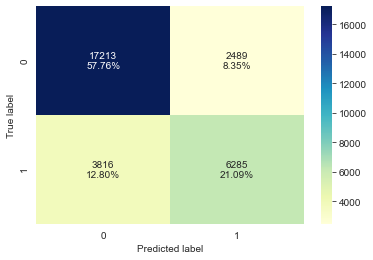

In [360]:
# creating confusion matrix
confusion_matrix_statsmodels(lg_final, X_train_final, y_train)

In [361]:
log_reg_model_train_perf = model_performance_classification_statsmodels(lg_final, X_train_final, y_train)

print("Training performance:")
log_reg_model_train_perf

Training performance:


Accuracy    Recall  Precision       F1
0  0.788444  0.622216   0.716321  0.66596

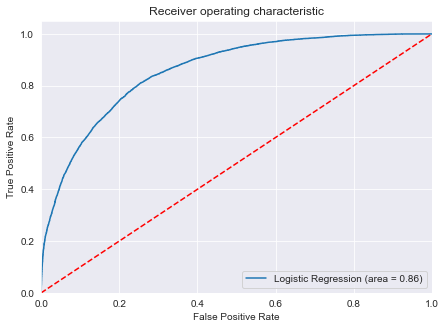

In [362]:
# ROC-AUC on the training set
logit_roc_auc_train = roc_auc_score(y_train, lg_final.predict(X_train_final))
fpr, tpr, thresholds = roc_curve(y_train, lg_final.predict(X_train_final))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- The logistic regression is giving good performance.

## <span style="color:#008000"/>Model performance evaluation & improvement

* Let's see if the f1 score can be improved further, by changing the model threshold using AUC-ROC Curve.

In [363]:
# Optimal threshold as per AUC-ROC curve
# The optimal cut off would be where tpr is high and fpr is low
fpr, tpr, thresholds = roc_curve(y_train, lg_final.predict(X_train_final))

optimal_idx = np.argmax(tpr - fpr)
optimal_threshold_auc_roc = thresholds[optimal_idx]
print(optimal_threshold_auc_roc)

0.3059532471199288


#### <span style="color:#008000"/>Checking model performance on training set

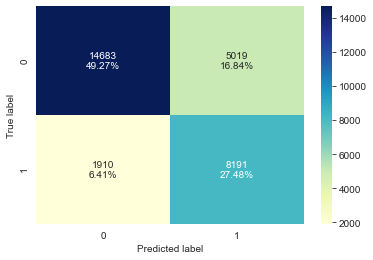

In [364]:
# creating confusion matrix
confusion_matrix_statsmodels(lg_final, X_train_final, y_train, threshold=optimal_threshold_auc_roc)

In [365]:
# checking model performance for this model
log_reg_model_train_perf_threshold_auc_roc = model_performance_classification_statsmodels(
    lg_final, X_train_final, y_train, threshold=optimal_threshold_auc_roc)
print("Training performance:")
log_reg_model_train_perf_threshold_auc_roc

Training performance:


Accuracy   Recall  Precision        F1
0  0.767507  0.81091   0.620061  0.702758

- The Accuracy and Precision have droppped
- The Recall and F1 have improved though
- They model is giving good pperformance

#### <span style="color:#008000"/> Let's use Precision-Recall curve and see if we can find a better threshold

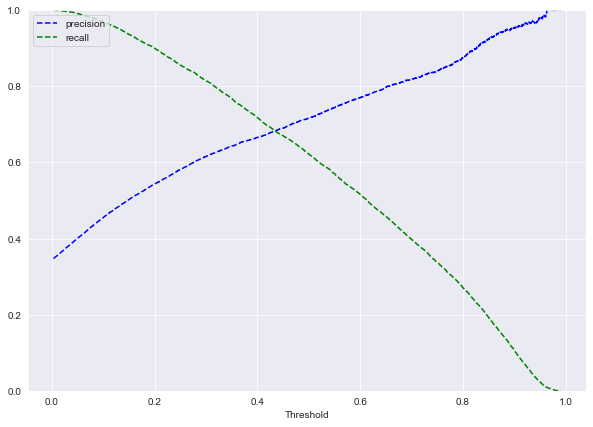

In [366]:
y_scores = lg_final.predict(X_train_final)
prec, rec, tre = precision_recall_curve(y_train, y_scores,)


def plot_prec_recall_vs_tresh(precisions, recalls, thresholds):
    plt.plot(thresholds, precisions[:-1], "b--", label="precision")
    plt.plot(thresholds, recalls[:-1], "g--", label="recall")
    plt.xlabel("Threshold")
    plt.legend(loc="upper left")
    plt.ylim([0, 1])


plt.figure(figsize=(10, 7))
plot_prec_recall_vs_tresh(prec, rec, tre)
plt.show()

* At the threshold of 0.44, we get balanced recall and precision.

In [367]:
# setting the threshold
optimal_threshold_curve = 0.44

#### <span style="color:#008000"/>Checking model performance on training set

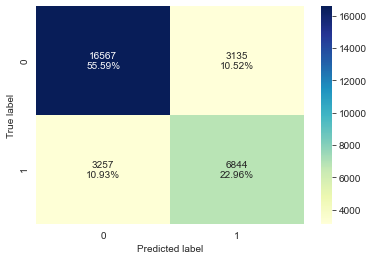

In [368]:
# creating confusion matrix
confusion_matrix_statsmodels(lg_final, X_train_final, y_train, threshold=optimal_threshold_curve)

In [369]:
log_reg_model_train_perf_threshold_curve = model_performance_classification_statsmodels(
    lg_final, X_train_final, y_train, threshold=optimal_threshold_curve
)
print("Training performance:")
log_reg_model_train_perf_threshold_curve

Training performance:


Accuracy    Recall  Precision        F1
0  0.785525  0.677557    0.68584  0.681673

- The model didn't improve much
- The F1 score has dropped

### <span style="color:#008000"/>Model Performance Summary

In [370]:
# training performance comparison

models_train_comp_df = pd.concat(
    [
        log_reg_model_train_perf.T,
        log_reg_model_train_perf_threshold_auc_roc.T,
        log_reg_model_train_perf_threshold_curve.T,
    ],
    axis=1,
)
models_train_comp_df.columns = [
    "Logistic Regression",
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.44 Threshold",
]

print("Training performance comparison:")
models_train_comp_df

Training performance comparison:


Logistic Regression  Logistic Regression-0.31 Threshold  \
Accuracy              0.788444                            0.767507   
Recall                0.622216                            0.810910   
Precision             0.716321                            0.620061   
F1                    0.665960                            0.702758   

           Logistic Regression-0.44 Threshold  
Accuracy                             0.785525  
Recall                               0.677557  
Precision                            0.685840  
F1                                   0.681673

### <span style="color:#008000"/>Let's check the performance on the test set

In [371]:
X_test_final = X_test[list(X_train_final.columns)]

**Using 0.31 Threshold**

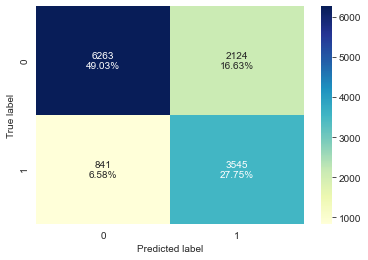

In [372]:
# creating confusion matrix
confusion_matrix_statsmodels(lg_final, X_test_final, y_test,threshold=optimal_threshold_auc_roc)

In [373]:
log_reg_model_test_perf = model_performance_classification_statsmodels(
    lg_final, X_test_final, y_test, threshold=optimal_threshold_auc_roc)

print("Test performance:")
log_reg_model_test_perf

Test performance:


Accuracy    Recall  Precision        F1
0   0.76787  0.808254   0.625331  0.705122

- ROC curve on test set

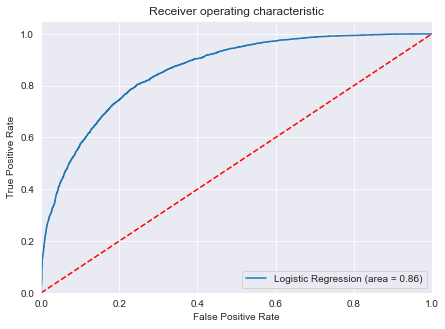

In [374]:
logit_roc_auc_train = roc_auc_score(y_test, lg_final.predict(X_test_final))
fpr, tpr, thresholds = roc_curve(y_test, lg_final.predict(X_test_final))
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, label="Logistic Regression (area = %0.2f)" % logit_roc_auc_train)
plt.plot([0, 1], [0, 1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver operating characteristic")
plt.legend(loc="lower right")
plt.show()

- Using Model with threshold 0.44

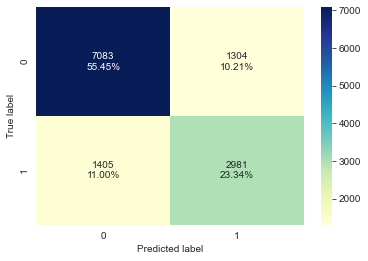

In [375]:
# creating confusion matrix
confusion_matrix_statsmodels(lg_final, X_test_final, y_test, threshold=optimal_threshold_curve)

In [376]:
log_reg_model_test_perf_threshold_curve = model_performance_classification_statsmodels(
    lg_final, X_test_final, y_test, threshold=optimal_threshold_curve
)
print("Test performance:")
log_reg_model_test_perf_threshold_curve

Test performance:


Accuracy    Recall  Precision        F1
0  0.787912  0.679663   0.695683  0.687579

In [377]:
# testing performance comparison

models_test_comp_df = pd.concat(
    [
        log_reg_model_test_perf.T,
        log_reg_model_test_perf_threshold_curve.T,
    ],
    axis=1,
)
models_test_comp_df.columns = [
    "Logistic Regression-0.31 Threshold",
    "Logistic Regression-0.44 Threshold",
]

print("Test set performance comparison:")
models_test_comp_df

Test set performance comparison:


Logistic Regression-0.31 Threshold  \
Accuracy                             0.767870   
Recall                               0.808254   
Precision                            0.625331   
F1                                   0.705122   

           Logistic Regression-0.44 Threshold  
Accuracy                             0.787912  
Recall                               0.679663  
Precision                            0.695683  
F1                                   0.687579

## <span style="color:#008000"/> Final Model Summary and Conclusion
* We have been able to build a predictive model that can be used by the star hotels to find the bookings that can may result into cancellation with an f1_score of 0.70 on the training set and the testing set.

* All the logistic regression models have given a generalized performance on the training and test set.

* Coefficient of number of week nights, having previous cancellation, large lead time and higher average price per room are positive and an increase in these will lead to increase in chances of a cancellation. 

* Coefficient of required car parking, arrival month, repeated guest, number of special request, room type 4, 5 and 6 and market segment corporate and offline are negative increase in these will lead to decrease in chances of a cancellation.

###  <span style="color:#008000"/>Building a Decision Tree model

In [378]:
# Let's get the original data for building decision tree
X_d = X_org
y_d = y_org

In [379]:
# Splitting data into training and test set:
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(X_d, y_d, test_size=0.3, random_state=1)
print(X_train_d.shape, X_test_d.shape)

(29803, 27) (12773, 27)


In [380]:
print("Number of rows in train data =", X_train_d.shape[0])
print("Number of rows in test data =", X_test_d.shape[0])

Number of rows in train data = 29803
Number of rows in test data = 12773


In [381]:
print("Percentage of classes in training set:")
print(y_train_d.value_counts(normalize=True))
print("Percentage of classes in test set:")
print(y_test_d.value_counts(normalize=True))

Percentage of classes in training set:
0    0.661074
1    0.338926
Name: booking_status, dtype: float64
Percentage of classes in test set:
0    0.656619
1    0.343381
Name: booking_status, dtype: float64


### <span style="color:#008000"/> Model evaluation criterion

### <span style="color:#008000"/>Model can make wrong predictions as:

1. Predicting booking will cancel but in reality the booking is not cancelled.
2. Predicting will not cancel but in reality the booking is cancelled.

### <span style="color:#008000"/> Which case is more important? 

* If we predict a customer who was not going cancel but did, as the costs of a cancellations are high.

### <span style="color:#008000"/> How to reduce this loss i.e need to reduce False Negatives?
*  `recall` should be maximized, the greater the recall higher the chances of minimizing the false negatives.

In [382]:
##  Function to calculate recall score
def get_recall_score(model, predictors, target):
    """
    model: classifier
    predictors: independent variables
    target: dependent variable
    
    """
    prediction = model.predict(predictors)
    return recall_score(target, prediction)

In [383]:
def confusion_matrix_sklearn(model, predictors, target):
    """
    To plot the confusion_matrix with percentages

    model: classifier
    predictors: independent variables
    target: dependent variable
    """
    y_pred = model.predict(predictors)
    cm = confusion_matrix(target, y_pred)
    labels = np.asarray(
        [
            ["{0:0.0f}".format(item) + "\n{0:.2%}".format(item / cm.flatten().sum())]
            for item in cm.flatten()
        ]
    ).reshape(2, 2)

    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=labels, fmt="",cmap="YlGnBu")
    plt.ylabel("True label")
    plt.xlabel("Predicted label")

* We will build our model using the DecisionTreeClassifier function. Using default 'gini' criteria to split. 
* If the frequency of class A is 35% and the frequency of class B is 65%, then class B will become the dominant class and the decision tree will become biased toward the dominant classes.

* In this case, we can pass a dictionary {0:0.35,1:0.65} to the model to specify the weight of each class and the decision tree will give more weightage to class 1.

* class_weight is a hyperparameter for the decision tree classifier.

In [384]:
model = DecisionTreeClassifier(criterion="gini", class_weight={0: 0.35, 1: 0.65}, random_state=1)

In [385]:
model.fit(X_train_d, y_train_d)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, random_state=1)

####  <span style="color:#008000"/>Checking model performance on training set

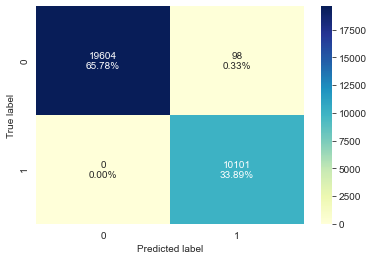

In [386]:
confusion_matrix_sklearn(model, X_train_d, y_train_d)

In [387]:
decision_tree_perf_train = get_recall_score(model, X_train_d, y_train_d)

print("Recall Score:", decision_tree_perf_train)

Recall Score: 1.0


* Model is able to perfectly classify all the data points on the training set.
* 0 errors on the training set, each sample has been classified correctly.
* As we know a decision tree will continue to grow and classify each data point correctly if no restrictions are applied as the trees will learn all the patterns in the training set.
* This generally leads to overfitting of the model as Decision Tree will perform well on the training set but will fail to replicate the performance on the test set.

####  <span style="color:#008000"/>Checking model performance on test set

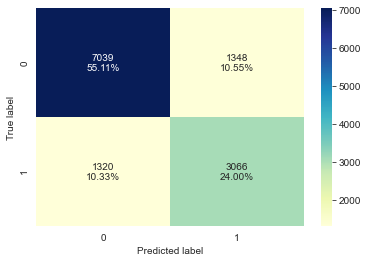

In [388]:
confusion_matrix_sklearn(model, X_test_d, y_test_d)

In [389]:
decision_tree_perf_test = get_recall_score(model, X_test_d, y_test_d)
print("Recall Score:", decision_tree_perf_test)

Recall Score: 0.6990424076607387


* There is a large disparity in performance of model on training set and test set, which suggests that the model is overfiiting.

### <span style="color:#008000"/> Visualizing the Decision Tree

In [390]:
# creating a list of column names
feature_names = X_train_d.columns.to_list()

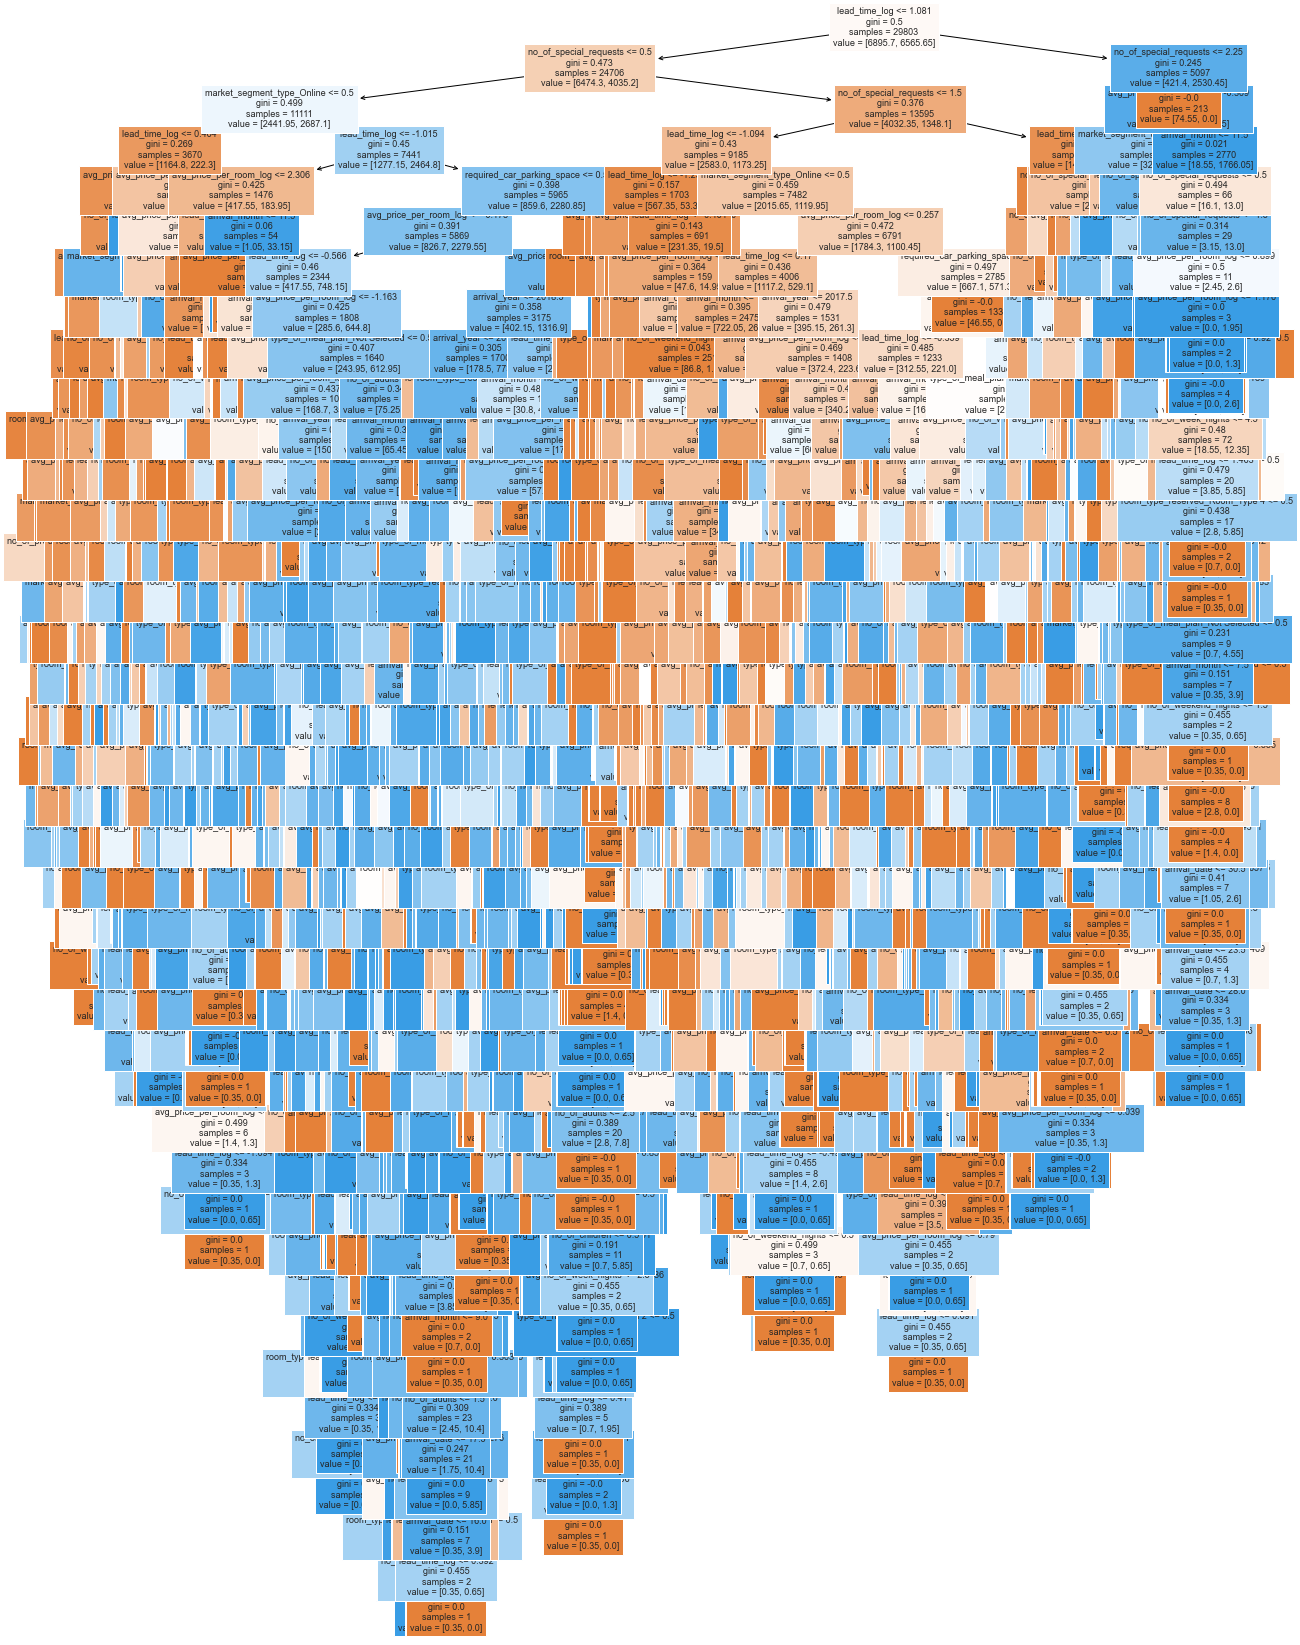

In [166]:
plt.figure(figsize=(20, 30))
out = tree.plot_tree(
    model,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
# below code will add arrows to the decision tree split if they are missing
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [167]:
# text report showing the rules of a decision tree
print(tree.export_text(model, feature_names=feature_names, show_weights=True))

|--- lead_time_log <= 1.08
|   |--- no_of_special_requests <= 0.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- lead_time_log <= 0.46
|   |   |   |   |--- avg_price_per_room_log <= 2.50
|   |   |   |   |   |--- no_of_weekend_nights <= 3.50
|   |   |   |   |   |   |--- avg_price_per_room_log <= -0.95
|   |   |   |   |   |   |   |--- arrival_month <= 9.50
|   |   |   |   |   |   |   |   |--- lead_time_log <= -0.76
|   |   |   |   |   |   |   |   |   |--- arrival_month <= 6.50
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 6
|   |   |   |   |   |   |   |   |   |   |--- room_type_reserved_Room_Type 4 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 5
|   |   |   |   |   |   |   |   |   |--- arrival_month >  6.50
|   |   |   |   |   |   |   |   |   |   |--- avg_price_per_room_log <= -1.15
|   |   |   |   |   |   |   |   |   |  

In [391]:
# importance of features in the tree building ( The importance of a feature is computed as the (normalized) total reduction of the criterion brought by that feature. It is also known as the Gini importance )

print(
    pd.DataFrame(
        model.feature_importances_, columns=["Imp"], index=X_train_d.columns
    ).sort_values(by="Imp", ascending=False)
)

                                           Imp
lead_time_log                         0.346150
avg_price_per_room_log                0.141522
no_of_special_requests                0.105077
arrival_date                          0.093827
market_segment_type_Online            0.092340
arrival_month                         0.064912
no_of_week_nights                     0.048271
no_of_weekend_nights                  0.035097
arrival_year                          0.016504
no_of_adults                          0.014166
required_car_parking_space            0.008719
type_of_meal_plan_Not Selected        0.008151
room_type_reserved_Room_Type 4        0.007588
no_of_children                        0.005025
type_of_meal_plan_Meal Plan 2         0.003724
room_type_reserved_Room_Type 5        0.002296
room_type_reserved_Room_Type 2        0.001328
room_type_reserved_Room_Type 6        0.001238
market_segment_type_Offline           0.001234
market_segment_type_Corporate         0.001030
repeated_gues

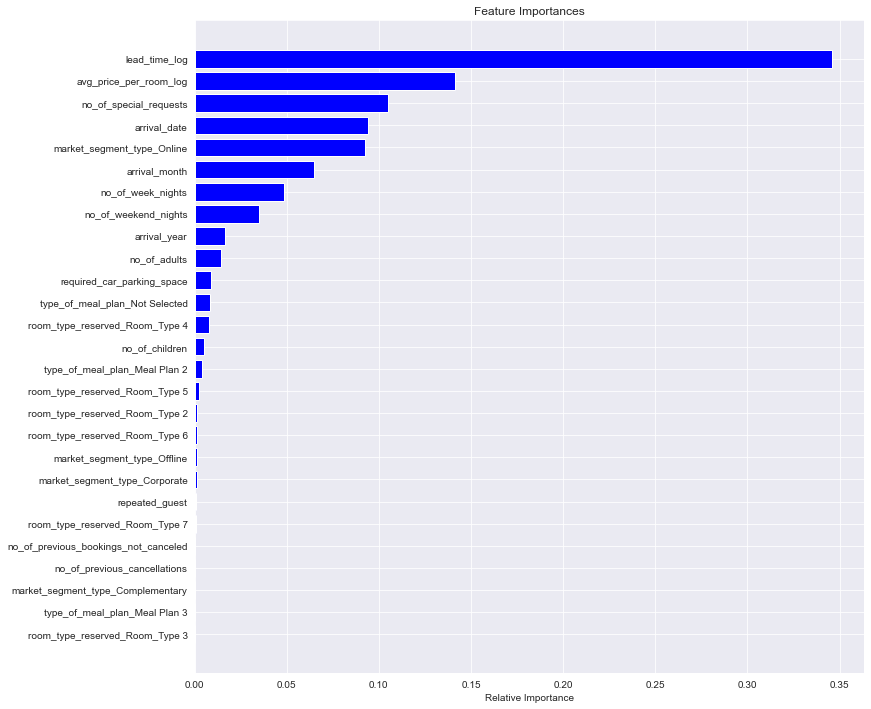

In [169]:
importances = model.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

* According to the decision tree model, Lead Time is the most important variable for predicting the cancellations.
* The second important feature is Average Price Per Room

##  <span style="color:#008000"/>Do we need to prune the tree?

Yes, we need to reduce the overfitting

###  <span style="color:#008000"/>Reducing over fitting

####  <span style="color:#008000"/>Using GridSearch for Hyperparameter tuning of our tree model

* Hyperparameter tuning is also tricky in the sense that there is no direct way to calculate how a change in the
  hyperparameter value will reduce the loss of your model, so we usually resort to experimentation. i.e we'll use Grid search
* Grid search is a tuning technique that attempts to compute the optimum values of hyperparameters. 
* It is an exhaustive search that is performed on a the specific parameter values of a model.
* The parameters of the estimator/model used to apply these methods are optimized by cross-validated grid-search over a parameter grid.

In [392]:
# Choose the type of classifier.
estimator = DecisionTreeClassifier(random_state=1, class_weight={0: 0.35, 1: 0.65})

# Grid of parameters to choose from
parameters = {
    "max_depth": [5, 10, 15, None],
    "criterion": ["entropy", "gini"],
    "splitter": ["best", "random"],
    "min_impurity_decrease": [0.00001, 0.0001, 0.01],
}

# Type of scoring used to compare parameter combinations
scorer = make_scorer(recall_score)

# Run the grid search
grid_obj = GridSearchCV(estimator, parameters, scoring=scorer, cv=5)
grid_obj = grid_obj.fit(X_train_d, y_train_d)

# Set the clf to the best combination of parameters
estimator = grid_obj.best_estimator_

# Fit the best algorithm to the data.
estimator.fit(X_train_d, y_train_d)

DecisionTreeClassifier(class_weight={0: 0.35, 1: 0.65}, max_depth=5,
                       min_impurity_decrease=0.01, random_state=1,
                       splitter='random')

####  <span style="color:#008000"/>Checking performance on training set

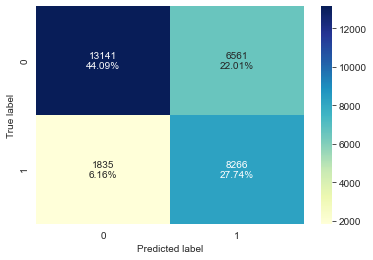

In [393]:
confusion_matrix_sklearn(estimator, X_train_d, y_train_d)

In [394]:
decision_tree_tune_perf_train = get_recall_score(estimator, X_train_d, y_train_d)
print("Recall Score:", decision_tree_tune_perf_train)

Recall Score: 0.8183348183348184


####  <span style="color:#008000"/>Checking performance on test set

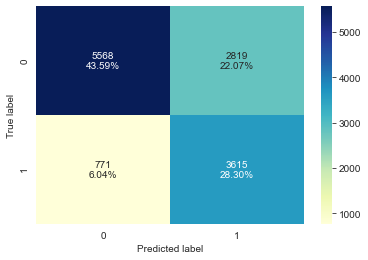

In [395]:
confusion_matrix_sklearn(estimator, X_test_d, y_test_d)

In [396]:
decision_tree_tune_perf_test = get_recall_score(estimator, X_test_d, y_test_d)
print("Recall Score:", decision_tree_tune_perf_test)

Recall Score: 0.8242134062927496


* The model is giving a generalized result now.

###  <span style="color:#008000"/>Visualizing the Decision Tree

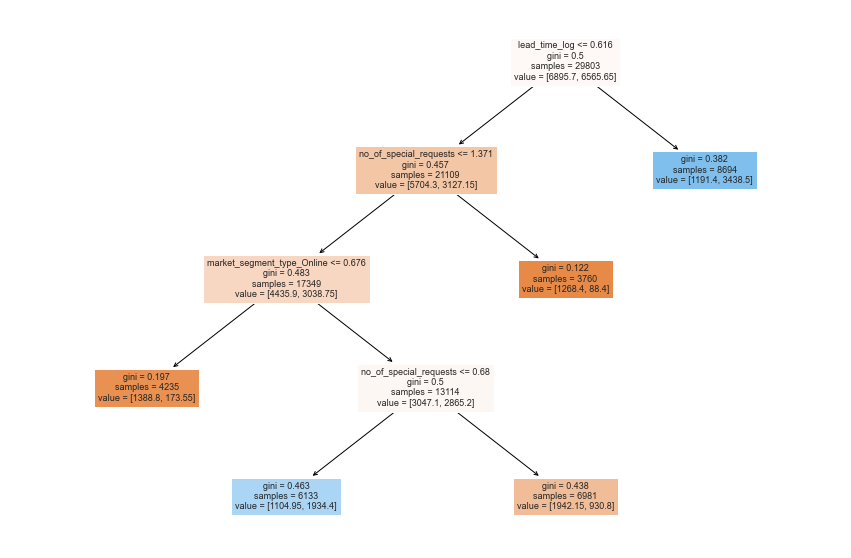

In [175]:
plt.figure(figsize=(15, 10))
out = tree.plot_tree(
    estimator,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [176]:
# text report showing the rules of a decision tree
print(tree.export_text(estimator, feature_names=feature_names, show_weights=True))

|--- lead_time_log <= 0.62
|   |--- no_of_special_requests <= 1.37
|   |   |--- market_segment_type_Online <= 0.68
|   |   |   |--- weights: [1388.80, 173.55] class: 0
|   |   |--- market_segment_type_Online >  0.68
|   |   |   |--- no_of_special_requests <= 0.68
|   |   |   |   |--- weights: [1104.95, 1934.40] class: 1
|   |   |   |--- no_of_special_requests >  0.68
|   |   |   |   |--- weights: [1942.15, 930.80] class: 0
|   |--- no_of_special_requests >  1.37
|   |   |--- weights: [1268.40, 88.40] class: 0
|--- lead_time_log >  0.62
|   |--- weights: [1191.40, 3438.50] class: 1



- If the lead time is greater than 0.62 then booking will result into cancellation
- If the lead time is less than or equal to 0.62 and the number of special requests are greater than or equal to 1.37 then the booking will not cancel
- If the lead time is less than or equal to 0.62, and the number of special requests are less than 1.37, and market segment online is less than 0.68 then the booking will not cancel
- If the lead time is less than or equal to 0.62, and the number of special requests are less than 0.68, and market segment online is greater than 0.68 then the booking will result in cancellation

In [397]:
# importance of features in the tree building 

print(
    pd.DataFrame(
        estimator.feature_importances_, columns=["Imp"], index=X_train_d.columns
    ).sort_values(by="Imp", ascending=False))

                                           Imp
lead_time_log                         0.504503
no_of_special_requests                0.305830
market_segment_type_Online            0.189667
type_of_meal_plan_Meal Plan 3         0.000000
market_segment_type_Offline           0.000000
market_segment_type_Corporate         0.000000
market_segment_type_Complementary     0.000000
room_type_reserved_Room_Type 7        0.000000
room_type_reserved_Room_Type 6        0.000000
room_type_reserved_Room_Type 5        0.000000
room_type_reserved_Room_Type 4        0.000000
room_type_reserved_Room_Type 3        0.000000
room_type_reserved_Room_Type 2        0.000000
type_of_meal_plan_Not Selected        0.000000
no_of_adults                          0.000000
type_of_meal_plan_Meal Plan 2         0.000000
no_of_children                        0.000000
no_of_previous_bookings_not_canceled  0.000000
no_of_previous_cancellations          0.000000
repeated_guest                        0.000000
arrival_date 

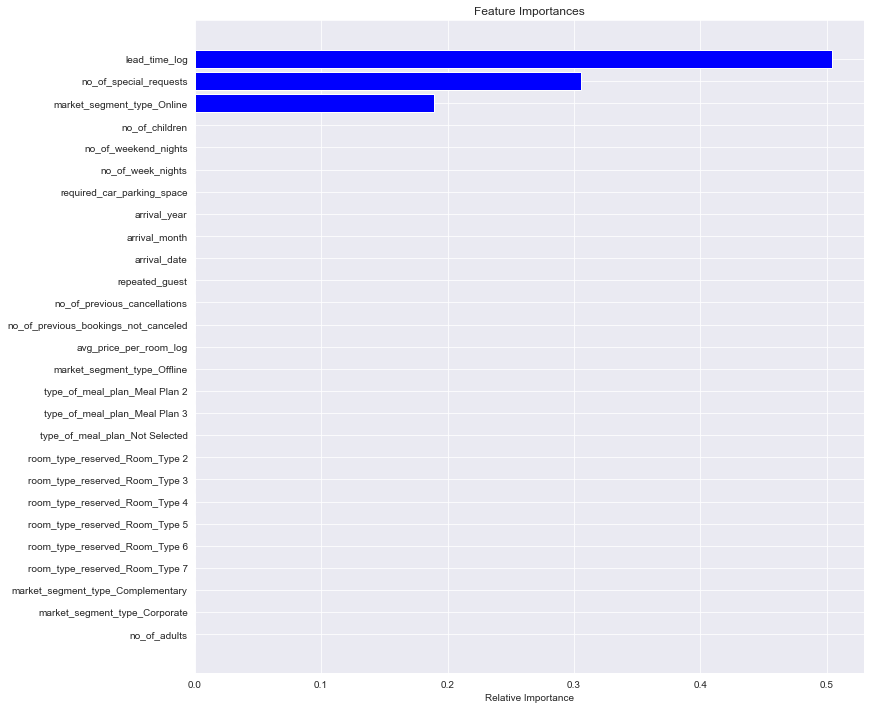

In [398]:
importances = estimator.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

- The importance of the variables have improved
- The new model narrows down the variables, this should allow business to focus on specifics

###  <span style="color:#008000"/>Cost Complexity Pruning
####  <span style="color:#008000"/>Total impurity of leaves vs effective alphas of pruned tree

In [399]:
clf = DecisionTreeClassifier(random_state=1, class_weight={0: 0.35, 1: 0.65})
path = clf.cost_complexity_pruning_path(X_train_d, y_train_d)
ccp_alphas, impurities = path.ccp_alphas, path.impurities

In [400]:
pd.DataFrame(path)

ccp_alphas  impurities
0     0.000000e+00    0.003312
1    -1.355253e-20    0.003312
2    -1.355253e-20    0.003312
3    -1.355253e-20    0.003312
4    -1.355253e-20    0.003312
...            ...         ...
2894  7.058674e-03    0.326420
2895  8.410883e-03    0.343242
2896  1.325945e-02    0.356501
2897  3.325105e-02    0.423003
2898  7.669623e-02    0.499699

[2899 rows x 2 columns]

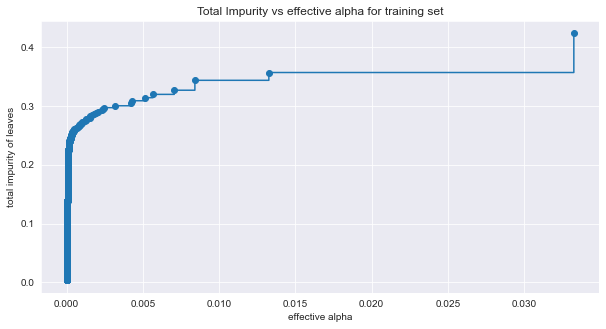

In [401]:
fig, ax = plt.subplots(figsize=(10, 5))
ax.plot(ccp_alphas[:-1], impurities[:-1], marker="o", drawstyle="steps-post")
ax.set_xlabel("effective alpha")
ax.set_ylabel("total impurity of leaves")
ax.set_title("Total Impurity vs effective alpha for training set")
plt.show()

In [402]:
# let's train the tree using effective alphas
clfs = []

#ccp_alphas[ccp_alphas<0] = 0

for ccp_alpha in ccp_alphas:
    clf = DecisionTreeClassifier(
        random_state=1, ccp_alpha=ccp_alpha, class_weight={0: 0.35, 1: 0.65}
    )
    clf.fit(X_train_d, y_train_d)
    clfs.append(clf)
print(
    "Number of nodes in the last tree is: {} with ccp_alpha: {}".format(
        clfs[-1].tree_.node_count, ccp_alphas[-1]
    )
)

ValueError: ccp_alpha must be greater than or equal to 0

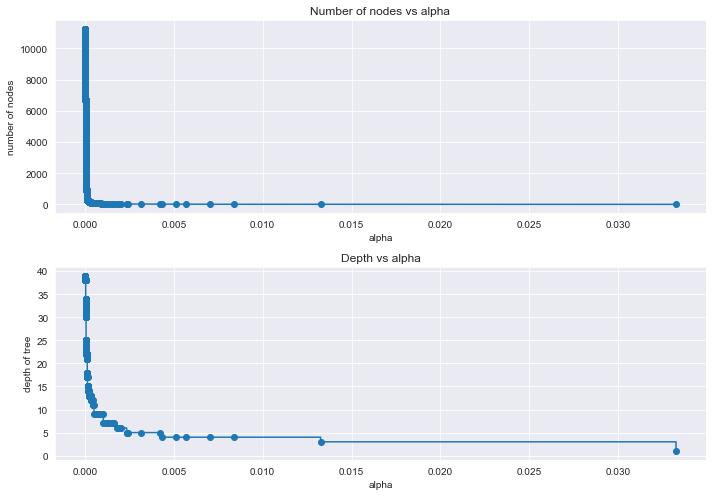

In [183]:
clfs = clfs[:-1]
ccp_alphas = ccp_alphas[:-1]

node_counts = [clf.tree_.node_count for clf in clfs]
depth = [clf.tree_.max_depth for clf in clfs]
fig, ax = plt.subplots(2, 1, figsize=(10, 7))
ax[0].plot(ccp_alphas, node_counts, marker="o", drawstyle="steps-post")
ax[0].set_xlabel("alpha")
ax[0].set_ylabel("number of nodes")
ax[0].set_title("Number of nodes vs alpha")
ax[1].plot(ccp_alphas, depth, marker="o", drawstyle="steps-post")
ax[1].set_xlabel("alpha")
ax[1].set_ylabel("depth of tree")
ax[1].set_title("Depth vs alpha")
fig.tight_layout()

In [184]:
recall_train = []
for clf in clfs:
    pred_train = clf.predict(X_train_d)
    values_train = recall_score(y_train_d, pred_train)
    recall_train.append(values_train)

In [185]:
recall_test = []
for clf in clfs:
    pred_test = clf.predict(X_test_d)
    values_test = recall_score(y_test_d, pred_test)
    recall_test.append(values_test)

In [186]:
train_scores = [clf.score(X_train_d, y_train_d) for clf in clfs]
test_scores = [clf.score(X_test_d, y_test_d) for clf in clfs]

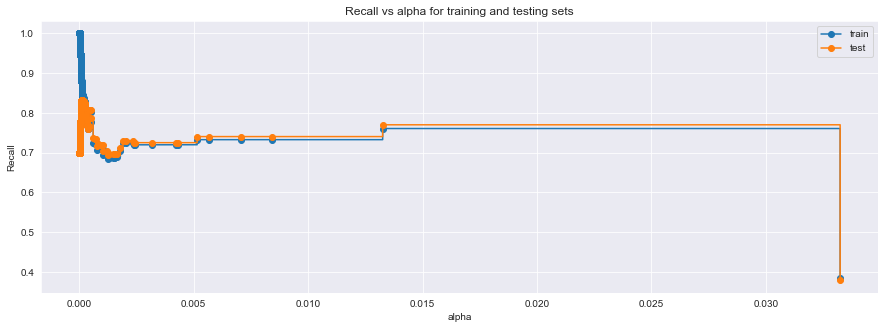

In [187]:
fig, ax = plt.subplots(figsize=(15, 5))
ax.set_xlabel("alpha")
ax.set_ylabel("Recall")
ax.set_title("Recall vs alpha for training and testing sets")
ax.plot(
    ccp_alphas, recall_train, marker="o", label="train", drawstyle="steps-post",
)
ax.plot(ccp_alphas, recall_test, marker="o", label="test", drawstyle="steps-post")
ax.legend()
plt.show()

**We can choose alpha 0.005 retaining information and getting higher recall.**

In [188]:
# creating the model where we get highest train and test recall
index_best_model = np.argmax(recall_test)
best_model = clfs[index_best_model]
print(best_model)

DecisionTreeClassifier(ccp_alpha=0.0001035890247458632,
                       class_weight={0: 0.35, 1: 0.65}, random_state=1)


In [189]:
best_model.fit(X_train_d, y_train_d)

DecisionTreeClassifier(ccp_alpha=0.0001035890247458632,
                       class_weight={0: 0.35, 1: 0.65}, random_state=1)

####  <span style="color:#008000"/>Checking performance on training set

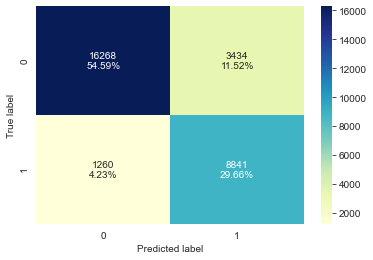

In [190]:
confusion_matrix_sklearn(best_model, X_train_d, y_train_d)

In [191]:
print("Recall Score:", get_recall_score(best_model, X_train_d, y_train_d))

Recall Score: 0.8752598752598753


####  <span style="color:#008000"/>Checking performance on test set

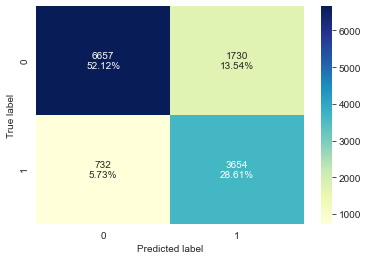

In [192]:
confusion_matrix_sklearn(best_model, X_test_d, y_test_d)

In [193]:
print("Recall Score:", get_recall_score(best_model, X_test_d, y_test_d))

Recall Score: 0.8331053351573188


**Create model based on ccp_alpha 0.0002**

In [194]:
best_model2 = DecisionTreeClassifier(
    ccp_alpha=0.0002, class_weight={0: 0.15, 1: 0.85}, random_state=1
)
best_model2.fit(X_train_d, y_train_d)

DecisionTreeClassifier(ccp_alpha=0.0002, class_weight={0: 0.15, 1: 0.85},
                       random_state=1)

####  <span style="color:#008000"/>Checking performance on the training set

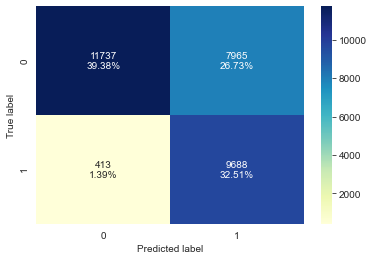

In [195]:
confusion_matrix_sklearn(best_model2, X_train_d, y_train_d)

In [196]:
decision_tree_postpruned_perf_train = get_recall_score(best_model2, X_train_d, y_train_d)
print("Recall Score:", decision_tree_postpruned_perf_train)

Recall Score: 0.9591129591129591


####  <span style="color:#008000"/>Checking performance on the test set

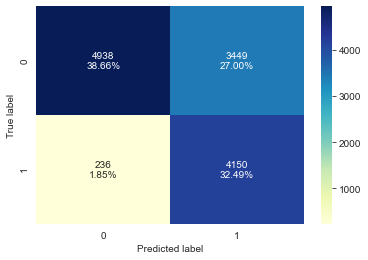

In [197]:
confusion_matrix_sklearn(best_model2, X_test_d, y_test_d)

In [198]:
decision_tree_postpruned_perf_test = get_recall_score(best_model2, X_test_d, y_test_d)
print("Recall Score:", decision_tree_postpruned_perf_test)

Recall Score: 0.9461924304605563


* The results have improved from the initial model. 
* The performance is comparable to the  hyperparameter tuned model.
* The model is giving a generalized performance on training and test set.

###  <span style="color:#008000"/>Visualizing the Decision Tree

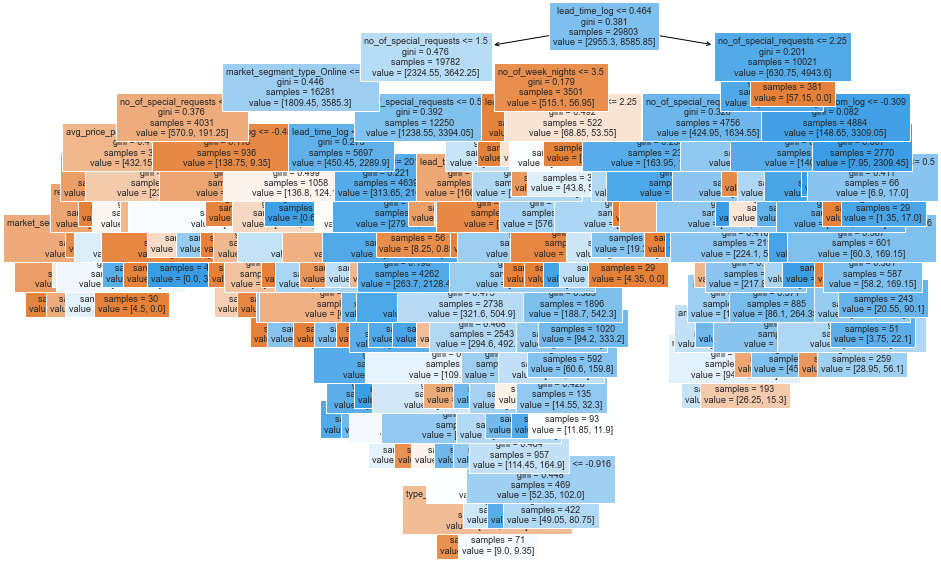

In [199]:
plt.figure(figsize=(15, 10))

out = tree.plot_tree(
    best_model2,
    feature_names=feature_names,
    filled=True,
    fontsize=9,
    node_ids=False,
    class_names=None,
)
for o in out:
    arrow = o.arrow_patch
    if arrow is not None:
        arrow.set_edgecolor("black")
        arrow.set_linewidth(1)
plt.show()

In [200]:
print(tree.export_text(best_model2, feature_names=feature_names, show_weights=True))

|--- lead_time_log <= 0.46
|   |--- no_of_special_requests <= 1.50
|   |   |--- market_segment_type_Online <= 0.50
|   |   |   |--- no_of_special_requests <= 0.50
|   |   |   |   |--- avg_price_per_room_log <= -0.95
|   |   |   |   |   |--- arrival_month <= 11.50
|   |   |   |   |   |   |--- repeated_guest <= 0.50
|   |   |   |   |   |   |   |--- market_segment_type_Corporate <= 0.50
|   |   |   |   |   |   |   |   |--- no_of_weekend_nights <= 0.50
|   |   |   |   |   |   |   |   |   |--- weights: [44.70, 0.85] class: 0
|   |   |   |   |   |   |   |   |--- no_of_weekend_nights >  0.50
|   |   |   |   |   |   |   |   |   |--- weights: [69.30, 23.80] class: 0
|   |   |   |   |   |   |   |--- market_segment_type_Corporate >  0.50
|   |   |   |   |   |   |   |   |--- weights: [25.95, 21.25] class: 0
|   |   |   |   |   |   |--- repeated_guest >  0.50
|   |   |   |   |   |   |   |--- weights: [34.65, 2.55] class: 0
|   |   |   |   |   |--- arrival_month >  11.50
|   |   |   |   |   |   |---

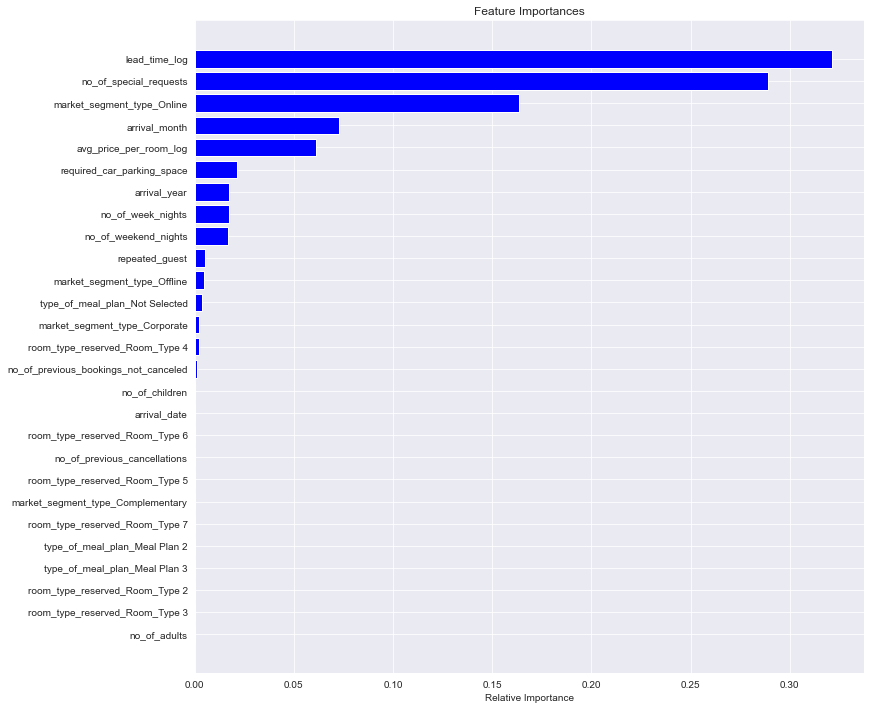

In [201]:
importances = best_model2.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(12, 12))
plt.title("Feature Importances")
plt.barh(range(len(indices)), importances[indices], color="blue", align="center")
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.xlabel("Relative Importance")
plt.show()

###  <span style="color:#008000"/> Model Performance Comparison and Conclusions

In [202]:
# testing performance comparison

models_test_comp_df = pd.DataFrame(
    [
        decision_tree_perf_test,
        decision_tree_tune_perf_test,
        decision_tree_postpruned_perf_test,
    ],
    columns=["Recall on testing set"],
)

print("Test performance comparison:")
models_test_comp_df

Test performance comparison:


Recall on testing set
0               0.699042
1               0.824213
2               0.946192

* Decision tree model with pre-pruning has given the best recall score on training data.
* The pre-pruned and the post-pruned models have reduced overfitting and the model is giving a generalized performance.
* The post-pruned model gives good result, but we'll select the tree from pre-pruning as it's the simple and efficient model.
* The lead time is significant feature that drives cancellations the most.
* The longer the lead time the higher possibility of cancellations.
* Special requests affect the cancellations. If there are more special requests, it's cancellations is unlikely
* Market segment online is important feature that determines cancellations. Market segments other than online more likely not to cancel.

##  <span style="color:#008000"/>Actionable Insights and Recommendations

- The lead time is a critical metric for cancellations. Longer the lead time higher are the chances of cancellations. The hotel can introduce policy for no refunds for longer bookings. The hotel can also add conditions like no cancellations allowed within 30 days of arrival date.
- The next important feature is special requests. The guests who make 3 or more special requests do no cancel their bookings. The hotel should take special requests into consideration. Offering more options for the guests and providing guest service accordingly.
- The number of repeated guests are on the lower side. The hotel should provide incentives for customers for revisit. The repeated guests rarely cancel their booking. By creating loyalty, they can increase LTV of repeated guests.
- The guests who book online have highest number of cancellations. Policies can be implemented to avoid cancellations by securing deposit, partial refunds, etc.
- The percentage of repeated guests is low. The hotel should gather feedbacks for new guests and do improvements to encourage repeat customers